In [1]:
import pandas as pd
import numpy as np

Load data

In [2]:
df = pd.read_excel('../0_data/pictures_captions_autocaptions.xlsx')
df['Has_women'] = df['Auto_caption'].str.contains('woman|women') # Create filter for caption with woman, women
df_women = df[df['Has_women'] == True].copy().reset_index(drop = True) #filter implementation
df_women['Has_women'] = df_women['Has_women'].astype(int)
df_women

,Long,Auto_caption,id,Short,link,Objectify (yes or no),caption,Has_women
0,2015-11-18_18-26-59_UTC,a picture of a woman with long black hair sits...,207.0,-PHbiexlr_,https://www.instagram.com/p/-PHbiexlr_/?igshid...,1.0,Stunning Mariana Rodriguez in #amencouture. Se...,1
1,2015-06-01_07-45-08_UTC,a picture of a woman with black hair and a bla...,214.0,3YO1o0Rlkt,https://www.instagram.com/p/3YO1o0Rlkt/?igshid...,1.0,@emastokholma in Amen embroidered #dress from ...,1
2,2015-07-06_10-38-30_UTC,a picture of a woman with black hair and a bla...,213.0,4yqgDyxloK,https://www.instagram.com/p/4yqgDyxloK/?igshid...,1.0,Stunning DJ @emastokholma wears all over paill...,1
3,2020-04-10_08-57-20_UTC,a picture of a woman wearing a black jacket an...,209.0,B-y2Fo8qcN_,https://www.instagram.com/p/B-y2Fo8qcN_/?igshi...,1.0,Crystal Pumps ✨ #AmenStyle #AmenPreSpring20 #A...,1
4,2019-10-24_11-49-40_UTC,a picture of a woman in a red dress sits on a ...,200.0,B3__d73i46x,https://www.instagram.com/p/B3__d73i46x/?igshi...,1.0,Discover our FW19 Collection on amenstyle.com ...,1
...,...,...,...,...,...,...,...,...
666,2023-11-08_17-37-17_UTC_4,a picture of a woman in a black coat and sungl...,235.0,CzZMjcYMP21,https://www.instagram.com/p/CzZMjcYMP21/?utm_s...,0.0,This season must-have. @fashionhurricanebyv in...,1
667,2023-11-08_17-37-17_UTC_5,a picture of a woman with brown hair wearing a...,235.0,CzZMjcYMP21,https://www.instagram.com/p/CzZMjcYMP21/?utm_s...,0.0,This season must-have. @fashionhurricanebyv in...,1
668,2013-10-08_12-40-36_UTC,a picture of a woman with black hair and a bar...,216.0,fNO52Nxluy,https://www.instagram.com/p/fNO52Nxluy/?igshid...,1.0,Valentina Vignali looks explosive in a preciou...,1
669,2014-03-21_10-14-52_UTC,a picture of a young woman with long brown hai...,217.0,lzQl_gRlnD,https://www.instagram.com/p/lzQl_gRlnD/?igshid...,1.0,Regram @nimabenati #amenstyle #amen #fashion #...,1


Check that the images contain people, if not, drop them from the table

In [3]:
import os
import glob

# Replace this with the directory you want to search in
directory = '../1_download_data/data/raw/' #change when data is new data



def get_jpg_files(folder_path):
    jpg_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.jpg'):
                jpg_files.append(os.path.join(root, file))
    return jpg_files

# Example usage
folder_path = '../1_download_data/data/raw/'
jpg_files = get_jpg_files(folder_path)
jpg_files[0:10]

['../1_download_data/data/raw/-PHbiexlr_\\2015-11-18_18-26-59_UTC.jpg',
 '../1_download_data/data/raw/3YO1o0Rlkt\\2015-06-01_07-45-08_UTC.jpg',
 '../1_download_data/data/raw/4yqgDyxloK\\2015-07-06_10-38-30_UTC.jpg',
 '../1_download_data/data/raw/B-y2Fo8qcN_\\2020-04-10_08-57-20_UTC.jpg',
 '../1_download_data/data/raw/B3__d73i46x\\2019-10-24_11-49-40_UTC.jpg',
 '../1_download_data/data/raw/B8zBgZeD8bQ\\2020-02-20_17-34-19_UTC.jpg',
 '../1_download_data/data/raw/B9UltWvIDjA\\2020-03-04_18-25-36_UTC.jpg',
 '../1_download_data/data/raw/B9XY-IjjDWt\\2020-03-05_20-32-01_UTC_1.jpg',
 '../1_download_data/data/raw/B9XY-IjjDWt\\2020-03-05_20-32-01_UTC_2.jpg',
 '../1_download_data/data/raw/BBIHpekRlhD\\2016-01-29_14-48-24_UTC.jpg']

In [4]:
# match jpg files with Long codes
dict_keys = {}
for file in jpg_files:
    long = file.split('\\')[1].split('.')[0]
    dict_keys[file] = long
dict_keys
df_keys = pd.DataFrame(dict_keys.items(), columns=['Key_path', 'Long'])
df_keys.head()

,Key_path,Long
0,../1_download_data/data/raw/-PHbiexlr_\2015-11...,2015-11-18_18-26-59_UTC
1,../1_download_data/data/raw/3YO1o0Rlkt\2015-06...,2015-06-01_07-45-08_UTC
2,../1_download_data/data/raw/4yqgDyxloK\2015-07...,2015-07-06_10-38-30_UTC
3,../1_download_data/data/raw/B-y2Fo8qcN_\2020-0...,2020-04-10_08-57-20_UTC
4,../1_download_data/data/raw/B3__d73i46x\2019-1...,2019-10-24_11-49-40_UTC


Human Detection and mark pictures without detections

In [5]:
from ultralytics import YOLO
import cv2

# Load the YOLO model
model = YOLO("yolov8n.pt")

C:\Users\danie\anaconda3\envs\ds_master\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
from tqdm import tqdm
no_humans = []
for image_path in tqdm(df_keys['Key_path']):
    results = model(image_path)
    
    # Extract bounding boxes, classes, names, and confidences
    boxes = results[0].boxes.xyxy.tolist()
    classes = results[0].boxes.cls.tolist()
    names = results[0].names
    confidences = results[0].boxes.conf.tolist()

    if 0 not in classes:
        no_humans.append(image_path)
        
    # Iterate through the results
    # for box, cls, conf in zip(boxes, classes, confidences):
    #     x1, y1, x2, y2 = box
    #     confidence = conf
    #     detected_class = cls
    #     name = names[int(cls)]

  0%|                                                                                          | 0/764 [00:00<?, ?it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\-PHbiexlr_\2015-11-18_18-26-59_UTC.jpg: 640x640 1 person, 1 couch, 1 dining table, 1 tv, 1 vase, 165.2ms
Speed: 5.0ms preprocess, 165.2ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


  0%|                                                                                  | 1/764 [00:02<25:43,  2.02s/it]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\3YO1o0Rlkt\2015-06-01_07-45-08_UTC.jpg: 640x640 1 person, 159.9ms
Speed: 5.0ms preprocess, 159.9ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


  0%|▏                                                                                 | 2/764 [00:02<12:00,  1.06it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\4yqgDyxloK\2015-07-06_10-38-30_UTC.jpg: 640x640 1 person, 139.9ms
Speed: 3.0ms preprocess, 139.9ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


  0%|▎                                                                                 | 3/764 [00:02<07:30,  1.69it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\B-y2Fo8qcN_\2020-04-10_08-57-20_UTC.jpg: 640x512 1 person, 1 tie, 1 skateboard, 129.9ms
Speed: 4.4ms preprocess, 129.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  1%|▍                                                                                 | 4/764 [00:02<05:29,  2.31it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\B3__d73i46x\2019-10-24_11-49-40_UTC.jpg: 448x640 1 person, 120.4ms
Speed: 5.6ms preprocess, 120.4ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


  1%|▌                                                                                 | 5/764 [00:02<04:14,  2.98it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\B8zBgZeD8bQ\2020-02-20_17-34-19_UTC.jpg: 640x544 1 person, 134.1ms
Speed: 5.4ms preprocess, 134.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 544)


  1%|▋                                                                                 | 6/764 [00:02<03:34,  3.53it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\B9UltWvIDjA\2020-03-04_18-25-36_UTC.jpg: 640x544 1 person, 85.1ms
Speed: 3.6ms preprocess, 85.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


  1%|▊                                                                                 | 7/764 [00:03<02:57,  4.26it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\B9XY-IjjDWt\2020-03-05_20-32-01_UTC_1.jpg: 640x512 1 person, 1 sports ball, 1 surfboard, 97.2ms
Speed: 4.7ms preprocess, 97.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


  1%|▊                                                                                 | 8/764 [00:03<02:36,  4.84it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\B9XY-IjjDWt\2020-03-05_20-32-01_UTC_2.jpg: 640x512 1 person, 1 frisbee, 1 baseball bat, 1 bottle, 124.2ms
Speed: 1.1ms preprocess, 124.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


  1%|▉                                                                                 | 9/764 [00:03<02:23,  5.27it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\BBIHpekRlhD\2016-01-29_14-48-24_UTC.jpg: 640x640 1 person, 119.2ms
Speed: 6.0ms preprocess, 119.2ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


  1%|█                                                                                | 10/764 [00:03<02:14,  5.62it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\BC3N8eFRlpm\2016-03-12_18-19-07_UTC.jpg: 640x512 3 persons, 91.7ms
Speed: 2.4ms preprocess, 91.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


  1%|█▏                                                                               | 11/764 [00:03<02:03,  6.11it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\BhePlPUljFR\2018-04-12_13-45-37_UTC.jpg: 640x512 3 persons, 88.9ms
Speed: 2.6ms preprocess, 88.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  2%|█▎                                                                               | 12/764 [00:03<01:52,  6.71it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\BJn5LRbBpo8\2016-08-27_19-08-47_UTC.jpg: 640x640 1 person, 135.0ms
Speed: 5.0ms preprocess, 135.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


  2%|█▍                                                                               | 13/764 [00:03<01:55,  6.51it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\BkcQY6FlNcN\2018-06-25_08-48-23_UTC.jpg: 640x512 1 person, 100.0ms
Speed: 2.5ms preprocess, 100.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  2%|█▍                                                                               | 14/764 [00:04<01:53,  6.63it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\BLDhgP7hg-h\2016-10-02_09-12-04_UTC.jpg: 640x640 1 person, 104.3ms
Speed: 6.1ms preprocess, 104.3ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


  2%|█▌                                                                               | 15/764 [00:04<01:50,  6.77it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\BmiLQlElqgG\2018-08-16_09-01-47_UTC.jpg: 640x512 1 person, 113.7ms
Speed: 1.6ms preprocess, 113.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


  2%|█▋                                                                               | 16/764 [00:04<01:51,  6.72it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Bvi3R68ALJP\2019-03-28_08-08-59_UTC.jpg: 640x512 1 person, 99.7ms
Speed: 5.0ms preprocess, 99.7ms inference, 8.3ms postprocess per image at shape (1, 3, 640, 512)


  2%|█▊                                                                               | 17/764 [00:04<01:48,  6.86it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\BZQS9fIFDjO\2017-09-20_07-34-38_UTC.jpg: 640x640 1 person, 1 bench, 111.9ms
Speed: 4.0ms preprocess, 111.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


  2%|█▉                                                                               | 18/764 [00:04<01:50,  6.73it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\B_InFhIjr9j\2020-04-18_19-49-32_UTC_1.jpg: 640x512 1 person, 99.4ms
Speed: 0.0ms preprocess, 99.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 512)


  2%|██                                                                               | 19/764 [00:04<01:47,  6.96it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\B_InFhIjr9j\2020-04-18_19-49-32_UTC_2.jpg: 640x512 2 persons, 118.4ms
Speed: 3.0ms preprocess, 118.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  3%|██                                                                               | 20/764 [00:04<01:48,  6.84it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\B_InFhIjr9j\2020-04-18_19-49-32_UTC_3.jpg: 640x512 1 person, 1 bicycle, 100.5ms
Speed: 6.1ms preprocess, 100.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  3%|██▏                                                                              | 21/764 [00:05<01:48,  6.85it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\B_InFhIjr9j\2020-04-18_19-49-32_UTC_4.jpg: 640x512 (no detections), 101.7ms
Speed: 0.0ms preprocess, 101.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


  3%|██▎                                                                              | 22/764 [00:05<01:46,  6.99it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\B_InZsOD0Aj\2020-04-18_19-52-18_UTC_1.jpg: 640x512 (no detections), 105.7ms
Speed: 4.5ms preprocess, 105.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  3%|██▍                                                                              | 23/764 [00:05<01:47,  6.91it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\B_InZsOD0Aj\2020-04-18_19-52-18_UTC_2.jpg: 640x512 1 person, 112.8ms
Speed: 7.0ms preprocess, 112.8ms inference, 5.9ms postprocess per image at shape (1, 3, 640, 512)


  3%|██▌                                                                              | 24/764 [00:05<01:50,  6.69it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\B_InZsOD0Aj\2020-04-18_19-52-18_UTC_3.jpg: 640x512 1 person, 94.2ms
Speed: 0.0ms preprocess, 94.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


  3%|██▋                                                                              | 25/764 [00:05<01:46,  6.92it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\B_InZsOD0Aj\2020-04-18_19-52-18_UTC_4.jpg: 640x512 1 person, 104.5ms
Speed: 8.4ms preprocess, 104.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


  3%|██▊                                                                              | 26/764 [00:05<01:44,  7.04it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0b7pbjscVJ\2023-12-04_15-38-40_UTC_1.jpg: 640x512 1 person, 116.1ms
Speed: 3.0ms preprocess, 116.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


  4%|██▊                                                                              | 27/764 [00:05<01:52,  6.56it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0b7pbjscVJ\2023-12-04_15-38-40_UTC_2.jpg: 640x512 2 persons, 98.5ms
Speed: 4.6ms preprocess, 98.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 512)


  4%|██▉                                                                              | 28/764 [00:06<01:53,  6.50it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0b7pbjscVJ\2023-12-04_15-38-40_UTC_3.jpg: 640x512 1 person, 1 bench, 1 dog, 1 cell phone, 103.8ms
Speed: 3.0ms preprocess, 103.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


  4%|███                                                                              | 29/764 [00:06<01:55,  6.35it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0b7pbjscVJ\2023-12-04_15-38-40_UTC_4.jpg: 640x512 1 person, 2 cars, 1 truck, 114.7ms
Speed: 6.0ms preprocess, 114.7ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 512)


  4%|███▏                                                                             | 30/764 [00:06<01:56,  6.29it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0bwbVxskqV\2023-12-04_14-00-37_UTC_1.jpg: 640x544 1 person, 1 handbag, 1 cup, 1 vase, 104.8ms
Speed: 13.8ms preprocess, 104.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 544)


  4%|███▎                                                                             | 31/764 [00:06<01:57,  6.25it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0bwbVxskqV\2023-12-04_14-00-37_UTC_2.jpg: 640x544 1 person, 1 suitcase, 99.5ms
Speed: 6.5ms preprocess, 99.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 544)


  4%|███▍                                                                             | 32/764 [00:06<01:56,  6.28it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0bwbVxskqV\2023-12-04_14-00-37_UTC_3.jpg: 640x544 1 person, 1 handbag, 110.2ms
Speed: 3.0ms preprocess, 110.2ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 544)


  4%|███▍                                                                             | 33/764 [00:06<01:56,  6.28it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0CL6aJMqCi\2023-11-24_15-40-32_UTC_1.jpg: 640x640 1 person, 1 skateboard, 1 cup, 148.4ms
Speed: 7.5ms preprocess, 148.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


  4%|███▌                                                                             | 34/764 [00:07<02:05,  5.80it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0CL6aJMqCi\2023-11-24_15-40-32_UTC_2.jpg: 640x640 1 person, 1 skateboard, 117.3ms
Speed: 0.0ms preprocess, 117.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  5%|███▋                                                                             | 35/764 [00:07<02:00,  6.05it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0CL6aJMqCi\2023-11-24_15-40-32_UTC_3.jpg: 640x640 1 person, 2 skateboards, 115.6ms
Speed: 4.7ms preprocess, 115.6ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)


  5%|███▊                                                                             | 36/764 [00:07<01:58,  6.13it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0CL6aJMqCi\2023-11-24_15-40-32_UTC_4.jpg: 640x640 1 person, 1 frisbee, 132.9ms
Speed: 4.4ms preprocess, 132.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


  5%|███▉                                                                             | 37/764 [00:07<02:01,  5.99it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0D8Eh9rayl\2023-11-25_08-00-36_UTC.jpg: 640x512 2 persons, 1 tie, 100.2ms
Speed: 0.0ms preprocess, 100.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  5%|████                                                                             | 38/764 [00:07<01:56,  6.26it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0EbUh-ISrk\2023-11-25_12-33-40_UTC.jpg: 640x512 4 persons, 92.7ms
Speed: 0.0ms preprocess, 92.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


  5%|████▏                                                                            | 39/764 [00:07<01:48,  6.65it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0eCH7dKb3V\2023-12-05_11-13-44_UTC_1.jpg: 640x512 1 person, 117.1ms
Speed: 4.5ms preprocess, 117.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  5%|████▏                                                                            | 40/764 [00:08<01:53,  6.38it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0eCH7dKb3V\2023-12-05_11-13-44_UTC_2.jpg: 640x512 3 persons, 2 bottles, 110.8ms
Speed: 9.6ms preprocess, 110.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 512)


  5%|████▎                                                                            | 41/764 [00:08<01:55,  6.26it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0eCH7dKb3V\2023-12-05_11-13-44_UTC_3.jpg: 640x512 5 persons, 99.9ms
Speed: 3.0ms preprocess, 99.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


  5%|████▍                                                                            | 42/764 [00:08<01:54,  6.31it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0EJQ7ztfXA\2023-11-25_09-55-53_UTC_1.jpg: 640x512 1 person, 106.4ms
Speed: 2.0ms preprocess, 106.4ms inference, 7.5ms postprocess per image at shape (1, 3, 640, 512)


  6%|████▌                                                                            | 43/764 [00:08<01:53,  6.38it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0EJQ7ztfXA\2023-11-25_09-55-53_UTC_2.jpg: 640x512 1 person, 110.3ms
Speed: 3.0ms preprocess, 110.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)


  6%|████▋                                                                            | 44/764 [00:08<01:52,  6.40it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0EJQ7ztfXA\2023-11-25_09-55-53_UTC_3.jpg: 640x512 3 persons, 100.0ms
Speed: 7.5ms preprocess, 100.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  6%|████▊                                                                            | 45/764 [00:08<01:48,  6.60it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0EJQ7ztfXA\2023-11-25_09-55-53_UTC_4.jpg: 640x512 5 persons, 106.9ms
Speed: 3.3ms preprocess, 106.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  6%|████▉                                                                            | 46/764 [00:08<01:49,  6.57it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0EJQ7ztfXA\2023-11-25_09-55-53_UTC_5.jpg: 640x512 1 person, 115.0ms
Speed: 3.5ms preprocess, 115.0ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 512)


  6%|████▉                                                                            | 47/764 [00:09<01:53,  6.30it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0EJQ7ztfXA\2023-11-25_09-55-53_UTC_6.jpg: 640x512 1 person, 104.6ms
Speed: 9.8ms preprocess, 104.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 512)


  6%|█████                                                                            | 48/764 [00:09<01:52,  6.39it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0EJQ7ztfXA\2023-11-25_09-55-53_UTC_7.jpg: 640x512 8 persons, 97.9ms
Speed: 3.7ms preprocess, 97.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  6%|█████▏                                                                           | 49/764 [00:09<01:51,  6.40it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0EJQ7ztfXA\2023-11-25_09-55-53_UTC_8.jpg: 640x512 7 persons, 110.6ms
Speed: 5.6ms preprocess, 110.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  7%|█████▎                                                                           | 50/764 [00:09<01:53,  6.30it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0ElQ7HLOET\2023-11-25_14-00-33_UTC_1.jpg: 640x640 1 person, 115.2ms
Speed: 6.3ms preprocess, 115.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


  7%|█████▍                                                                           | 51/764 [00:09<01:53,  6.28it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0ElQ7HLOET\2023-11-25_14-00-33_UTC_2.jpg: 640x640 1 person, 119.4ms
Speed: 10.5ms preprocess, 119.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


  7%|█████▌                                                                           | 52/764 [00:09<01:52,  6.33it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0ElQ7HLOET\2023-11-25_14-00-33_UTC_3.jpg: 640x640 1 person, 128.6ms
Speed: 6.1ms preprocess, 128.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


  7%|█████▌                                                                           | 53/764 [00:10<01:56,  6.11it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0ElQ7HLOET\2023-11-25_14-00-33_UTC_4.jpg: 640x640 2 persons, 2 skateboards, 124.7ms
Speed: 4.0ms preprocess, 124.7ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


  7%|█████▋                                                                           | 54/764 [00:10<01:54,  6.21it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0ElQ7HLOET\2023-11-25_14-00-33_UTC_5.jpg: 640x640 1 person, 100.2ms
Speed: 4.5ms preprocess, 100.2ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


  7%|█████▊                                                                           | 55/764 [00:10<01:47,  6.59it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0ElQ7HLOET\2023-11-25_14-00-33_UTC_6.jpg: 640x640 1 person, 114.9ms
Speed: 6.0ms preprocess, 114.9ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


  7%|█████▉                                                                           | 56/764 [00:10<01:46,  6.65it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0ElQ7HLOET\2023-11-25_14-00-33_UTC_7.jpg: 640x640 1 person, 123.6ms
Speed: 6.5ms preprocess, 123.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


  7%|██████                                                                           | 57/764 [00:10<01:48,  6.51it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0ElQ7HLOET\2023-11-25_14-00-33_UTC_8.jpg: 640x640 1 person, 1 handbag, 106.8ms
Speed: 5.9ms preprocess, 106.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


  8%|██████▏                                                                          | 58/764 [00:10<01:47,  6.57it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0ElQ7HLOET\2023-11-25_14-00-33_UTC_9.jpg: 640x640 1 person, 114.5ms
Speed: 5.1ms preprocess, 114.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


  8%|██████▎                                                                          | 59/764 [00:11<01:45,  6.66it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0ep0HMB_3p\2023-12-05_17-00-34_UTC_1.jpg: 640x512 1 person, 105.9ms
Speed: 5.1ms preprocess, 105.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 512)


  8%|██████▎                                                                          | 60/764 [00:11<01:47,  6.53it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0ep0HMB_3p\2023-12-05_17-00-34_UTC_2.jpg: 640x512 1 person, 96.7ms
Speed: 2.0ms preprocess, 96.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  8%|██████▍                                                                          | 61/764 [00:11<01:40,  6.98it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0ep0HMB_3p\2023-12-05_17-00-34_UTC_3.jpg: 640x512 1 person, 91.2ms
Speed: 0.0ms preprocess, 91.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  8%|██████▌                                                                          | 62/764 [00:11<01:33,  7.50it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0Eq5_isMaO\2023-11-25_14-49-51_UTC_1.jpg: 640x512 1 person, 103.1ms
Speed: 0.0ms preprocess, 103.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  8%|██████▋                                                                          | 63/764 [00:11<01:34,  7.39it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0Eq5_isMaO\2023-11-25_14-49-51_UTC_2.jpg: 640x512 1 person, 1 bottle, 112.8ms
Speed: 2.5ms preprocess, 112.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  8%|██████▊                                                                          | 64/764 [00:11<01:41,  6.86it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0Eq5_isMaO\2023-11-25_14-49-51_UTC_3.jpg: 640x512 1 person, 1 bottle, 95.8ms
Speed: 4.6ms preprocess, 95.8ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 512)


  9%|██████▉                                                                          | 65/764 [00:11<01:42,  6.80it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0eVJZTMOSm\2023-12-05_13-59-58_UTC_1.jpg: 640x512 3 persons, 97.3ms
Speed: 0.0ms preprocess, 97.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  9%|██████▉                                                                          | 66/764 [00:11<01:39,  7.04it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0eVJZTMOSm\2023-12-05_13-59-58_UTC_2.jpg: 640x512 1 person, 91.1ms
Speed: 4.0ms preprocess, 91.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  9%|███████                                                                          | 67/764 [00:12<01:35,  7.31it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0eVJZTMOSm\2023-12-05_13-59-58_UTC_3.jpg: 640x512 1 person, 111.0ms
Speed: 5.0ms preprocess, 111.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 512)


  9%|███████▏                                                                         | 68/764 [00:12<01:36,  7.18it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0eVJZTMOSm\2023-12-05_13-59-58_UTC_4.jpg: 640x512 1 person, 1 couch, 95.3ms
Speed: 3.7ms preprocess, 95.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  9%|███████▎                                                                         | 69/764 [00:12<01:39,  7.01it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0eVJZTMOSm\2023-12-05_13-59-58_UTC_5.jpg: 640x512 1 person, 92.7ms
Speed: 8.1ms preprocess, 92.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  9%|███████▍                                                                         | 70/764 [00:12<01:36,  7.21it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0eVJZTMOSm\2023-12-05_13-59-58_UTC_6.jpg: 640x512 1 person, 109.6ms
Speed: 0.0ms preprocess, 109.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  9%|███████▌                                                                         | 71/764 [00:12<01:37,  7.08it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0Gg3CiKkNY\2023-11-26_08-00-34_UTC.jpg: 640x512 1 person, 102.6ms
Speed: 7.7ms preprocess, 102.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


  9%|███████▋                                                                         | 72/764 [00:12<01:40,  6.91it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0J0FEwIZXN\2023-11-27_14-46-12_UTC.jpg: 640x512 2 persons, 1 chair, 1 toilet, 105.8ms
Speed: 0.0ms preprocess, 105.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 512)


 10%|███████▋                                                                         | 73/764 [00:13<01:44,  6.62it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0JhHKVLk0J\2023-11-27_12-00-28_UTC_1.jpg: 640x512 1 person, 2 potted plants, 1 cell phone, 97.4ms
Speed: 1.1ms preprocess, 97.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 10%|███████▊                                                                         | 74/764 [00:13<01:41,  6.80it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0JhHKVLk0J\2023-11-27_12-00-28_UTC_2.jpg: 640x512 1 person, 1 cell phone, 109.2ms
Speed: 4.7ms preprocess, 109.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 10%|███████▉                                                                         | 75/764 [00:13<01:44,  6.60it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0jR0I8tGEl\2023-12-07_12-07-03_UTC_1.jpg: 640x512 1 person, 90.4ms
Speed: 5.1ms preprocess, 90.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 10%|████████                                                                         | 76/764 [00:13<01:38,  6.97it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0jR0I8tGEl\2023-12-07_12-07-03_UTC_2.jpg: 640x512 1 person, 97.9ms
Speed: 2.0ms preprocess, 97.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 10%|████████▏                                                                        | 77/764 [00:13<01:36,  7.09it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0jR0I8tGEl\2023-12-07_12-07-03_UTC_3.jpg: 640x512 1 person, 111.2ms
Speed: 0.0ms preprocess, 111.2ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 512)


 10%|████████▎                                                                        | 78/764 [00:13<01:39,  6.89it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0JuzUvMK2B\2023-11-27_14-00-10_UTC.jpg: 640x512 1 person, 1 skateboard, 100.0ms
Speed: 6.9ms preprocess, 100.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 10%|████████▍                                                                        | 79/764 [00:13<01:38,  6.97it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0LqfLopkod\2023-11-28_08-00-52_UTC_1.jpg: 640x512 2 persons, 95.1ms
Speed: 5.0ms preprocess, 95.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 512)


 10%|████████▍                                                                        | 80/764 [00:13<01:37,  7.02it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0LqfLopkod\2023-11-28_08-00-52_UTC_2.jpg: 640x512 1 person, 90.0ms
Speed: 5.0ms preprocess, 90.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 11%|████████▌                                                                        | 81/764 [00:14<01:36,  7.08it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0LqfLopkod\2023-11-28_08-00-52_UTC_3.jpg: 640x512 1 person, 116.3ms
Speed: 9.8ms preprocess, 116.3ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 512)


 11%|████████▋                                                                        | 82/764 [00:14<01:40,  6.78it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0LrQoEs2f_\2023-11-28_08-07-37_UTC.jpg: 640x544 1 person, 102.8ms
Speed: 11.0ms preprocess, 102.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 11%|████████▊                                                                        | 83/764 [00:14<01:42,  6.62it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0MA5KQsLKS\2023-11-28_11-16-39_UTC_1.jpg: 640x512 1 person, 94.9ms
Speed: 5.0ms preprocess, 94.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 11%|████████▉                                                                        | 84/764 [00:14<01:43,  6.57it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0MA5KQsLKS\2023-11-28_11-16-39_UTC_2.jpg: 640x512 1 person, 108.9ms
Speed: 7.8ms preprocess, 108.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 512)


 11%|█████████                                                                        | 85/764 [00:14<01:44,  6.52it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0MTo8aL1Qs\2023-11-28_14-00-28_UTC_1.jpg: 640x512 1 person, 100.1ms
Speed: 5.0ms preprocess, 100.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 11%|█████████                                                                        | 86/764 [00:14<01:43,  6.57it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0MTo8aL1Qs\2023-11-28_14-00-28_UTC_2.jpg: 640x512 1 person, 84.7ms
Speed: 10.0ms preprocess, 84.7ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 11%|█████████▏                                                                       | 87/764 [00:15<01:39,  6.82it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0PNLV2Md0I\2023-11-29_17-01-43_UTC_1.jpg: 640x544 2 persons, 2 cars, 1 handbag, 1 cell phone, 100.1ms
Speed: 4.0ms preprocess, 100.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 12%|█████████▎                                                                       | 88/764 [00:15<01:38,  6.89it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0PNLV2Md0I\2023-11-29_17-01-43_UTC_2.jpg: 640x544 1 person, 1 tie, 131.8ms
Speed: 1.5ms preprocess, 131.8ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 544)


 12%|█████████▍                                                                       | 89/764 [00:15<01:45,  6.38it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0PNLV2Md0I\2023-11-29_17-01-43_UTC_3.jpg: 640x544 1 person, 1 tie, 90.6ms
Speed: 9.6ms preprocess, 90.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 12%|█████████▌                                                                       | 90/764 [00:15<01:42,  6.58it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0PNLV2Md0I\2023-11-29_17-01-43_UTC_4.jpg: 640x544 1 person, 1 bus, 101.8ms
Speed: 3.9ms preprocess, 101.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 544)


 12%|█████████▋                                                                       | 91/764 [00:15<01:43,  6.51it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0PNLV2Md0I\2023-11-29_17-01-43_UTC_5.jpg: 640x544 1 person, 1 umbrella, 131.7ms
Speed: 6.8ms preprocess, 131.7ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 544)


 12%|█████████▊                                                                       | 92/764 [00:15<01:49,  6.16it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0PNLV2Md0I\2023-11-29_17-01-43_UTC_6.jpg: 640x544 2 persons, 2 cars, 106.3ms
Speed: 5.3ms preprocess, 106.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 544)


 12%|█████████▊                                                                       | 93/764 [00:16<01:48,  6.16it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0PNLV2Md0I\2023-11-29_17-01-43_UTC_7.jpg: 640x544 1 person, 1 tie, 90.9ms
Speed: 3.0ms preprocess, 90.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 544)


 12%|█████████▉                                                                       | 94/764 [00:16<01:44,  6.41it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0PNLV2Md0I\2023-11-29_17-01-43_UTC_8.jpg: 640x544 1 person, 1 chair, 103.0ms
Speed: 5.7ms preprocess, 103.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 12%|██████████                                                                       | 95/764 [00:16<01:44,  6.38it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0PzOJxhEv7\2023-11-29_22-34-09_UTC.jpg: 640x512 1 person, 1 surfboard, 123.6ms
Speed: 0.0ms preprocess, 123.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 13%|██████████▏                                                                      | 96/764 [00:16<01:46,  6.26it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0Q1XdhKULM\2023-11-30_08-12-08_UTC.jpg: 640x512 2 persons, 1 bed, 91.4ms
Speed: 0.0ms preprocess, 91.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 512)


 13%|██████████▎                                                                      | 97/764 [00:16<01:40,  6.64it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0SJdFFKC_G\2023-11-30_20-26-54_UTC.jpg: 640x512 1 person, 87.2ms
Speed: 3.0ms preprocess, 87.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 13%|██████████▍                                                                      | 98/764 [00:16<01:37,  6.84it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0T94WpM4eT\2023-12-01_13-24-15_UTC.jpg: 640x512 2 persons, 122.0ms
Speed: 5.1ms preprocess, 122.0ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 512)


 13%|██████████▍                                                                      | 99/764 [00:16<01:42,  6.52it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0UCDN7MgPP\2023-12-01_14-00-41_UTC_1.jpg: 640x640 1 person, 110.6ms
Speed: 7.0ms preprocess, 110.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 13%|██████████▍                                                                     | 100/764 [00:17<01:40,  6.59it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0UCDN7MgPP\2023-12-01_14-00-41_UTC_2.jpg: 640x640 1 person, 122.2ms
Speed: 5.0ms preprocess, 122.2ms inference, 8.1ms postprocess per image at shape (1, 3, 640, 640)


 13%|██████████▌                                                                     | 101/764 [00:17<01:41,  6.51it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0UCDN7MgPP\2023-12-01_14-00-41_UTC_3.jpg: 640x640 1 person, 140.2ms
Speed: 6.1ms preprocess, 140.2ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)


 13%|██████████▋                                                                     | 102/764 [00:17<01:48,  6.09it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0UCDN7MgPP\2023-12-01_14-00-41_UTC_4.jpg: 640x640 1 person, 125.5ms
Speed: 5.0ms preprocess, 125.5ms inference, 9.3ms postprocess per image at shape (1, 3, 640, 640)


 13%|██████████▊                                                                     | 103/764 [00:17<01:47,  6.13it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0UCDN7MgPP\2023-12-01_14-00-41_UTC_5.jpg: 640x640 1 person, 106.0ms
Speed: 4.0ms preprocess, 106.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 14%|██████████▉                                                                     | 104/764 [00:17<01:43,  6.37it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0UTXb0RHUw\2023-12-01_16-32-00_UTC.jpg: 640x512 3 persons, 4 bottles, 3 cups, 2 chairs, 107.1ms
Speed: 4.8ms preprocess, 107.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 512)


 14%|██████████▉                                                                     | 105/764 [00:17<01:46,  6.20it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0UWpWvBYtw\2023-12-01_17-00-40_UTC_1.jpg: 640x512 2 persons, 1 potted plant, 112.0ms
Speed: 2.0ms preprocess, 112.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 512)


 14%|███████████                                                                     | 106/764 [00:18<01:40,  6.52it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0UWpWvBYtw\2023-12-01_17-00-40_UTC_2.jpg: 640x512 1 person, 1 apple, 96.6ms
Speed: 2.1ms preprocess, 96.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 14%|███████████▏                                                                    | 107/764 [00:18<01:34,  6.95it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0UWpWvBYtw\2023-12-01_17-00-40_UTC_3.jpg: 640x512 1 person, 1 potted plant, 98.5ms
Speed: 2.7ms preprocess, 98.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 14%|███████████▎                                                                    | 108/764 [00:18<01:29,  7.36it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0WomKAI-BB\2023-12-02_14-15-59_UTC.jpg: 640x512 1 person, 104.0ms
Speed: 3.0ms preprocess, 104.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 14%|███████████▍                                                                    | 109/764 [00:18<01:30,  7.26it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0WZFxdv6yY\2023-12-02_12-00-30_UTC_1.jpg: 640x640 1 person, 1 bottle, 126.7ms
Speed: 10.0ms preprocess, 126.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 14%|███████████▌                                                                    | 110/764 [00:18<01:36,  6.75it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0WZFxdv6yY\2023-12-02_12-00-30_UTC_2.jpg: 640x640 (no detections), 113.0ms
Speed: 4.0ms preprocess, 113.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 15%|███████████▌                                                                    | 111/764 [00:18<01:34,  6.89it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0WZFxdv6yY\2023-12-02_12-00-30_UTC_3.jpg: 640x640 1 person, 104.7ms
Speed: 5.0ms preprocess, 104.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 15%|███████████▋                                                                    | 112/764 [00:18<01:33,  6.97it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0WZFxdv6yY\2023-12-02_12-00-30_UTC_4.jpg: 640x640 1 person, 1 tie, 124.9ms
Speed: 2.5ms preprocess, 124.9ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


 15%|███████████▊                                                                    | 113/764 [00:19<01:39,  6.56it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0WZFxdv6yY\2023-12-02_12-00-30_UTC_5.jpg: 640x640 2 persons, 115.3ms
Speed: 5.0ms preprocess, 115.3ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


 15%|███████████▉                                                                    | 114/764 [00:19<01:40,  6.48it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0WZFxdv6yY\2023-12-02_12-00-30_UTC_6.jpg: 640x640 2 persons, 112.9ms
Speed: 4.8ms preprocess, 112.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 15%|████████████                                                                    | 115/764 [00:19<01:37,  6.67it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0WZFxdv6yY\2023-12-02_12-00-30_UTC_7.jpg: 640x640 2 persons, 141.7ms
Speed: 9.7ms preprocess, 141.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 15%|████████████▏                                                                   | 116/764 [00:19<01:46,  6.08it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0WZFxdv6yY\2023-12-02_12-00-30_UTC_8.jpg: 640x640 1 person, 110.5ms
Speed: 5.1ms preprocess, 110.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 15%|████████████▎                                                                   | 117/764 [00:19<01:43,  6.25it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0WZFxdv6yY\2023-12-02_12-00-30_UTC_9.jpg: 640x640 1 person, 111.2ms
Speed: 6.0ms preprocess, 111.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 15%|████████████▎                                                                   | 118/764 [00:19<01:41,  6.37it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0XtzX8PW6V\2023-12-03_00-20-44_UTC_1.jpg: 640x640 5 persons, 1 backpack, 1 handbag, 156.7ms
Speed: 9.7ms preprocess, 156.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 16%|████████████▍                                                                   | 119/764 [00:20<01:51,  5.80it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0XtzX8PW6V\2023-12-03_00-20-44_UTC_2.jpg: 640x640 3 persons, 1 handbag, 3 cups, 160.0ms
Speed: 5.0ms preprocess, 160.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 16%|████████████▌                                                                   | 120/764 [00:20<01:57,  5.47it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0XtzX8PW6V\2023-12-03_00-20-44_UTC_3.jpg: 640x640 3 persons, 1 remote, 121.3ms
Speed: 4.0ms preprocess, 121.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 16%|████████████▋                                                                   | 121/764 [00:20<01:55,  5.57it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0Y8rSqMl8T\2023-12-03_11-49-56_UTC_1.jpg: 640x512 1 person, 111.9ms
Speed: 3.0ms preprocess, 111.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 16%|████████████▊                                                                   | 122/764 [00:20<01:51,  5.78it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\C0Y8rSqMl8T\2023-12-03_11-49-56_UTC_2.jpg: 640x512 1 person, 99.8ms
Speed: 0.0ms preprocess, 99.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 16%|████████████▉                                                                   | 123/764 [00:20<01:46,  6.02it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CAJCsMvjDS_\2020-05-13_20-22-09_UTC_1.jpg: 640x544 1 person, 103.7ms
Speed: 5.6ms preprocess, 103.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 16%|████████████▉                                                                   | 124/764 [00:20<01:43,  6.20it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CAJCsMvjDS_\2020-05-13_20-22-09_UTC_2.jpg: 640x512 1 person, 99.9ms
Speed: 6.0ms preprocess, 99.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 16%|█████████████                                                                   | 125/764 [00:21<01:38,  6.46it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CAJCsMvjDS_\2020-05-13_20-22-09_UTC_3.jpg: 640x512 1 person, 96.2ms
Speed: 4.1ms preprocess, 96.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 16%|█████████████▏                                                                  | 126/764 [00:21<01:37,  6.53it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CAJCsMvjDS_\2020-05-13_20-22-09_UTC_4.jpg: 640x512 1 person, 95.8ms
Speed: 5.0ms preprocess, 95.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 17%|█████████████▎                                                                  | 127/764 [00:21<01:34,  6.76it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CbaED2oK-pA\2022-03-22_13-08-51_UTC.jpg: 640x512 1 person, 97.5ms
Speed: 4.0ms preprocess, 97.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 17%|█████████████▍                                                                  | 128/764 [00:21<01:34,  6.77it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CBTO1lXjrAA\2020-06-11_15-52-05_UTC_1.jpg: 640x512 1 person, 116.9ms
Speed: 0.0ms preprocess, 116.9ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 512)


 17%|█████████████▌                                                                  | 129/764 [00:21<01:36,  6.55it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CBTO1lXjrAA\2020-06-11_15-52-05_UTC_2.jpg: 640x512 1 person, 2 oranges, 95.8ms
Speed: 5.0ms preprocess, 95.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 17%|█████████████▌                                                                  | 130/764 [00:21<01:36,  6.60it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CBTO1lXjrAA\2020-06-11_15-52-05_UTC_3.jpg: 640x512 1 person, 1 cell phone, 95.3ms
Speed: 0.0ms preprocess, 95.3ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 17%|█████████████▋                                                                  | 131/764 [00:21<01:33,  6.76it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CBTO1lXjrAA\2020-06-11_15-52-05_UTC_4.jpg: 640x512 1 wine glass, 104.2ms
Speed: 5.7ms preprocess, 104.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 17%|█████████████▊                                                                  | 132/764 [00:22<01:33,  6.77it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CBTO1lXjrAA\2020-06-11_15-52-05_UTC_5.jpg: 640x512 1 person, 106.7ms
Speed: 5.1ms preprocess, 106.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 512)


 17%|█████████████▉                                                                  | 133/764 [00:22<01:35,  6.58it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CBTO1lXjrAA\2020-06-11_15-52-05_UTC_6.jpg: 640x512 1 person, 2 vases, 101.6ms
Speed: 0.0ms preprocess, 101.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


 18%|██████████████                                                                  | 134/764 [00:22<01:31,  6.86it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CBTO1lXjrAA\2020-06-11_15-52-05_UTC_7.jpg: 640x512 1 person, 1 banana, 90.1ms
Speed: 4.6ms preprocess, 90.1ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 512)


 18%|██████████████▏                                                                 | 135/764 [00:22<01:28,  7.09it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CBTO1lXjrAA\2020-06-11_15-52-05_UTC_8.jpg: 640x512 1 person, 120.3ms
Speed: 0.0ms preprocess, 120.3ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 512)


 18%|██████████████▏                                                                 | 136/764 [00:22<01:33,  6.72it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CcsciaFrGBX\2022-04-23_13-00-27_UTC.jpg: 640x512 1 person, 97.6ms
Speed: 2.5ms preprocess, 97.6ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 512)


 18%|██████████████▎                                                                 | 137/764 [00:22<01:30,  6.94it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CdA4OLQqe46\2022-05-01_11-27-10_UTC_1.jpg: 640x512 1 person, 80.1ms
Speed: 4.5ms preprocess, 80.1ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 512)


 18%|██████████████▍                                                                 | 138/764 [00:22<01:27,  7.15it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CdA4OLQqe46\2022-05-01_11-27-10_UTC_2.jpg: 640x512 13 persons, 1 cell phone, 99.2ms
Speed: 4.0ms preprocess, 99.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 512)


 18%|██████████████▌                                                                 | 139/764 [00:23<01:28,  7.06it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CdnkDKyjvLO\2022-05-16_12-01-17_UTC.jpg: 640x512 3 persons, 1 tennis racket, 114.1ms
Speed: 1.1ms preprocess, 114.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 18%|██████████████▋                                                                 | 140/764 [00:23<01:31,  6.81it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CdYim_Ij0z1\2022-05-10_16-00-12_UTC.jpg: 640x512 1 person, 1 chair, 99.8ms
Speed: 3.5ms preprocess, 99.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)


 18%|██████████████▊                                                                 | 141/764 [00:23<01:31,  6.78it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CedMvEzKkk4\2022-06-06_07-56-33_UTC.jpg: 448x640 1 person, 1 apple, 1 cake, 1 bed, 80.8ms
Speed: 0.0ms preprocess, 80.8ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)


 19%|██████████████▊                                                                 | 142/764 [00:23<01:27,  7.08it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CeqjCb7I-wP\2022-06-11_12-21-34_UTC.jpg: 640x640 1 person, 130.4ms
Speed: 6.1ms preprocess, 130.4ms inference, 9.6ms postprocess per image at shape (1, 3, 640, 640)


 19%|██████████████▉                                                                 | 143/764 [00:23<01:33,  6.63it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CfWb4Uvs0hp\2022-06-28_13-25-36_UTC_1.jpg: 640x512 1 person, 110.0ms
Speed: 0.0ms preprocess, 110.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 19%|███████████████                                                                 | 144/764 [00:23<01:33,  6.60it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CfWb4Uvs0hp\2022-06-28_13-25-36_UTC_10.jpg: 640x512 2 persons, 103.1ms
Speed: 0.0ms preprocess, 103.1ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 512)


 19%|███████████████▏                                                                | 145/764 [00:23<01:34,  6.57it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CfWb4Uvs0hp\2022-06-28_13-25-36_UTC_2.jpg: 640x512 2 persons, 102.2ms
Speed: 5.1ms preprocess, 102.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 19%|███████████████▎                                                                | 146/764 [00:24<01:32,  6.69it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CfWb4Uvs0hp\2022-06-28_13-25-36_UTC_3.jpg: 640x512 1 person, 111.0ms
Speed: 4.5ms preprocess, 111.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 19%|███████████████▍                                                                | 147/764 [00:24<01:35,  6.48it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CfWb4Uvs0hp\2022-06-28_13-25-36_UTC_4.jpg: 640x512 1 person, 93.5ms
Speed: 5.0ms preprocess, 93.5ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 19%|███████████████▍                                                                | 148/764 [00:24<01:31,  6.72it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CfWb4Uvs0hp\2022-06-28_13-25-36_UTC_5.jpg: 640x512 1 person, 92.1ms
Speed: 2.1ms preprocess, 92.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 20%|███████████████▌                                                                | 149/764 [00:24<01:30,  6.77it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CfWb4Uvs0hp\2022-06-28_13-25-36_UTC_6.jpg: 640x512 1 person, 107.8ms
Speed: 3.0ms preprocess, 107.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 20%|███████████████▋                                                                | 150/764 [00:24<01:32,  6.61it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CfWb4Uvs0hp\2022-06-28_13-25-36_UTC_7.jpg: 640x512 1 person, 103.0ms
Speed: 3.0ms preprocess, 103.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)


 20%|███████████████▊                                                                | 151/764 [00:24<01:31,  6.72it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CfWb4Uvs0hp\2022-06-28_13-25-36_UTC_8.jpg: 640x512 1 person, 98.1ms
Speed: 3.6ms preprocess, 98.1ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 512)


 20%|███████████████▉                                                                | 152/764 [00:24<01:30,  6.74it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CfWb4Uvs0hp\2022-06-28_13-25-36_UTC_9.jpg: 640x512 1 person, 79.9ms
Speed: 6.1ms preprocess, 79.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 20%|████████████████                                                                | 153/764 [00:25<01:25,  7.18it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cf_YGRgKs7h\2022-07-14_11-01-25_UTC.jpg: 640x512 2 persons, 117.3ms
Speed: 2.6ms preprocess, 117.3ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 20%|████████████████▏                                                               | 154/764 [00:25<01:29,  6.85it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CgUeah1qtWy\2022-07-22_15-40-40_UTC_1.jpg: 640x512 1 person, 115.1ms
Speed: 0.0ms preprocess, 115.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 20%|████████████████▏                                                               | 155/764 [00:25<01:29,  6.79it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CgUeah1qtWy\2022-07-22_15-40-40_UTC_2.jpg: 640x512 1 person, 91.5ms
Speed: 3.8ms preprocess, 91.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 20%|████████████████▎                                                               | 156/764 [00:25<01:26,  7.04it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CgulNivq69s\2022-08-01_19-00-18_UTC.jpg: 640x512 1 person, 86.9ms
Speed: 0.0ms preprocess, 86.9ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 512)


 21%|████████████████▍                                                               | 157/764 [00:25<01:24,  7.22it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\ChFb1wnNtA7\2022-08-10_16-00-57_UTC_1.jpg: 640x512 1 person, 102.7ms
Speed: 2.0ms preprocess, 102.7ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 512)


 21%|████████████████▌                                                               | 158/764 [00:25<01:24,  7.13it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\ChFb1wnNtA7\2022-08-10_16-00-57_UTC_2.jpg: 640x512 1 person, 92.0ms
Speed: 4.0ms preprocess, 92.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 512)


 21%|████████████████▋                                                               | 159/764 [00:25<01:24,  7.20it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CHGcWB8DfNa\2020-11-02_19-48-21_UTC.jpg: 640x512 1 person, 94.0ms
Speed: 5.0ms preprocess, 94.0ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 512)


 21%|████████████████▊                                                               | 160/764 [00:26<01:24,  7.13it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\ChU4hHWN4tR\2022-08-16_16-00-09_UTC.jpg: 640x512 2 persons, 103.4ms
Speed: 6.6ms preprocess, 103.4ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 21%|████████████████▊                                                               | 161/764 [00:26<01:26,  6.99it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\ChZfzysNnrf\2022-08-18_11-00-27_UTC_1.jpg: 512x640 4 persons, 1 bicycle, 115.1ms
Speed: 5.1ms preprocess, 115.1ms inference, 0.0ms postprocess per image at shape (1, 3, 512, 640)


 21%|████████████████▉                                                               | 162/764 [00:26<01:27,  6.88it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\ChZfzysNnrf\2022-08-18_11-00-27_UTC_2.jpg: 512x640 1 person, 82.5ms
Speed: 2.2ms preprocess, 82.5ms inference, 5.1ms postprocess per image at shape (1, 3, 512, 640)


 21%|█████████████████                                                               | 163/764 [00:26<01:21,  7.40it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\ChZfzysNnrf\2022-08-18_11-00-27_UTC_3.jpg: 512x640 2 persons, 1 chair, 1 potted plant, 92.6ms
Speed: 2.0ms preprocess, 92.6ms inference, 5.1ms postprocess per image at shape (1, 3, 512, 640)


 21%|█████████████████▏                                                              | 164/764 [00:26<01:20,  7.49it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Ci7zjVyK6a3\2022-09-25_15-18-32_UTC.jpg: 640x512 1 person, 112.8ms
Speed: 3.5ms preprocess, 112.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 22%|█████████████████▎                                                              | 165/764 [00:26<01:24,  7.12it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CiaA_vNjl4d\2022-09-12_12-21-50_UTC.jpg: 640x512 1 person, 94.1ms
Speed: 3.0ms preprocess, 94.1ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 512)


 22%|█████████████████▍                                                              | 166/764 [00:26<01:24,  7.07it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CiaXyUYsqcJ\2022-09-12_15-40-58_UTC_1.jpg: 640x512 3 persons, 95.4ms
Speed: 2.6ms preprocess, 95.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 22%|█████████████████▍                                                              | 167/764 [00:27<01:25,  7.02it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CiaXyUYsqcJ\2022-09-12_15-40-58_UTC_2.jpg: 640x512 1 person, 1 bed, 98.3ms
Speed: 3.3ms preprocess, 98.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 22%|█████████████████▌                                                              | 168/764 [00:27<01:27,  6.77it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CiaXyUYsqcJ\2022-09-12_15-40-58_UTC_3.jpg: 640x512 1 person, 109.5ms
Speed: 5.0ms preprocess, 109.5ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 512)


 22%|█████████████████▋                                                              | 169/764 [00:27<01:31,  6.48it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CiaXyUYsqcJ\2022-09-12_15-40-58_UTC_4.jpg: 640x512 1 person, 87.4ms
Speed: 5.0ms preprocess, 87.4ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 22%|█████████████████▊                                                              | 170/764 [00:27<01:29,  6.67it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CiaXyUYsqcJ\2022-09-12_15-40-58_UTC_5.jpg: 640x512 1 person, 94.9ms
Speed: 4.0ms preprocess, 94.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 22%|█████████████████▉                                                              | 171/764 [00:27<01:25,  6.92it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CiaXyUYsqcJ\2022-09-12_15-40-58_UTC_6.jpg: 640x512 1 person, 112.4ms
Speed: 3.0ms preprocess, 112.4ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 512)


 23%|██████████████████                                                              | 172/764 [00:27<01:28,  6.72it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CiFzsCMtJRq\2022-09-04_16-00-44_UTC_1.jpg: 640x512 1 person, 1 backpack, 94.1ms
Speed: 4.0ms preprocess, 94.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 23%|██████████████████                                                              | 173/764 [00:28<01:27,  6.77it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CiFzsCMtJRq\2022-09-04_16-00-44_UTC_2.jpg: 640x512 (no detections), 88.1ms
Speed: 2.0ms preprocess, 88.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 23%|██████████████████▏                                                             | 174/764 [00:28<01:26,  6.81it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CiFzsCMtJRq\2022-09-04_16-00-44_UTC_3.jpg: 640x512 1 dog, 93.2ms
Speed: 3.0ms preprocess, 93.2ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 512)


 23%|██████████████████▎                                                             | 175/764 [00:28<01:27,  6.77it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CIiZKTHHVmj\2020-12-08_12-50-40_UTC.jpg: 640x512 1 person, 101.5ms
Speed: 4.7ms preprocess, 101.5ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 23%|██████████████████▍                                                             | 176/764 [00:28<01:29,  6.58it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CJEcAKrs-7C\2020-12-21_18-09-40_UTC.jpg: 640x512 1 person, 98.2ms
Speed: 4.3ms preprocess, 98.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 23%|██████████████████▌                                                             | 177/764 [00:28<01:28,  6.63it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cjkwkh_tS7K\2022-10-11_13-01-20_UTC_1.jpg: 640x512 1 person, 91.3ms
Speed: 2.0ms preprocess, 91.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 23%|██████████████████▋                                                             | 178/764 [00:28<01:25,  6.84it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cjkwkh_tS7K\2022-10-11_13-01-20_UTC_2.jpg: 640x512 1 person, 110.4ms
Speed: 3.4ms preprocess, 110.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 23%|██████████████████▋                                                             | 179/764 [00:28<01:28,  6.59it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cjkwkh_tS7K\2022-10-11_13-01-20_UTC_3.jpg: 640x512 1 person, 107.3ms
Speed: 0.0ms preprocess, 107.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 512)


 24%|██████████████████▊                                                             | 180/764 [00:29<01:27,  6.68it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CjN54aVh1HD\2022-10-02_16-00-13_UTC_1.jpg: 640x512 1 person, 83.7ms
Speed: 2.0ms preprocess, 83.7ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 512)


 24%|██████████████████▉                                                             | 181/764 [00:29<01:26,  6.73it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CjN54aVh1HD\2022-10-02_16-00-13_UTC_2.jpg: 640x512 1 person, 1 chair, 110.2ms
Speed: 0.0ms preprocess, 110.2ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 512)


 24%|███████████████████                                                             | 182/764 [00:29<01:36,  6.05it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CkJc1zCKo90\2022-10-25_19-00-50_UTC.jpg: 640x512 1 person, 82.1ms
Speed: 3.0ms preprocess, 82.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 24%|███████████████████▏                                                            | 183/764 [00:29<01:28,  6.53it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CKMNRR8spKS\2021-01-18_15-06-15_UTC_1.jpg: 640x512 1 person, 1 cell phone, 85.3ms
Speed: 4.5ms preprocess, 85.3ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 512)


 24%|███████████████████▎                                                            | 184/764 [00:29<01:23,  6.98it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CKMNRR8spKS\2021-01-18_15-06-15_UTC_2.jpg: 640x512 5 persons, 94.8ms
Speed: 8.0ms preprocess, 94.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 24%|███████████████████▎                                                            | 185/764 [00:29<01:20,  7.18it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CKMNRR8spKS\2021-01-18_15-06-15_UTC_3.jpg: 640x544 1 person, 110.1ms
Speed: 0.0ms preprocess, 110.1ms inference, 10.2ms postprocess per image at shape (1, 3, 640, 544)


 24%|███████████████████▍                                                            | 186/764 [00:29<01:19,  7.27it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CKMPYM2sVxd\2021-01-18_15-24-40_UTC_1.jpg: 640x512 1 person, 108.1ms
Speed: 1.4ms preprocess, 108.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 24%|███████████████████▌                                                            | 187/764 [00:30<01:20,  7.21it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CKMPYM2sVxd\2021-01-18_15-24-40_UTC_2.jpg: 640x544 1 person, 93.9ms
Speed: 5.7ms preprocess, 93.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 25%|███████████████████▋                                                            | 188/764 [00:30<01:17,  7.39it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CkYQVReOym8\2022-10-31_13-00-12_UTC_1.jpg: 640x512 1 person, 97.8ms
Speed: 3.6ms preprocess, 97.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 25%|███████████████████▊                                                            | 189/764 [00:30<01:19,  7.28it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CkYQVReOym8\2022-10-31_13-00-12_UTC_2.jpg: 640x512 1 person, 104.7ms
Speed: 9.6ms preprocess, 104.7ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 25%|███████████████████▉                                                            | 190/764 [00:30<01:29,  6.40it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cl6HMz8seZj\2022-12-08_13-05-55_UTC_1.jpg: 640x512 1 person, 1 cell phone, 88.1ms
Speed: 3.5ms preprocess, 88.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 25%|████████████████████                                                            | 191/764 [00:30<01:27,  6.54it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cl6HMz8seZj\2022-12-08_13-05-55_UTC_2.jpg: 640x512 1 person, 1 car, 89.1ms
Speed: 3.0ms preprocess, 89.1ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 512)


 25%|████████████████████                                                            | 192/764 [00:30<01:25,  6.71it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cl6HMz8seZj\2022-12-08_13-05-55_UTC_3.jpg: 640x512 1 person, 109.5ms
Speed: 5.1ms preprocess, 109.5ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 25%|████████████████████▏                                                           | 193/764 [00:30<01:25,  6.66it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cl6HMz8seZj\2022-12-08_13-05-55_UTC_4.jpg: 640x512 1 person, 109.6ms
Speed: 4.5ms preprocess, 109.6ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 25%|████████████████████▎                                                           | 194/764 [00:31<01:28,  6.44it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CljXn3BDpcn\2022-11-29_17-06-53_UTC.jpg: 640x512 1 person, 120.0ms
Speed: 3.0ms preprocess, 120.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 26%|████████████████████▍                                                           | 195/764 [00:31<01:31,  6.25it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cll7fIRsuo2\2022-11-30_16-58-45_UTC_1.jpg: 640x512 2 persons, 1 boat, 104.4ms
Speed: 5.4ms preprocess, 104.4ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 512)


 26%|████████████████████▌                                                           | 196/764 [00:31<01:30,  6.25it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cll7fIRsuo2\2022-11-30_16-58-45_UTC_10.jpg: 640x512 1 bed, 89.0ms
Speed: 2.0ms preprocess, 89.0ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 512)


 26%|████████████████████▋                                                           | 197/764 [00:31<01:28,  6.38it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cll7fIRsuo2\2022-11-30_16-58-45_UTC_2.jpg: 640x512 1 person, 96.1ms
Speed: 3.1ms preprocess, 96.1ms inference, 9.9ms postprocess per image at shape (1, 3, 640, 512)


 26%|████████████████████▋                                                           | 198/764 [00:31<01:28,  6.43it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cll7fIRsuo2\2022-11-30_16-58-45_UTC_3.jpg: 640x512 1 person, 85.0ms
Speed: 0.0ms preprocess, 85.0ms inference, 9.8ms postprocess per image at shape (1, 3, 640, 512)


 26%|████████████████████▊                                                           | 199/764 [00:31<01:23,  6.80it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cll7fIRsuo2\2022-11-30_16-58-45_UTC_4.jpg: 640x512 1 person, 1 kite, 116.4ms
Speed: 3.0ms preprocess, 116.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 26%|████████████████████▉                                                           | 200/764 [00:32<01:26,  6.49it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cll7fIRsuo2\2022-11-30_16-58-45_UTC_5.jpg: 640x512 1 person, 90.6ms
Speed: 6.0ms preprocess, 90.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 26%|█████████████████████                                                           | 201/764 [00:32<01:20,  7.03it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cll7fIRsuo2\2022-11-30_16-58-45_UTC_6.jpg: 640x512 (no detections), 91.1ms
Speed: 2.0ms preprocess, 91.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 26%|█████████████████████▏                                                          | 202/764 [00:32<01:19,  7.11it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cll7fIRsuo2\2022-11-30_16-58-45_UTC_7.jpg: 640x512 1 person, 97.8ms
Speed: 2.0ms preprocess, 97.8ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 512)


 27%|█████████████████████▎                                                          | 203/764 [00:32<01:20,  6.98it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cll7fIRsuo2\2022-11-30_16-58-45_UTC_8.jpg: 640x512 2 persons, 99.6ms
Speed: 4.0ms preprocess, 99.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 512)


 27%|█████████████████████▎                                                          | 204/764 [00:32<01:23,  6.74it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cll7fIRsuo2\2022-11-30_16-58-45_UTC_9.jpg: 640x544 2 persons, 95.6ms
Speed: 3.2ms preprocess, 95.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 27%|█████████████████████▍                                                          | 205/764 [00:32<01:21,  6.83it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cl_rmxVtLoJ\2022-12-10_17-00-14_UTC_1.jpg: 640x512 1 person, 93.7ms
Speed: 4.0ms preprocess, 93.7ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 512)


 27%|█████████████████████▌                                                          | 206/764 [00:32<01:21,  6.83it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cl_rmxVtLoJ\2022-12-10_17-00-14_UTC_2.jpg: 640x512 1 person, 110.2ms
Speed: 0.0ms preprocess, 110.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 27%|█████████████████████▋                                                          | 207/764 [00:33<01:21,  6.85it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cl_rmxVtLoJ\2022-12-10_17-00-14_UTC_3.jpg: 640x512 1 person, 90.0ms
Speed: 5.1ms preprocess, 90.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 27%|█████████████████████▊                                                          | 208/764 [00:33<01:20,  6.94it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CmFGPYkM5AQ\2022-12-12_19-29-11_UTC_1.jpg: 640x512 1 person, 95.2ms
Speed: 9.8ms preprocess, 95.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 27%|█████████████████████▉                                                          | 209/764 [00:33<01:18,  7.07it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CmFGPYkM5AQ\2022-12-12_19-29-11_UTC_10.jpg: 640x512 1 person, 89.5ms
Speed: 2.6ms preprocess, 89.5ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 512)


 27%|█████████████████████▉                                                          | 210/764 [00:33<01:16,  7.20it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CmFGPYkM5AQ\2022-12-12_19-29-11_UTC_2.jpg: 640x512 1 person, 105.5ms
Speed: 3.0ms preprocess, 105.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 28%|██████████████████████                                                          | 211/764 [00:33<01:19,  6.96it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CmFGPYkM5AQ\2022-12-12_19-29-11_UTC_3.jpg: 640x512 1 person, 96.6ms
Speed: 3.6ms preprocess, 96.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


 28%|██████████████████████▏                                                         | 212/764 [00:33<01:20,  6.90it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CmFGPYkM5AQ\2022-12-12_19-29-11_UTC_4.jpg: 640x512 1 person, 100.8ms
Speed: 0.0ms preprocess, 100.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 28%|██████████████████████▎                                                         | 213/764 [00:33<01:18,  7.06it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CmFGPYkM5AQ\2022-12-12_19-29-11_UTC_5.jpg: 640x512 1 person, 1 handbag, 103.6ms
Speed: 4.6ms preprocess, 103.6ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 512)


 28%|██████████████████████▍                                                         | 214/764 [00:34<01:20,  6.87it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CmFGPYkM5AQ\2022-12-12_19-29-11_UTC_6.jpg: 640x512 1 person, 99.1ms
Speed: 5.5ms preprocess, 99.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 28%|██████████████████████▌                                                         | 215/764 [00:34<01:21,  6.71it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CmFGPYkM5AQ\2022-12-12_19-29-11_UTC_7.jpg: 640x512 1 person, 93.1ms
Speed: 7.4ms preprocess, 93.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 28%|██████████████████████▌                                                         | 216/764 [00:34<01:20,  6.84it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CmFGPYkM5AQ\2022-12-12_19-29-11_UTC_8.jpg: 640x512 1 person, 1 skis, 86.6ms
Speed: 5.7ms preprocess, 86.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 28%|██████████████████████▋                                                         | 217/764 [00:34<01:15,  7.22it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CmFGPYkM5AQ\2022-12-12_19-29-11_UTC_9.jpg: 640x512 1 person, 117.9ms
Speed: 5.0ms preprocess, 117.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 29%|██████████████████████▊                                                         | 218/764 [00:34<01:20,  6.79it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CNAKPmBhsld\2021-03-29_12-23-06_UTC.jpg: 640x512 1 person, 91.2ms
Speed: 2.5ms preprocess, 91.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 29%|██████████████████████▉                                                         | 219/764 [00:34<01:17,  7.00it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Co2gxs6Ik10\2023-02-19_17-06-38_UTC.jpg: 640x512 1 person, 94.9ms
Speed: 6.6ms preprocess, 94.9ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 512)


 29%|███████████████████████                                                         | 220/764 [00:34<01:16,  7.08it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CoKT2D2Kg0G\2023-02-02_13-07-03_UTC_1.jpg: 640x544 2 persons, 92.9ms
Speed: 3.0ms preprocess, 92.9ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 544)


 29%|███████████████████████▏                                                        | 221/764 [00:35<01:16,  7.09it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CoKT2D2Kg0G\2023-02-02_13-07-03_UTC_2.jpg: 640x544 2 persons, 117.2ms
Speed: 4.5ms preprocess, 117.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 29%|███████████████████████▏                                                        | 222/764 [00:35<01:21,  6.69it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CoKT2D2Kg0G\2023-02-02_13-07-03_UTC_3.jpg: 640x544 1 person, 90.2ms
Speed: 0.0ms preprocess, 90.2ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 544)


 29%|███████████████████████▎                                                        | 223/764 [00:35<01:18,  6.88it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CopA32MMPj_\2023-02-14_11-17-43_UTC.jpg: 640x512 2 persons, 1 cell phone, 100.1ms
Speed: 4.9ms preprocess, 100.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 29%|███████████████████████▍                                                        | 224/764 [00:35<01:19,  6.82it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Copm4TxsIVi\2023-02-14_16-49-50_UTC.jpg: 640x512 1 person, 102.7ms
Speed: 2.0ms preprocess, 102.7ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 29%|███████████████████████▌                                                        | 225/764 [00:35<01:18,  6.84it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CovGK0avP-P\2023-02-16_19-59-27_UTC.jpg: 640x512 2 persons, 1 couch, 1 potted plant, 93.9ms
Speed: 3.2ms preprocess, 93.9ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 30%|███████████████████████▋                                                        | 226/764 [00:35<01:20,  6.72it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\COVXYFIh7YA\2021-05-01_14-33-18_UTC.jpg: 640x512 1 person, 1 chair, 2 couchs, 99.7ms
Speed: 3.6ms preprocess, 99.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 30%|███████████████████████▊                                                        | 227/764 [00:35<01:18,  6.82it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cp9ttssIBGd\2023-03-19_08-45-45_UTC.jpg: 640x512 3 persons, 1 bed, 96.3ms
Speed: 3.0ms preprocess, 96.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 30%|███████████████████████▊                                                        | 228/764 [00:36<01:18,  6.86it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CpDATm-sGno\2023-02-24_13-33-02_UTC.jpg: 640x640 1 person, 1 suitcase, 114.8ms
Speed: 5.1ms preprocess, 114.8ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)


 30%|███████████████████████▉                                                        | 229/764 [00:36<01:20,  6.67it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CPizZpNjDzT\2021-05-31_16-19-42_UTC_1.jpg: 640x512 2 persons, 88.0ms
Speed: 5.1ms preprocess, 88.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 30%|████████████████████████                                                        | 230/764 [00:36<01:16,  6.95it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CPizZpNjDzT\2021-05-31_16-19-42_UTC_2.jpg: 640x512 1 person, 1 surfboard, 95.1ms
Speed: 0.0ms preprocess, 95.1ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 512)


 30%|████████████████████████▏                                                       | 231/764 [00:36<01:14,  7.12it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CpQWgLfMAkS\2023-03-01_17-57-07_UTC.jpg: 640x512 1 person, 111.0ms
Speed: 4.5ms preprocess, 111.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 30%|████████████████████████▎                                                       | 232/764 [00:36<01:19,  6.72it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cq0L6dZqGPu\2023-04-09_12-28-38_UTC.jpg: 640x512 2 persons, 97.6ms
Speed: 7.1ms preprocess, 97.6ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 30%|████████████████████████▍                                                       | 233/764 [00:36<01:20,  6.58it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CqbIxPiMwz_\2023-03-30_19-00-11_UTC_1.jpg: 640x512 1 person, 90.0ms
Speed: 3.1ms preprocess, 90.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 31%|████████████████████████▌                                                       | 234/764 [00:36<01:21,  6.53it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CqbIxPiMwz_\2023-03-30_19-00-11_UTC_2.jpg: 640x512 1 person, 98.0ms
Speed: 2.0ms preprocess, 98.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 31%|████████████████████████▌                                                       | 235/764 [00:37<01:20,  6.57it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CqbIxPiMwz_\2023-03-30_19-00-11_UTC_3.jpg: 640x512 1 tie, 1 skateboard, 108.1ms
Speed: 4.0ms preprocess, 108.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 512)


 31%|████████████████████████▋                                                       | 236/764 [00:37<01:22,  6.42it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CqLU0uiDeSZ\2023-03-24_15-37-38_UTC_1.jpg: 640x544 1 person, 96.1ms
Speed: 6.0ms preprocess, 96.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 31%|████████████████████████▊                                                       | 237/764 [00:37<01:21,  6.49it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CqLU0uiDeSZ\2023-03-24_15-37-38_UTC_2.jpg: 640x544 1 person, 91.1ms
Speed: 3.0ms preprocess, 91.1ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 544)


 31%|████████████████████████▉                                                       | 238/764 [00:37<01:18,  6.66it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CqLU0uiDeSZ\2023-03-24_15-37-38_UTC_3.jpg: 640x512 1 person, 116.6ms
Speed: 4.4ms preprocess, 116.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 31%|█████████████████████████                                                       | 239/764 [00:37<01:21,  6.48it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CqLy8FYtyz3\2023-03-24_20-00-00_UTC.jpg: 640x512 1 person, 97.7ms
Speed: 4.0ms preprocess, 97.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 31%|█████████████████████████▏                                                      | 240/764 [00:37<01:20,  6.47it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CQQKyIuFRxT\2021-06-18_07-09-51_UTC_1.jpg: 640x544 1 person, 3 potted plants, 1 cell phone, 117.0ms
Speed: 6.5ms preprocess, 117.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 544)


 32%|█████████████████████████▏                                                      | 241/764 [00:38<01:23,  6.24it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CQQKyIuFRxT\2021-06-18_07-09-51_UTC_2.jpg: 640x512 2 persons, 112.9ms
Speed: 7.3ms preprocess, 112.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 32%|█████████████████████████▎                                                      | 242/764 [00:38<01:23,  6.23it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CQQKyIuFRxT\2021-06-18_07-09-51_UTC_3.jpg: 640x512 1 person, 90.2ms
Speed: 5.0ms preprocess, 90.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 32%|█████████████████████████▍                                                      | 243/764 [00:38<01:19,  6.54it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CQQKyIuFRxT\2021-06-18_07-09-51_UTC_4.jpg: 640x512 1 person, 1 frisbee, 1 sports ball, 84.8ms
Speed: 3.0ms preprocess, 84.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 32%|█████████████████████████▌                                                      | 244/764 [00:38<01:17,  6.69it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CQQKyIuFRxT\2021-06-18_07-09-51_UTC_5.jpg: 640x512 1 person, 1 cell phone, 95.4ms
Speed: 0.0ms preprocess, 95.4ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 32%|█████████████████████████▋                                                      | 245/764 [00:38<01:14,  6.93it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CQQKyIuFRxT\2021-06-18_07-09-51_UTC_6.jpg: 640x544 1 person, 115.4ms
Speed: 4.0ms preprocess, 115.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 32%|█████████████████████████▊                                                      | 246/764 [00:38<01:18,  6.63it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CqxwuUMAh1P\2023-04-08_13-52-34_UTC.jpg: 640x512 1 person, 93.9ms
Speed: 2.0ms preprocess, 93.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 32%|█████████████████████████▊                                                      | 247/764 [00:38<01:18,  6.58it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cr0ativsXMr\2023-05-04_11-09-20_UTC.jpg: 640x544 1 person, 1 skateboard, 1 potted plant, 104.9ms
Speed: 4.0ms preprocess, 104.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 544)


 32%|█████████████████████████▉                                                      | 248/764 [00:39<01:18,  6.54it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cr5YYyzs6Ot\2023-05-06_09-25-16_UTC_1.jpg: 640x512 1 person, 110.9ms
Speed: 5.0ms preprocess, 110.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 33%|██████████████████████████                                                      | 249/764 [00:39<01:21,  6.33it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cr5YYyzs6Ot\2023-05-06_09-25-16_UTC_2.jpg: 640x512 1 person, 89.7ms
Speed: 4.0ms preprocess, 89.7ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 33%|██████████████████████████▏                                                     | 250/764 [00:39<01:20,  6.41it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cr5YYyzs6Ot\2023-05-06_09-25-16_UTC_3.jpg: 640x512 1 person, 89.0ms
Speed: 2.6ms preprocess, 89.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 33%|██████████████████████████▎                                                     | 251/764 [00:39<01:19,  6.48it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cra4qYsMi9C\2023-04-24_13-10-48_UTC_1.jpg: 640x640 1 person, 124.7ms
Speed: 5.3ms preprocess, 124.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|██████████████████████████▍                                                     | 252/764 [00:39<01:19,  6.48it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cra4qYsMi9C\2023-04-24_13-10-48_UTC_10.jpg: 640x640 1 person, 113.2ms
Speed: 7.0ms preprocess, 113.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|██████████████████████████▍                                                     | 253/764 [00:39<01:19,  6.42it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cra4qYsMi9C\2023-04-24_13-10-48_UTC_2.jpg: 640x640 1 person, 127.1ms
Speed: 3.8ms preprocess, 127.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|██████████████████████████▌                                                     | 254/764 [00:40<01:20,  6.31it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cra4qYsMi9C\2023-04-24_13-10-48_UTC_3.jpg: 640x640 2 persons, 1 parking meter, 157.8ms
Speed: 0.0ms preprocess, 157.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|██████████████████████████▋                                                     | 255/764 [00:40<01:27,  5.83it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cra4qYsMi9C\2023-04-24_13-10-48_UTC_4.jpg: 640x640 1 person, 110.3ms
Speed: 8.0ms preprocess, 110.3ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


 34%|██████████████████████████▊                                                     | 256/764 [00:40<01:24,  6.02it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cra4qYsMi9C\2023-04-24_13-10-48_UTC_5.jpg: 640x640 1 person, 134.4ms
Speed: 0.6ms preprocess, 134.4ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


 34%|██████████████████████████▉                                                     | 257/764 [00:40<01:25,  5.96it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cra4qYsMi9C\2023-04-24_13-10-48_UTC_6.jpg: 640x640 1 person, 129.1ms
Speed: 10.8ms preprocess, 129.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 34%|███████████████████████████                                                     | 258/764 [00:40<01:24,  6.01it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cra4qYsMi9C\2023-04-24_13-10-48_UTC_7.jpg: 640x640 1 person, 101.0ms
Speed: 9.0ms preprocess, 101.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 34%|███████████████████████████                                                     | 259/764 [00:40<01:21,  6.17it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cra4qYsMi9C\2023-04-24_13-10-48_UTC_8.jpg: 640x640 1 person, 116.9ms
Speed: 1.3ms preprocess, 116.9ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)


 34%|███████████████████████████▏                                                    | 260/764 [00:41<01:19,  6.36it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cra4qYsMi9C\2023-04-24_13-10-48_UTC_9.jpg: 640x640 1 person, 132.8ms
Speed: 3.5ms preprocess, 132.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 34%|███████████████████████████▎                                                    | 261/764 [00:41<01:21,  6.19it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CrfngGbgTBF\2023-04-26_09-17-03_UTC_1.jpg: 640x512 3 persons, 94.7ms
Speed: 5.1ms preprocess, 94.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 34%|███████████████████████████▍                                                    | 262/764 [00:41<01:16,  6.57it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CrfngGbgTBF\2023-04-26_09-17-03_UTC_2.jpg: 640x544 4 persons, 88.1ms
Speed: 5.1ms preprocess, 88.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 34%|███████████████████████████▌                                                    | 263/764 [00:41<01:14,  6.73it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CrfngGbgTBF\2023-04-26_09-17-03_UTC_3.jpg: 640x544 3 persons, 113.9ms
Speed: 4.0ms preprocess, 113.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 35%|███████████████████████████▋                                                    | 264/764 [00:41<01:14,  6.71it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CrjV6DiMMfQ\2023-04-27_20-00-19_UTC_1.jpg: 640x512 1 person, 92.7ms
Speed: 0.0ms preprocess, 92.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 512)


 35%|███████████████████████████▋                                                    | 265/764 [00:41<01:16,  6.56it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CrjV6DiMMfQ\2023-04-27_20-00-19_UTC_2.jpg: 640x512 1 person, 93.3ms
Speed: 4.0ms preprocess, 93.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 512)


 35%|███████████████████████████▊                                                    | 266/764 [00:42<01:19,  6.23it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CRRSZs6BswS\2021-07-13_14-07-03_UTC_1.jpg: 640x512 1 person, 117.2ms
Speed: 0.0ms preprocess, 117.2ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 512)


 35%|███████████████████████████▉                                                    | 267/764 [00:42<01:19,  6.24it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CRRSZs6BswS\2021-07-13_14-07-03_UTC_2.jpg: 640x512 1 person, 91.0ms
Speed: 4.0ms preprocess, 91.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 35%|████████████████████████████                                                    | 268/764 [00:42<01:15,  6.61it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CRRSZs6BswS\2021-07-13_14-07-03_UTC_3.jpg: 640x512 1 person, 93.4ms
Speed: 2.1ms preprocess, 93.4ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 512)


 35%|████████████████████████████▏                                                   | 269/764 [00:42<01:14,  6.63it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CrT5Hdstyaj\2023-04-21_20-00-09_UTC.jpg: 640x512 1 person, 88.6ms
Speed: 2.1ms preprocess, 88.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 512)


 35%|████████████████████████████▎                                                   | 270/764 [00:42<01:11,  6.91it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CrV02jtuXBt\2023-04-22_14-01-21_UTC.jpg: 384x640 7 persons, 106.7ms
Speed: 0.5ms preprocess, 106.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


 35%|████████████████████████████▍                                                   | 271/764 [00:42<01:09,  7.12it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CryFoOGOBt5\2023-05-03_13-26-38_UTC.jpg: 640x512 1 person, 95.0ms
Speed: 3.0ms preprocess, 95.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 36%|████████████████████████████▍                                                   | 272/764 [00:42<01:10,  6.99it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CS12K0iMnl_\2021-08-21_15-23-39_UTC.jpg: 640x544 1 person, 85.2ms
Speed: 5.0ms preprocess, 85.2ms inference, 9.9ms postprocess per image at shape (1, 3, 640, 544)


 36%|████████████████████████████▌                                                   | 273/764 [00:42<01:09,  7.11it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CS7G8jLCAr_\2021-08-23_16-26-27_UTC.jpg: 640x512 1 person, 104.9ms
Speed: 0.0ms preprocess, 104.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 512)


 36%|████████████████████████████▋                                                   | 274/764 [00:43<01:08,  7.20it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Csgf9ORJz8c\2023-05-21_14-01-45_UTC_1.jpg: 640x512 1 person, 94.5ms
Speed: 4.0ms preprocess, 94.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 36%|████████████████████████████▊                                                   | 275/764 [00:43<01:11,  6.89it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Csgf9ORJz8c\2023-05-21_14-01-45_UTC_2.jpg: 640x512 1 person, 1 cup, 1 couch, 96.8ms
Speed: 5.0ms preprocess, 96.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 36%|████████████████████████████▉                                                   | 276/764 [00:43<01:10,  6.96it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Csgf9ORJz8c\2023-05-21_14-01-45_UTC_3.jpg: 640x512 1 person, 87.8ms
Speed: 4.5ms preprocess, 87.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


 36%|█████████████████████████████                                                   | 277/764 [00:43<01:08,  7.09it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CsIuLbisBLv\2023-05-12_08-24-18_UTC_1.jpg: 640x512 1 person, 1 boat, 106.8ms
Speed: 2.0ms preprocess, 106.8ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 36%|█████████████████████████████                                                   | 278/764 [00:43<01:10,  6.89it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CsIuLbisBLv\2023-05-12_08-24-18_UTC_2.jpg: 640x512 1 person, 103.5ms
Speed: 3.0ms preprocess, 103.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 37%|█████████████████████████████▏                                                  | 279/764 [00:43<01:12,  6.68it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CsJfj3cown4\2023-05-12_15-35-45_UTC_1.jpg: 640x512 1 person, 94.2ms
Speed: 0.0ms preprocess, 94.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 512)


 37%|█████████████████████████████▎                                                  | 280/764 [00:44<01:09,  6.92it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CsJfj3cown4\2023-05-12_15-35-45_UTC_2.jpg: 640x512 1 person, 1 car, 1 truck, 92.9ms
Speed: 4.0ms preprocess, 92.9ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 37%|█████████████████████████████▍                                                  | 281/764 [00:44<01:09,  6.95it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CsJfj3cown4\2023-05-12_15-35-45_UTC_3.jpg: 640x512 13 persons, 103.6ms
Speed: 5.1ms preprocess, 103.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 37%|█████████████████████████████▌                                                  | 282/764 [00:44<01:13,  6.57it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CsJfj3cown4\2023-05-12_15-35-45_UTC_4.jpg: 640x512 1 person, 83.4ms
Speed: 6.6ms preprocess, 83.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 37%|█████████████████████████████▋                                                  | 283/764 [00:44<01:09,  6.89it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CsJfj3cown4\2023-05-12_15-35-45_UTC_5.jpg: 640x512 (no detections), 79.8ms
Speed: 5.0ms preprocess, 79.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 37%|█████████████████████████████▋                                                  | 284/764 [00:44<01:06,  7.19it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CsJfj3cown4\2023-05-12_15-35-45_UTC_6.jpg: 640x512 1 person, 109.7ms
Speed: 4.3ms preprocess, 109.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 37%|█████████████████████████████▊                                                  | 285/764 [00:44<01:08,  7.02it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CsJfj3cown4\2023-05-12_15-35-45_UTC_7.jpg: 640x512 1 person, 1 umbrella, 108.1ms
Speed: 4.5ms preprocess, 108.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 512)


 37%|█████████████████████████████▉                                                  | 286/764 [00:44<01:09,  6.91it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CsjS4NbMy1c\2023-05-22_16-05-11_UTC_1.jpg: 640x512 1 person, 90.3ms
Speed: 3.5ms preprocess, 90.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 38%|██████████████████████████████                                                  | 287/764 [00:45<01:08,  6.98it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CsjS4NbMy1c\2023-05-22_16-05-11_UTC_2.jpg: 640x512 1 person, 1 surfboard, 1 bottle, 95.3ms
Speed: 5.5ms preprocess, 95.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 38%|██████████████████████████████▏                                                 | 288/764 [00:45<01:07,  7.02it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CsjS4NbMy1c\2023-05-22_16-05-11_UTC_3.jpg: 640x512 1 person, 114.9ms
Speed: 9.9ms preprocess, 114.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 38%|██████████████████████████████▎                                                 | 289/764 [00:45<01:10,  6.78it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CsjS4NbMy1c\2023-05-22_16-05-11_UTC_4.jpg: 640x512 3 persons, 81.1ms
Speed: 3.0ms preprocess, 81.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 38%|██████████████████████████████▎                                                 | 290/764 [00:45<01:08,  6.88it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CsjS4NbMy1c\2023-05-22_16-05-11_UTC_5.jpg: 640x512 1 person, 2 vases, 93.6ms
Speed: 0.0ms preprocess, 93.6ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 512)


 38%|██████████████████████████████▍                                                 | 291/764 [00:45<01:06,  7.11it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CsjS4NbMy1c\2023-05-22_16-05-11_UTC_6.jpg: 640x512 1 person, 104.1ms
Speed: 5.0ms preprocess, 104.1ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 512)


 38%|██████████████████████████████▌                                                 | 292/764 [00:45<01:07,  6.97it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CsjS4NbMy1c\2023-05-22_16-05-11_UTC_7.jpg: 640x512 1 person, 97.3ms
Speed: 3.9ms preprocess, 97.3ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 512)


 38%|██████████████████████████████▋                                                 | 293/764 [00:45<01:08,  6.88it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CsjS4NbMy1c\2023-05-22_16-05-11_UTC_8.jpg: 640x512 1 person, 99.3ms
Speed: 0.0ms preprocess, 99.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 38%|██████████████████████████████▊                                                 | 294/764 [00:46<01:07,  6.96it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CSqqD7uqa4M\2021-08-17_07-06-12_UTC_1.jpg: 640x512 1 person, 1 boat, 1 bench, 86.9ms
Speed: 4.6ms preprocess, 86.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 39%|██████████████████████████████▉                                                 | 295/764 [00:46<01:05,  7.11it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CSqqD7uqa4M\2021-08-17_07-06-12_UTC_2.jpg: 640x512 1 person, 1 bench, 1 chair, 112.6ms
Speed: 8.2ms preprocess, 112.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 39%|██████████████████████████████▉                                                 | 296/764 [00:46<01:06,  7.00it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CsqzXdkKfbZ\2023-05-25_14-03-46_UTC.jpg: 640x512 1 person, 85.4ms
Speed: 3.5ms preprocess, 85.4ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 39%|███████████████████████████████                                                 | 297/764 [00:46<01:06,  7.06it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CsRNN-us2lf\2023-05-15_15-29-24_UTC_1.jpg: 640x544 2 persons, 2 beds, 100.2ms
Speed: 4.1ms preprocess, 100.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 39%|███████████████████████████████▏                                                | 298/764 [00:46<01:06,  7.01it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CsRNN-us2lf\2023-05-15_15-29-24_UTC_10.jpg: 640x544 1 person, 1 surfboard, 82.4ms
Speed: 5.5ms preprocess, 82.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 39%|███████████████████████████████▎                                                | 299/764 [00:46<01:05,  7.10it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CsRNN-us2lf\2023-05-15_15-29-24_UTC_2.jpg: 640x544 1 person, 1 car, 1 frisbee, 116.6ms
Speed: 6.0ms preprocess, 116.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 39%|███████████████████████████████▍                                                | 300/764 [00:46<01:09,  6.64it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CsRNN-us2lf\2023-05-15_15-29-24_UTC_3.jpg: 640x544 1 person, 1 handbag, 93.5ms
Speed: 3.8ms preprocess, 93.5ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 544)


 39%|███████████████████████████████▌                                                | 301/764 [00:47<01:08,  6.72it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CsRNN-us2lf\2023-05-15_15-29-24_UTC_4.jpg: 640x544 1 person, 94.8ms
Speed: 6.6ms preprocess, 94.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 40%|███████████████████████████████▌                                                | 302/764 [00:47<01:09,  6.63it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CsRNN-us2lf\2023-05-15_15-29-24_UTC_5.jpg: 640x544 1 person, 1 couch, 1 bed, 117.3ms
Speed: 5.0ms preprocess, 117.3ms inference, 7.6ms postprocess per image at shape (1, 3, 640, 544)


 40%|███████████████████████████████▋                                                | 303/764 [00:47<01:11,  6.45it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CsRNN-us2lf\2023-05-15_15-29-24_UTC_6.jpg: 640x544 1 person, 2 potted plants, 89.7ms
Speed: 6.5ms preprocess, 89.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 40%|███████████████████████████████▊                                                | 304/764 [00:47<01:09,  6.65it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CsRNN-us2lf\2023-05-15_15-29-24_UTC_7.jpg: 640x544 1 person, 105.2ms
Speed: 0.0ms preprocess, 105.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 544)


 40%|███████████████████████████████▉                                                | 305/764 [00:47<01:07,  6.79it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CsRNN-us2lf\2023-05-15_15-29-24_UTC_8.jpg: 640x544 1 person, 71.6ms
Speed: 6.5ms preprocess, 71.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 40%|████████████████████████████████                                                | 306/764 [00:47<01:03,  7.19it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CsRNN-us2lf\2023-05-15_15-29-24_UTC_9.jpg: 640x544 1 person, 3 vases, 116.3ms
Speed: 6.0ms preprocess, 116.3ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 544)


 40%|████████████████████████████████▏                                               | 307/764 [00:47<01:09,  6.60it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CswH7mVodab\2023-05-27_15-39-40_UTC.jpg: 640x512 1 person, 80.1ms
Speed: 4.6ms preprocess, 80.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 40%|████████████████████████████████▎                                               | 308/764 [00:48<01:05,  6.97it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CsyTmbJtRpi\2023-05-28_12-00-07_UTC_1.jpg: 640x640 1 person, 115.2ms
Speed: 5.0ms preprocess, 115.2ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)


 40%|████████████████████████████████▎                                               | 309/764 [00:48<01:08,  6.62it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CsyTmbJtRpi\2023-05-28_12-00-07_UTC_2.jpg: 640x640 2 persons, 128.3ms
Speed: 6.5ms preprocess, 128.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 41%|████████████████████████████████▍                                               | 310/764 [00:48<01:12,  6.30it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CsyTmbJtRpi\2023-05-28_12-00-07_UTC_3.jpg: 640x640 1 person, 123.0ms
Speed: 0.0ms preprocess, 123.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 41%|████████████████████████████████▌                                               | 311/764 [00:48<01:12,  6.29it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cs_ddHKqyf8\2023-06-02_14-36-21_UTC_1.jpg: 640x512 1 person, 100.0ms
Speed: 0.0ms preprocess, 100.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 41%|████████████████████████████████▋                                               | 312/764 [00:48<01:07,  6.65it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cs_ddHKqyf8\2023-06-02_14-36-21_UTC_2.jpg: 640x512 1 person, 75.2ms
Speed: 3.0ms preprocess, 75.2ms inference, 9.7ms postprocess per image at shape (1, 3, 640, 512)


 41%|████████████████████████████████▊                                               | 313/764 [00:48<01:05,  6.87it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cs_ddHKqyf8\2023-06-02_14-36-21_UTC_3.jpg: 640x512 1 person, 1 umbrella, 112.8ms
Speed: 4.0ms preprocess, 112.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 41%|████████████████████████████████▉                                               | 314/764 [00:49<01:08,  6.60it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cs_ddHKqyf8\2023-06-02_14-36-21_UTC_4.jpg: 640x512 1 person, 87.0ms
Speed: 3.0ms preprocess, 87.0ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 512)


 41%|████████████████████████████████▉                                               | 315/764 [00:49<01:05,  6.82it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Ct9g-_oLR6e\2023-06-26_17-00-06_UTC_1.jpg: 640x512 1 person, 80.4ms
Speed: 3.7ms preprocess, 80.4ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 512)


 41%|█████████████████████████████████                                               | 316/764 [00:49<01:05,  6.85it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Ct9g-_oLR6e\2023-06-26_17-00-06_UTC_2.jpg: 640x512 1 person, 115.1ms
Speed: 2.0ms preprocess, 115.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 41%|█████████████████████████████████▏                                              | 317/764 [00:49<01:09,  6.40it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Ct9g-_oLR6e\2023-06-26_17-00-06_UTC_3.jpg: 640x512 1 person, 101.7ms
Speed: 2.0ms preprocess, 101.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 42%|█████████████████████████████████▎                                              | 318/764 [00:49<01:10,  6.33it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Ct9GBxJs0kP\2023-06-26_13-04-33_UTC_1.jpg: 640x512 1 person, 79.4ms
Speed: 2.5ms preprocess, 79.4ms inference, 10.0ms postprocess per image at shape (1, 3, 640, 512)


 42%|█████████████████████████████████▍                                              | 319/764 [00:49<01:07,  6.58it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Ct9GBxJs0kP\2023-06-26_13-04-33_UTC_2.jpg: 640x512 5 persons, 93.4ms
Speed: 3.0ms preprocess, 93.4ms inference, 8.1ms postprocess per image at shape (1, 3, 640, 512)


 42%|█████████████████████████████████▌                                              | 320/764 [00:49<01:07,  6.61it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Ct9GBxJs0kP\2023-06-26_13-04-33_UTC_3.jpg: 640x512 1 person, 109.5ms
Speed: 4.5ms preprocess, 109.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 42%|█████████████████████████████████▌                                              | 321/764 [00:50<01:08,  6.44it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtbjwOAhvm2\2023-06-13_12-30-07_UTC_1.jpg: 640x640 1 person, 1 sports ball, 1 tennis racket, 95.0ms
Speed: 5.1ms preprocess, 95.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 42%|█████████████████████████████████▋                                              | 322/764 [00:50<01:06,  6.63it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtbjwOAhvm2\2023-06-13_12-30-07_UTC_2.jpg: 640x640 1 person, 1 sports ball, 1 tennis racket, 112.5ms
Speed: 4.5ms preprocess, 112.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


 42%|█████████████████████████████████▊                                              | 323/764 [00:50<01:08,  6.45it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtdtyVuNNNv\2023-06-14_08-36-18_UTC_1.jpg: 640x512 1 person, 119.5ms
Speed: 4.5ms preprocess, 119.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 42%|█████████████████████████████████▉                                              | 324/764 [00:50<01:10,  6.21it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtdtyVuNNNv\2023-06-14_08-36-18_UTC_2.jpg: 640x512 1 person, 1 bed, 88.7ms
Speed: 4.5ms preprocess, 88.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 43%|██████████████████████████████████                                              | 325/764 [00:50<01:07,  6.46it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtdtyVuNNNv\2023-06-14_08-36-18_UTC_3.jpg: 640x512 1 person, 95.1ms
Speed: 0.0ms preprocess, 95.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 43%|██████████████████████████████████▏                                             | 326/764 [00:50<01:06,  6.59it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtEVKuhSNtj\2023-06-04_12-00-08_UTC_1.jpg: 640x512 1 person, 3 beds, 105.8ms
Speed: 4.5ms preprocess, 105.8ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 512)


 43%|██████████████████████████████████▏                                             | 327/764 [00:50<01:05,  6.68it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtEVKuhSNtj\2023-06-04_12-00-08_UTC_2.jpg: 640x512 1 person, 1 car, 107.6ms
Speed: 5.0ms preprocess, 107.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 43%|██████████████████████████████████▎                                             | 328/764 [00:51<01:07,  6.49it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtEVKuhSNtj\2023-06-04_12-00-08_UTC_3.jpg: 640x512 1 person, 3 beds, 89.6ms
Speed: 3.0ms preprocess, 89.6ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 512)


 43%|██████████████████████████████████▍                                             | 329/764 [00:51<01:05,  6.65it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtgjEICpQPQ\2023-06-15_11-00-00_UTC_1.jpg: 640x640 1 person, 1 potted plant, 1 microwave, 1 vase, 108.9ms
Speed: 13.7ms preprocess, 108.9ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 640)


 43%|██████████████████████████████████▌                                             | 330/764 [00:51<01:05,  6.66it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtgjEICpQPQ\2023-06-15_11-00-00_UTC_2.jpg: 640x640 1 person, 1 potted plant, 1 vase, 135.0ms
Speed: 3.5ms preprocess, 135.0ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 640)


 43%|██████████████████████████████████▋                                             | 331/764 [00:51<01:09,  6.23it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtgjEICpQPQ\2023-06-15_11-00-00_UTC_3.jpg: 640x640 1 person, 104.8ms
Speed: 4.5ms preprocess, 104.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 43%|██████████████████████████████████▊                                             | 332/764 [00:51<01:07,  6.41it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtgjEICpQPQ\2023-06-15_11-00-00_UTC_4.jpg: 640x640 1 person, 1 potted plant, 1 vase, 109.7ms
Speed: 3.9ms preprocess, 109.7ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)


 44%|██████████████████████████████████▊                                             | 333/764 [00:51<01:06,  6.49it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtgjEICpQPQ\2023-06-15_11-00-00_UTC_5.jpg: 640x640 1 person, 2 potted plants, 1 vase, 126.6ms
Speed: 6.6ms preprocess, 126.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 44%|██████████████████████████████████▉                                             | 334/764 [00:52<01:08,  6.23it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CthFX1otDyN\2023-06-15_16-00-10_UTC.jpg: 640x512 1 person, 88.2ms
Speed: 3.5ms preprocess, 88.2ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 44%|███████████████████████████████████                                             | 335/764 [00:52<01:08,  6.29it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtImrrJvZLr\2023-06-06_03-50-09_UTC_1.jpg: 640x640 1 person, 105.8ms
Speed: 3.1ms preprocess, 105.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 44%|███████████████████████████████████▏                                            | 336/764 [00:52<01:05,  6.53it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtImrrJvZLr\2023-06-06_03-50-09_UTC_2.jpg: 640x640 2 persons, 98.9ms
Speed: 8.6ms preprocess, 98.9ms inference, 10.2ms postprocess per image at shape (1, 3, 640, 640)


 44%|███████████████████████████████████▎                                            | 337/764 [00:52<01:04,  6.65it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtImrrJvZLr\2023-06-06_03-50-09_UTC_3.jpg: 640x640 1 person, 124.5ms
Speed: 6.6ms preprocess, 124.5ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


 44%|███████████████████████████████████▍                                            | 338/764 [00:52<01:06,  6.43it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtImrrJvZLr\2023-06-06_03-50-09_UTC_4.jpg: 640x640 1 person, 111.7ms
Speed: 7.9ms preprocess, 111.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 44%|███████████████████████████████████▍                                            | 339/764 [00:52<01:05,  6.52it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtImrrJvZLr\2023-06-06_03-50-09_UTC_5.jpg: 640x640 1 person, 114.3ms
Speed: 7.8ms preprocess, 114.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 45%|███████████████████████████████████▌                                            | 340/764 [00:53<01:05,  6.43it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtImrrJvZLr\2023-06-06_03-50-09_UTC_6.jpg: 640x640 (no detections), 123.7ms
Speed: 5.6ms preprocess, 123.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 45%|███████████████████████████████████▋                                            | 341/764 [00:53<01:08,  6.14it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtImrrJvZLr\2023-06-06_03-50-09_UTC_7.jpg: 640x640 1 person, 1 couch, 87.6ms
Speed: 5.0ms preprocess, 87.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


 45%|███████████████████████████████████▊                                            | 342/764 [00:53<01:05,  6.47it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtjBFvLtulX\2023-06-16_10-01-12_UTC_1.jpg: 640x544 1 person, 94.2ms
Speed: 4.0ms preprocess, 94.2ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 544)


 45%|███████████████████████████████████▉                                            | 343/764 [00:53<01:03,  6.64it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtjBFvLtulX\2023-06-16_10-01-12_UTC_2.jpg: 640x544 1 person, 1 handbag, 116.0ms
Speed: 6.0ms preprocess, 116.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 544)


 45%|████████████████████████████████████                                            | 344/764 [00:53<01:07,  6.18it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtjBFvLtulX\2023-06-16_10-01-12_UTC_3.jpg: 640x544 1 person, 85.7ms
Speed: 4.0ms preprocess, 85.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 45%|████████████████████████████████████▏                                           | 345/764 [00:53<01:03,  6.58it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtjBFvLtulX\2023-06-16_10-01-12_UTC_4.jpg: 640x544 1 person, 102.3ms
Speed: 4.2ms preprocess, 102.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 45%|████████████████████████████████████▏                                           | 346/764 [00:53<01:04,  6.46it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtjBFvLtulX\2023-06-16_10-01-12_UTC_5.jpg: 640x544 1 person, 114.9ms
Speed: 4.9ms preprocess, 114.9ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 544)


 45%|████████████████████████████████████▎                                           | 347/764 [00:54<01:06,  6.27it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtjBFvLtulX\2023-06-16_10-01-12_UTC_6.jpg: 640x544 1 person, 103.1ms
Speed: 3.0ms preprocess, 103.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 544)


 46%|████████████████████████████████████▍                                           | 348/764 [00:54<01:07,  6.18it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtjBFvLtulX\2023-06-16_10-01-12_UTC_7.jpg: 640x544 1 person, 89.6ms
Speed: 5.5ms preprocess, 89.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 46%|████████████████████████████████████▌                                           | 349/764 [00:54<01:05,  6.35it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtjBFvLtulX\2023-06-16_10-01-12_UTC_8.jpg: 640x544 1 person, 106.4ms
Speed: 4.0ms preprocess, 106.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 46%|████████████████████████████████████▋                                           | 350/764 [00:54<01:05,  6.32it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtjBFvLtulX\2023-06-16_10-01-12_UTC_9.jpg: 640x544 1 person, 104.8ms
Speed: 6.0ms preprocess, 104.8ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 544)


 46%|████████████████████████████████████▊                                           | 351/764 [00:54<01:06,  6.18it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Ctle5tULoaD\2023-06-17_09-00-08_UTC_1.jpg: 640x640 2 persons, 1 baseball bat, 1 tennis racket, 108.6ms
Speed: 0.0ms preprocess, 108.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 46%|████████████████████████████████████▊                                           | 352/764 [00:54<01:05,  6.32it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Ctle5tULoaD\2023-06-17_09-00-08_UTC_2.jpg: 640x640 1 person, 1 surfboard, 98.0ms
Speed: 4.6ms preprocess, 98.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 46%|████████████████████████████████████▉                                           | 353/764 [00:55<01:01,  6.68it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Ctle5tULoaD\2023-06-17_09-00-08_UTC_3.jpg: 640x640 1 person, 1 tennis racket, 134.6ms
Speed: 2.0ms preprocess, 134.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 46%|█████████████████████████████████████                                           | 354/764 [00:55<01:05,  6.30it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Ctle5tULoaD\2023-06-17_09-00-08_UTC_4.jpg: 640x640 2 persons, 109.9ms
Speed: 5.2ms preprocess, 109.9ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)


 46%|█████████████████████████████████████▏                                          | 355/764 [00:55<01:03,  6.40it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Ctle5tULoaD\2023-06-17_09-00-08_UTC_5.jpg: 640x640 2 persons, 100.3ms
Speed: 7.6ms preprocess, 100.3ms inference, 9.8ms postprocess per image at shape (1, 3, 640, 640)


 47%|█████████████████████████████████████▎                                          | 356/764 [00:55<01:01,  6.61it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Ctle5tULoaD\2023-06-17_09-00-08_UTC_6.jpg: 640x640 2 persons, 1 frisbee, 1 sports ball, 125.3ms
Speed: 4.8ms preprocess, 125.3ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)


 47%|█████████████████████████████████████▍                                          | 357/764 [00:55<01:03,  6.37it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Ctle5tULoaD\2023-06-17_09-00-08_UTC_7.jpg: 640x640 2 persons, 2 boats, 119.1ms
Speed: 5.3ms preprocess, 119.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 47%|█████████████████████████████████████▍                                          | 358/764 [00:55<01:04,  6.25it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Ctle5tULoaD\2023-06-17_09-00-08_UTC_8.jpg: 640x640 2 persons, 107.8ms
Speed: 7.3ms preprocess, 107.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 47%|█████████████████████████████████████▌                                          | 359/764 [00:56<01:04,  6.32it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtOvNvCSh9h\2023-06-08_13-00-08_UTC_1.jpg: 640x512 1 person, 93.2ms
Speed: 3.6ms preprocess, 93.2ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 47%|█████████████████████████████████████▋                                          | 360/764 [00:56<01:02,  6.50it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtOvNvCSh9h\2023-06-08_13-00-08_UTC_2.jpg: 640x512 1 person, 1 wine glass, 105.0ms
Speed: 5.0ms preprocess, 105.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 47%|█████████████████████████████████████▊                                          | 361/764 [00:56<01:01,  6.55it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtOvNvCSh9h\2023-06-08_13-00-08_UTC_3.jpg: 640x512 1 person, 82.1ms
Speed: 4.6ms preprocess, 82.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 47%|█████████████████████████████████████▉                                          | 362/764 [00:56<00:59,  6.78it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtrYa6LM7ZD\2023-06-19_15-58-56_UTC_1.jpg: 640x512 1 person, 92.8ms
Speed: 7.9ms preprocess, 92.8ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 512)


 48%|██████████████████████████████████████                                          | 363/764 [00:56<00:58,  6.89it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtrYa6LM7ZD\2023-06-19_15-58-56_UTC_10.jpg: 640x512 1 person, 109.9ms
Speed: 5.0ms preprocess, 109.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 512)


 48%|██████████████████████████████████████                                          | 364/764 [00:56<01:00,  6.65it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtrYa6LM7ZD\2023-06-19_15-58-56_UTC_2.jpg: 640x512 1 person, 85.3ms
Speed: 5.0ms preprocess, 85.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 48%|██████████████████████████████████████▏                                         | 365/764 [00:56<00:58,  6.82it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtrYa6LM7ZD\2023-06-19_15-58-56_UTC_3.jpg: 640x512 1 person, 1 bed, 79.4ms
Speed: 11.5ms preprocess, 79.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 48%|██████████████████████████████████████▎                                         | 366/764 [00:57<00:57,  6.92it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtrYa6LM7ZD\2023-06-19_15-58-56_UTC_4.jpg: 640x512 1 bed, 102.1ms
Speed: 1.0ms preprocess, 102.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 48%|██████████████████████████████████████▍                                         | 367/764 [00:57<00:54,  7.23it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtrYa6LM7ZD\2023-06-19_15-58-56_UTC_5.jpg: 640x512 1 person, 117.3ms
Speed: 4.0ms preprocess, 117.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 48%|██████████████████████████████████████▌                                         | 368/764 [00:57<00:55,  7.10it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtrYa6LM7ZD\2023-06-19_15-58-56_UTC_6.jpg: 640x512 2 persons, 98.5ms
Speed: 3.0ms preprocess, 98.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 48%|██████████████████████████████████████▋                                         | 369/764 [00:57<00:56,  6.97it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtrYa6LM7ZD\2023-06-19_15-58-56_UTC_7.jpg: 640x512 1 person, 1 suitcase, 90.6ms
Speed: 1.7ms preprocess, 90.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 48%|██████████████████████████████████████▋                                         | 370/764 [00:57<00:53,  7.31it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtrYa6LM7ZD\2023-06-19_15-58-56_UTC_8.jpg: 640x512 1 person, 99.0ms
Speed: 0.5ms preprocess, 99.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 49%|██████████████████████████████████████▊                                         | 371/764 [00:57<00:55,  7.12it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtrYa6LM7ZD\2023-06-19_15-58-56_UTC_9.jpg: 640x512 1 person, 137.8ms
Speed: 4.0ms preprocess, 137.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 49%|██████████████████████████████████████▉                                         | 372/764 [00:57<00:58,  6.70it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CTsTxMXI-1F\2021-09-11_19-01-17_UTC_1.jpg: 640x512 1 person, 88.4ms
Speed: 2.5ms preprocess, 88.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 49%|███████████████████████████████████████                                         | 373/764 [00:58<00:56,  6.97it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CTsTxMXI-1F\2021-09-11_19-01-17_UTC_2.jpg: 640x512 1 person, 86.3ms
Speed: 5.0ms preprocess, 86.3ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 512)


 49%|███████████████████████████████████████▏                                        | 374/764 [00:58<00:55,  7.02it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Ctt7Qe1ushu\2023-06-20_15-41-50_UTC.jpg: 640x512 3 persons, 1 book, 114.9ms
Speed: 2.0ms preprocess, 114.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 49%|███████████████████████████████████████▎                                        | 375/764 [00:58<00:56,  6.84it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtzNzlBr-Gk\2023-06-22_17-00-07_UTC_1.jpg: 640x512 1 person, 2 cars, 92.8ms
Speed: 4.6ms preprocess, 92.8ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 512)


 49%|███████████████████████████████████████▎                                        | 376/764 [00:58<00:57,  6.72it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtzNzlBr-Gk\2023-06-22_17-00-07_UTC_2.jpg: 640x512 1 person, 1 car, 93.2ms
Speed: 2.7ms preprocess, 93.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 49%|███████████████████████████████████████▍                                        | 377/764 [00:58<00:56,  6.84it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CtzNzlBr-Gk\2023-06-22_17-00-07_UTC_3.jpg: 640x512 1 person, 1 car, 100.2ms
Speed: 0.0ms preprocess, 100.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 49%|███████████████████████████████████████▌                                        | 378/764 [00:58<00:56,  6.88it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cu6q25Us_XC\2023-07-20_11-00-38_UTC.jpg: 640x512 1 person, 113.1ms
Speed: 4.0ms preprocess, 113.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 50%|███████████████████████████████████████▋                                        | 379/764 [00:58<00:58,  6.54it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CUDe3G9IBq5\2021-09-20_19-00-45_UTC.jpg: 640x512 1 person, 90.0ms
Speed: 5.0ms preprocess, 90.0ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 512)


 50%|███████████████████████████████████████▊                                        | 380/764 [00:59<00:55,  6.86it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuHVRHUSNqO\2023-06-30_12-30-07_UTC_1.jpg: 640x640 1 person, 1 handbag, 101.6ms
Speed: 8.3ms preprocess, 101.6ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)


 50%|███████████████████████████████████████▉                                        | 381/764 [00:59<00:56,  6.81it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuHVRHUSNqO\2023-06-30_12-30-07_UTC_2.jpg: 640x640 1 person, 1 handbag, 1 potted plant, 128.5ms
Speed: 11.3ms preprocess, 128.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 50%|████████████████████████████████████████                                        | 382/764 [00:59<00:59,  6.41it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuHVRHUSNqO\2023-06-30_12-30-07_UTC_3.jpg: 640x640 1 person, 7 bottles, 1 chair, 111.1ms
Speed: 8.0ms preprocess, 111.1ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)


 50%|████████████████████████████████████████                                        | 383/764 [00:59<00:58,  6.48it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuHVRHUSNqO\2023-06-30_12-30-07_UTC_4.jpg: 640x640 1 person, 3 bottles, 2 chairs, 1 potted plant, 99.6ms
Speed: 5.0ms preprocess, 99.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 50%|████████████████████████████████████████▏                                       | 384/764 [00:59<00:57,  6.67it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuHVRHUSNqO\2023-06-30_12-30-07_UTC_5.jpg: 640x640 1 person, 109.8ms
Speed: 9.1ms preprocess, 109.8ms inference, 10.1ms postprocess per image at shape (1, 3, 640, 640)


 50%|████████████████████████████████████████▎                                       | 385/764 [00:59<00:57,  6.54it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CumW5lsMSPl\2023-07-12_13-40-50_UTC_1.jpg: 640x512 1 person, 1 horse, 104.2ms
Speed: 5.6ms preprocess, 104.2ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 512)


 51%|████████████████████████████████████████▍                                       | 386/764 [00:59<00:58,  6.45it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CumW5lsMSPl\2023-07-12_13-40-50_UTC_2.jpg: 640x512 1 person, 108.8ms
Speed: 0.0ms preprocess, 108.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 51%|████████████████████████████████████████▌                                       | 387/764 [01:00<00:54,  6.92it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CumW5lsMSPl\2023-07-12_13-40-50_UTC_3.jpg: 640x512 1 person, 1 backpack, 91.4ms
Speed: 3.0ms preprocess, 91.4ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 512)


 51%|████████████████████████████████████████▋                                       | 388/764 [01:00<00:53,  6.98it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CUnA473KENK\2021-10-04_14-11-30_UTC_1.jpg: 640x512 2 persons, 120.0ms
Speed: 4.6ms preprocess, 120.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 51%|████████████████████████████████████████▋                                       | 389/764 [01:00<00:57,  6.55it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CUnA473KENK\2021-10-04_14-11-30_UTC_2.jpg: 640x512 1 person, 84.2ms
Speed: 4.5ms preprocess, 84.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 51%|████████████████████████████████████████▊                                       | 390/764 [01:00<00:56,  6.64it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CUnA473KENK\2021-10-04_14-11-30_UTC_3.jpg: 640x512 2 persons, 93.5ms
Speed: 2.0ms preprocess, 93.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 51%|████████████████████████████████████████▉                                       | 391/764 [01:00<00:55,  6.72it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CUnA473KENK\2021-10-04_14-11-30_UTC_4.jpg: 640x512 1 person, 113.6ms
Speed: 4.5ms preprocess, 113.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 51%|█████████████████████████████████████████                                       | 392/764 [01:00<00:58,  6.32it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuoYI__o4IZ\2023-07-13_08-30-10_UTC_1.jpg: 640x640 1 person, 116.6ms
Speed: 4.0ms preprocess, 116.6ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████████████████████████████████████████▏                                      | 393/764 [01:01<00:58,  6.33it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuoYI__o4IZ\2023-07-13_08-30-10_UTC_2.jpg: 640x640 1 person, 104.6ms
Speed: 5.0ms preprocess, 104.6ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████████████████████████████████████████▎                                      | 394/764 [01:01<00:57,  6.43it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuoYI__o4IZ\2023-07-13_08-30-10_UTC_3.jpg: 640x640 1 person, 118.9ms
Speed: 6.8ms preprocess, 118.9ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████████████████████████████████████████▎                                      | 395/764 [01:01<00:58,  6.32it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CUsrjjZIqBH\2021-10-06_19-00-32_UTC_1.jpg: 640x512 1 person, 110.8ms
Speed: 4.9ms preprocess, 110.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 52%|█████████████████████████████████████████▍                                      | 396/764 [01:01<00:59,  6.15it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CUsrjjZIqBH\2021-10-06_19-00-32_UTC_2.jpg: 640x512 1 person, 100.3ms
Speed: 0.0ms preprocess, 100.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 52%|█████████████████████████████████████████▌                                      | 397/764 [01:01<00:57,  6.35it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuUsJSKoPYA\2023-07-05_17-00-09_UTC_1.jpg: 640x640 1 person, 101.3ms
Speed: 8.2ms preprocess, 101.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████████████████████████████████████████▋                                      | 398/764 [01:01<00:56,  6.44it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuUsJSKoPYA\2023-07-05_17-00-09_UTC_2.jpg: 640x640 1 person, 131.8ms
Speed: 7.9ms preprocess, 131.8ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████████████████████████████████████████▊                                      | 399/764 [01:02<00:59,  6.10it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuUsJSKoPYA\2023-07-05_17-00-09_UTC_3.jpg: 640x640 1 person, 122.8ms
Speed: 5.0ms preprocess, 122.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████████████████████████████████████████▉                                      | 400/764 [01:02<01:00,  5.98it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuUsJSKoPYA\2023-07-05_17-00-09_UTC_4.jpg: 640x640 1 person, 130.0ms
Speed: 3.1ms preprocess, 130.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████████████████████████████████████████▉                                      | 401/764 [01:02<01:01,  5.95it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuUsJSKoPYA\2023-07-05_17-00-09_UTC_5.jpg: 640x640 2 persons, 140.2ms
Speed: 3.5ms preprocess, 140.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 53%|██████████████████████████████████████████                                      | 402/764 [01:02<01:02,  5.79it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuUsJSKoPYA\2023-07-05_17-00-09_UTC_6.jpg: 640x640 1 person, 1 elephant, 104.0ms
Speed: 5.1ms preprocess, 104.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 53%|██████████████████████████████████████████▏                                     | 403/764 [01:02<01:00,  6.01it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuUsJSKoPYA\2023-07-05_17-00-09_UTC_7.jpg: 640x640 1 person, 105.4ms
Speed: 4.6ms preprocess, 105.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 53%|██████████████████████████████████████████▎                                     | 404/764 [01:02<00:57,  6.25it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuwfGI6s9q9\2023-07-16_12-04-52_UTC_1.jpg: 640x512 1 person, 110.2ms
Speed: 3.0ms preprocess, 110.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 53%|██████████████████████████████████████████▍                                     | 405/764 [01:02<00:57,  6.19it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuwfGI6s9q9\2023-07-16_12-04-52_UTC_2.jpg: 640x512 1 person, 108.6ms
Speed: 3.7ms preprocess, 108.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 53%|██████████████████████████████████████████▌                                     | 406/764 [01:03<00:57,  6.19it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuwfGI6s9q9\2023-07-16_12-04-52_UTC_3.jpg: 640x512 1 person, 90.4ms
Speed: 3.5ms preprocess, 90.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 53%|██████████████████████████████████████████▌                                     | 407/764 [01:03<00:53,  6.66it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuwfGI6s9q9\2023-07-16_12-04-52_UTC_4.jpg: 640x512 1 person, 84.9ms
Speed: 0.0ms preprocess, 84.9ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 53%|██████████████████████████████████████████▋                                     | 408/764 [01:03<00:50,  7.01it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuwfGI6s9q9\2023-07-16_12-04-52_UTC_5.jpg: 640x512 1 person, 2 cars, 113.8ms
Speed: 3.3ms preprocess, 113.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 54%|██████████████████████████████████████████▊                                     | 409/764 [01:03<00:50,  7.05it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuwfGI6s9q9\2023-07-16_12-04-52_UTC_6.jpg: 640x512 1 person, 1 car, 95.1ms
Speed: 4.0ms preprocess, 95.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 54%|██████████████████████████████████████████▉                                     | 410/764 [01:03<00:51,  6.86it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuwfGI6s9q9\2023-07-16_12-04-52_UTC_7.jpg: 640x512 3 persons, 91.6ms
Speed: 5.4ms preprocess, 91.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 54%|███████████████████████████████████████████                                     | 411/764 [01:03<00:51,  6.88it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CUXm0ziMX_s\2021-09-28_14-35-09_UTC_1.jpg: 640x512 1 person, 100.1ms
Speed: 3.5ms preprocess, 100.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 54%|███████████████████████████████████████████▏                                    | 412/764 [01:04<00:52,  6.67it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CUXm0ziMX_s\2021-09-28_14-35-09_UTC_2.jpg: 640x512 1 person, 1 car, 92.7ms
Speed: 4.0ms preprocess, 92.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 54%|███████████████████████████████████████████▏                                    | 413/764 [01:04<00:53,  6.54it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CUXm0ziMX_s\2021-09-28_14-35-09_UTC_3.jpg: 640x512 5 persons, 94.9ms
Speed: 6.5ms preprocess, 94.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 54%|███████████████████████████████████████████▎                                    | 414/764 [01:04<00:52,  6.71it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CUXm0ziMX_s\2021-09-28_14-35-09_UTC_4.jpg: 640x512 4 persons, 89.5ms
Speed: 3.0ms preprocess, 89.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 54%|███████████████████████████████████████████▍                                    | 415/764 [01:04<00:51,  6.84it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CUXm0ziMX_s\2021-09-28_14-35-09_UTC_5.jpg: 640x512 4 persons, 2 boats, 112.4ms
Speed: 7.4ms preprocess, 112.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 54%|███████████████████████████████████████████▌                                    | 416/764 [01:04<00:52,  6.59it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CUXm0ziMX_s\2021-09-28_14-35-09_UTC_6.jpg: 640x512 3 persons, 80.4ms
Speed: 3.0ms preprocess, 80.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 55%|███████████████████████████████████████████▋                                    | 417/764 [01:04<00:50,  6.94it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CUXm0ziMX_s\2021-09-28_14-35-09_UTC_7.jpg: 640x512 5 persons, 88.0ms
Speed: 2.0ms preprocess, 88.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 55%|███████████████████████████████████████████▊                                    | 418/764 [01:04<00:49,  7.01it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CUXm0ziMX_s\2021-09-28_14-35-09_UTC_8.jpg: 640x544 1 person, 95.2ms
Speed: 0.0ms preprocess, 95.2ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 544)


 55%|███████████████████████████████████████████▊                                    | 419/764 [01:05<00:49,  6.97it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CUXm0ziMX_s\2021-09-28_14-35-09_UTC_9.jpg: 640x512 2 vases, 108.0ms
Speed: 3.6ms preprocess, 108.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 55%|███████████████████████████████████████████▉                                    | 420/764 [01:05<00:52,  6.59it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuzDWJoPr2N\2023-07-17_12-00-06_UTC_1.jpg: 640x640 1 person, 1 couch, 2 potted plants, 111.9ms
Speed: 7.1ms preprocess, 111.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 55%|████████████████████████████████████████████                                    | 421/764 [01:05<00:51,  6.67it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuzDWJoPr2N\2023-07-17_12-00-06_UTC_2.jpg: 640x640 1 person, 1 couch, 1 potted plant, 95.0ms
Speed: 7.9ms preprocess, 95.0ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)


 55%|████████████████████████████████████████████▏                                   | 422/764 [01:05<00:50,  6.83it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuzDWJoPr2N\2023-07-17_12-00-06_UTC_3.jpg: 640x640 1 person, 1 cup, 1 bowl, 135.0ms
Speed: 5.0ms preprocess, 135.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 55%|████████████████████████████████████████████▎                                   | 423/764 [01:05<00:53,  6.37it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuZhIfYJcy6\2023-07-07_14-00-08_UTC_1.jpg: 640x512 2 persons, 90.0ms
Speed: 0.0ms preprocess, 90.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 55%|████████████████████████████████████████████▍                                   | 424/764 [01:05<00:51,  6.66it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuZhIfYJcy6\2023-07-07_14-00-08_UTC_2.jpg: 640x512 2 persons, 3 cars, 92.5ms
Speed: 1.8ms preprocess, 92.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 56%|████████████████████████████████████████████▌                                   | 425/764 [01:05<00:49,  6.88it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuzvxUFsba2\2023-07-17_18-28-18_UTC_1.jpg: 640x544 (no detections), 91.0ms
Speed: 8.9ms preprocess, 91.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 56%|████████████████████████████████████████████▌                                   | 426/764 [01:06<00:48,  7.03it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuzvxUFsba2\2023-07-17_18-28-18_UTC_2.jpg: 640x544 (no detections), 118.1ms
Speed: 0.0ms preprocess, 118.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 56%|████████████████████████████████████████████▋                                   | 427/764 [01:06<00:49,  6.77it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuzvxUFsba2\2023-07-17_18-28-18_UTC_3.jpg: 640x544 1 person, 1 cell phone, 83.9ms
Speed: 5.8ms preprocess, 83.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 56%|████████████████████████████████████████████▊                                   | 428/764 [01:06<00:47,  7.03it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuzvxUFsba2\2023-07-17_18-28-18_UTC_4.jpg: 640x544 1 snowboard, 100.3ms
Speed: 6.6ms preprocess, 100.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 56%|████████████████████████████████████████████▉                                   | 429/764 [01:06<00:47,  7.05it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuzvxUFsba2\2023-07-17_18-28-18_UTC_5.jpg: 640x544 1 person, 1 remote, 117.5ms
Speed: 5.6ms preprocess, 117.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 544)


 56%|█████████████████████████████████████████████                                   | 430/764 [01:06<00:49,  6.70it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuzvxUFsba2\2023-07-17_18-28-18_UTC_6.jpg: 640x544 1 person, 129.2ms
Speed: 2.3ms preprocess, 129.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 56%|█████████████████████████████████████████████▏                                  | 431/764 [01:06<00:53,  6.22it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuzvxUFsba2\2023-07-17_18-28-18_UTC_7.jpg: 640x544 1 person, 94.7ms
Speed: 6.0ms preprocess, 94.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 57%|█████████████████████████████████████████████▏                                  | 432/764 [01:06<00:51,  6.46it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuzvxUFsba2\2023-07-17_18-28-18_UTC_8.jpg: 640x544 1 person, 105.2ms
Speed: 3.0ms preprocess, 105.2ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 544)


 57%|█████████████████████████████████████████████▎                                  | 433/764 [01:07<00:51,  6.41it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CuzvxUFsba2\2023-07-17_18-28-18_UTC_9.jpg: 640x544 1 person, 110.0ms
Speed: 6.6ms preprocess, 110.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 57%|█████████████████████████████████████████████▍                                  | 434/764 [01:07<00:52,  6.32it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cv4hYOArunp\2023-08-13_11-30-08_UTC_1.jpg: 640x640 1 person, 2 chairs, 111.9ms
Speed: 7.8ms preprocess, 111.9ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████████████████████████████████████████████▌                                  | 435/764 [01:07<00:52,  6.22it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cv4hYOArunp\2023-08-13_11-30-08_UTC_2.jpg: 640x640 1 person, 2 couchs, 1 remote, 1 cell phone, 107.7ms
Speed: 0.0ms preprocess, 107.7ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████████████████████████████████████████████▋                                  | 436/764 [01:07<00:51,  6.35it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cv4hYOArunp\2023-08-13_11-30-08_UTC_3.jpg: 640x640 1 person, 1 surfboard, 135.1ms
Speed: 5.0ms preprocess, 135.1ms inference, 9.9ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████████████████████████████████████████████▊                                  | 437/764 [01:07<00:54,  5.95it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cv4hYOArunp\2023-08-13_11-30-08_UTC_4.jpg: 640x640 1 person, 95.6ms
Speed: 6.7ms preprocess, 95.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████████████████████████████████████████████▊                                  | 438/764 [01:07<00:52,  6.27it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cv4hYOArunp\2023-08-13_11-30-08_UTC_5.jpg: 640x640 1 person, 112.0ms
Speed: 5.0ms preprocess, 112.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████████████████████████████████████████████▉                                  | 439/764 [01:08<00:52,  6.23it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cv7XV00uJlc\2023-08-14_14-00-09_UTC_1.jpg: 640x512 2 persons, 114.6ms
Speed: 2.9ms preprocess, 114.6ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 58%|██████████████████████████████████████████████                                  | 440/764 [01:08<00:53,  6.01it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cv7XV00uJlc\2023-08-14_14-00-09_UTC_2.jpg: 640x512 2 persons, 93.8ms
Speed: 7.8ms preprocess, 93.8ms inference, 8.6ms postprocess per image at shape (1, 3, 640, 512)


 58%|██████████████████████████████████████████████▏                                 | 441/764 [01:08<00:51,  6.25it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cv7XV00uJlc\2023-08-14_14-00-09_UTC_3.jpg: 640x512 1 person, 86.1ms
Speed: 2.5ms preprocess, 86.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 58%|██████████████████████████████████████████████▎                                 | 442/764 [01:08<00:49,  6.50it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cv7XV00uJlc\2023-08-14_14-00-09_UTC_4.jpg: 640x512 2 persons, 106.2ms
Speed: 5.0ms preprocess, 106.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 58%|██████████████████████████████████████████████▍                                 | 443/764 [01:08<00:49,  6.48it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cv7XV00uJlc\2023-08-14_14-00-09_UTC_5.jpg: 640x512 1 person, 102.0ms
Speed: 7.9ms preprocess, 102.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 58%|██████████████████████████████████████████████▍                                 | 444/764 [01:08<00:49,  6.41it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CvfDNUBOZcs\2023-08-03_14-05-29_UTC.jpg: 640x512 (no detections), 101.0ms
Speed: 6.5ms preprocess, 101.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 58%|██████████████████████████████████████████████▌                                 | 445/764 [01:09<00:48,  6.61it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CvK0Q_0hFdU\2023-07-26_17-30-06_UTC_1.jpg: 640x512 1 person, 97.9ms
Speed: 1.4ms preprocess, 97.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 58%|██████████████████████████████████████████████▋                                 | 446/764 [01:09<00:50,  6.31it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CvK0Q_0hFdU\2023-07-26_17-30-06_UTC_2.jpg: 640x512 1 person, 100.1ms
Speed: 3.0ms preprocess, 100.1ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 512)


 59%|██████████████████████████████████████████████▊                                 | 447/764 [01:09<00:51,  6.12it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CvKcOsgtoIC\2023-07-26_14-00-04_UTC_1.jpg: 640x640 2 persons, 1 frisbee, 3 sports balls, 109.5ms
Speed: 4.0ms preprocess, 109.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 59%|██████████████████████████████████████████████▉                                 | 448/764 [01:09<00:50,  6.29it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CvKcOsgtoIC\2023-07-26_14-00-04_UTC_2.jpg: 640x640 1 person, 2 sports balls, 114.7ms
Speed: 7.7ms preprocess, 114.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


 59%|███████████████████████████████████████████████                                 | 449/764 [01:09<00:49,  6.32it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CvKcOsgtoIC\2023-07-26_14-00-04_UTC_3.jpg: 640x640 2 persons, 130.2ms
Speed: 7.1ms preprocess, 130.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 59%|███████████████████████████████████████████████                                 | 450/764 [01:09<00:51,  6.07it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CvKcOsgtoIC\2023-07-26_14-00-04_UTC_4.jpg: 640x640 1 person, 100.1ms
Speed: 5.5ms preprocess, 100.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 59%|███████████████████████████████████████████████▏                                | 451/764 [01:10<00:49,  6.30it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CvKcOsgtoIC\2023-07-26_14-00-04_UTC_5.jpg: 640x640 (no detections), 109.0ms
Speed: 4.5ms preprocess, 109.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 59%|███████████████████████████████████████████████▎                                | 452/764 [01:10<00:47,  6.59it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CvMQ-z-ONEU\2023-07-27_07-00-19_UTC_1.jpg: 640x512 2 persons, 116.2ms
Speed: 3.0ms preprocess, 116.2ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 512)


 59%|███████████████████████████████████████████████▍                                | 453/764 [01:10<00:51,  5.99it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CvMQ-z-ONEU\2023-07-27_07-00-19_UTC_2.jpg: 640x512 2 persons, 75.3ms
Speed: 3.0ms preprocess, 75.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 59%|███████████████████████████████████████████████▌                                | 454/764 [01:10<00:51,  6.05it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CvR84vTJqiH\2023-07-29_12-00-07_UTC_1.jpg: 640x512 (no detections), 101.8ms
Speed: 4.0ms preprocess, 101.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 60%|███████████████████████████████████████████████▋                                | 455/764 [01:10<00:49,  6.27it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CvR84vTJqiH\2023-07-29_12-00-07_UTC_2.jpg: 640x512 1 person, 99.7ms
Speed: 5.0ms preprocess, 99.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 512)


 60%|███████████████████████████████████████████████▋                                | 456/764 [01:10<00:47,  6.51it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CvR84vTJqiH\2023-07-29_12-00-07_UTC_3.jpg: 640x512 1 person, 96.7ms
Speed: 3.0ms preprocess, 96.7ms inference, 8.1ms postprocess per image at shape (1, 3, 640, 512)


 60%|███████████████████████████████████████████████▊                                | 457/764 [01:10<00:47,  6.43it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CvSU6cyptIu\2023-07-29_15-30-04_UTC_1.jpg: 640x640 1 person, 94.1ms
Speed: 6.1ms preprocess, 94.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 60%|███████████████████████████████████████████████▉                                | 458/764 [01:11<00:45,  6.69it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CvSU6cyptIu\2023-07-29_15-30-04_UTC_2.jpg: 640x640 1 person, 96.3ms
Speed: 5.1ms preprocess, 96.3ms inference, 8.6ms postprocess per image at shape (1, 3, 640, 640)


 60%|████████████████████████████████████████████████                                | 459/764 [01:11<00:45,  6.75it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CvSU6cyptIu\2023-07-29_15-30-04_UTC_3.jpg: 640x640 1 person, 1 bench, 133.5ms
Speed: 6.8ms preprocess, 133.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 60%|████████████████████████████████████████████████▏                               | 460/764 [01:11<00:47,  6.35it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CvSU6cyptIu\2023-07-29_15-30-04_UTC_4.jpg: 640x640 1 person, 1 tie, 101.8ms
Speed: 4.0ms preprocess, 101.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 60%|████████████████████████████████████████████████▎                               | 461/764 [01:11<00:46,  6.45it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CvU5tkISsYh\2023-07-30_15-30-06_UTC_1.jpg: 640x640 1 person, 89.0ms
Speed: 4.6ms preprocess, 89.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 60%|████████████████████████████████████████████████▍                               | 462/764 [01:11<00:43,  7.00it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CvU5tkISsYh\2023-07-30_15-30-06_UTC_2.jpg: 640x640 1 person, 116.2ms
Speed: 8.9ms preprocess, 116.2ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


 61%|████████████████████████████████████████████████▍                               | 463/764 [01:11<00:44,  6.72it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CvU5tkISsYh\2023-07-30_15-30-06_UTC_3.jpg: 640x640 2 persons, 117.4ms
Speed: 6.5ms preprocess, 117.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 61%|████████████████████████████████████████████████▌                               | 464/764 [01:12<00:45,  6.65it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CvU5tkISsYh\2023-07-30_15-30-06_UTC_4.jpg: 640x640 1 person, 108.2ms
Speed: 3.5ms preprocess, 108.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 61%|████████████████████████████████████████████████▋                               | 465/764 [01:12<00:45,  6.63it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CvU5tkISsYh\2023-07-30_15-30-06_UTC_5.jpg: 640x640 1 person, 114.9ms
Speed: 5.9ms preprocess, 114.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 61%|████████████████████████████████████████████████▊                               | 466/764 [01:12<00:44,  6.67it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CvWz4j1IiyZ\2023-07-31_09-17-39_UTC_1.jpg: 640x512 1 person, 1 cell phone, 117.7ms
Speed: 5.0ms preprocess, 117.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 61%|████████████████████████████████████████████████▉                               | 467/764 [01:12<00:47,  6.29it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CvWz4j1IiyZ\2023-07-31_09-17-39_UTC_2.jpg: 640x512 1 person, 83.6ms
Speed: 3.0ms preprocess, 83.6ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 512)


 61%|█████████████████████████████████████████████████                               | 468/764 [01:12<00:45,  6.54it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CvWz4j1IiyZ\2023-07-31_09-17-39_UTC_3.jpg: 640x512 1 person, 2 benchs, 88.7ms
Speed: 4.0ms preprocess, 88.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 61%|█████████████████████████████████████████████████                               | 469/764 [01:12<00:43,  6.81it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CvzkyUDoTS6\2023-08-11_13-23-42_UTC_1.jpg: 640x512 1 person, 104.4ms
Speed: 1.0ms preprocess, 104.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 512)


 62%|█████████████████████████████████████████████████▏                              | 470/764 [01:12<00:43,  6.79it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CvzkyUDoTS6\2023-08-11_13-23-42_UTC_2.jpg: 640x512 1 person, 103.1ms
Speed: 3.0ms preprocess, 103.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 62%|█████████████████████████████████████████████████▎                              | 471/764 [01:13<00:44,  6.56it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CvzkyUDoTS6\2023-08-11_13-23-42_UTC_3.jpg: 640x512 4 persons, 86.0ms
Speed: 3.0ms preprocess, 86.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 62%|█████████████████████████████████████████████████▍                              | 472/764 [01:13<00:44,  6.59it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CvzkyUDoTS6\2023-08-11_13-23-42_UTC_4.jpg: 640x512 1 person, 97.2ms
Speed: 4.5ms preprocess, 97.2ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 512)


 62%|█████████████████████████████████████████████████▌                              | 473/764 [01:13<00:44,  6.54it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cw5eSPJoA-p\2023-09-07_16-53-44_UTC.jpg: 640x640 2 persons, 123.5ms
Speed: 5.0ms preprocess, 123.5ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)


 62%|█████████████████████████████████████████████████▋                              | 474/764 [01:13<00:46,  6.21it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CW6AeAVq3tJ\2021-11-30_16-16-11_UTC_1.jpg: 640x512 1 person, 1 handbag, 2 couchs, 3 potted plants, 100.4ms
Speed: 0.3ms preprocess, 100.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 62%|█████████████████████████████████████████████████▋                              | 475/764 [01:13<00:44,  6.44it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CW6AeAVq3tJ\2021-11-30_16-16-11_UTC_2.jpg: 640x544 2 persons, 1 potted plant, 102.1ms
Speed: 0.0ms preprocess, 102.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 62%|█████████████████████████████████████████████████▊                              | 476/764 [01:13<00:43,  6.63it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CwA1h-4sAXT\2023-08-16_17-00-09_UTC_1.jpg: 640x512 1 person, 1 dog, 114.8ms
Speed: 0.0ms preprocess, 114.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 62%|█████████████████████████████████████████████████▉                              | 477/764 [01:13<00:43,  6.67it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CwA1h-4sAXT\2023-08-16_17-00-09_UTC_2.jpg: 640x512 2 persons, 97.7ms
Speed: 5.0ms preprocess, 97.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 63%|██████████████████████████████████████████████████                              | 478/764 [01:14<00:42,  6.67it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CwA1h-4sAXT\2023-08-16_17-00-09_UTC_3.jpg: 640x512 2 persons, 1 dog, 85.1ms
Speed: 5.0ms preprocess, 85.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 63%|██████████████████████████████████████████████████▏                             | 479/764 [01:14<00:41,  6.94it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CwdACiNvoNo\2023-08-27_16-00-36_UTC.jpg: 640x512 1 person, 99.6ms
Speed: 4.5ms preprocess, 99.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 63%|██████████████████████████████████████████████████▎                             | 480/764 [01:14<00:41,  6.82it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CwFvBgNrriU\2023-08-18_14-39-29_UTC.jpg: 640x512 2 persons, 118.4ms
Speed: 0.0ms preprocess, 118.4ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 63%|██████████████████████████████████████████████████▎                             | 481/764 [01:14<00:43,  6.54it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CWi3kD-q1xZ\2021-11-21_16-35-50_UTC.jpg: 640x512 1 person, 91.5ms
Speed: 2.0ms preprocess, 91.5ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 512)


 63%|██████████████████████████████████████████████████▍                             | 482/764 [01:14<00:42,  6.65it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CwK0Grss9GZ\2023-08-20_14-00-05_UTC_1.jpg: 640x640 1 person, 115.8ms
Speed: 10.9ms preprocess, 115.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████████████████████████████████████████████████▌                             | 483/764 [01:14<00:44,  6.34it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CwK0Grss9GZ\2023-08-20_14-00-05_UTC_2.jpg: 640x640 1 person, 1 cake, 140.2ms
Speed: 5.6ms preprocess, 140.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████████████████████████████████████████████████▋                             | 484/764 [01:15<00:46,  6.08it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CwK0Grss9GZ\2023-08-20_14-00-05_UTC_3.jpg: 640x640 1 person, 1 wine glass, 1 orange, 1 dining table, 131.1ms
Speed: 7.2ms preprocess, 131.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████████████████████████████████████████████████▊                             | 485/764 [01:15<00:47,  5.93it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CWn9ICCNqfm\2021-11-23_16-00-39_UTC.jpg: 640x512 3 persons, 100.0ms
Speed: 0.0ms preprocess, 100.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 64%|██████████████████████████████████████████████████▉                             | 486/764 [01:15<00:44,  6.23it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cwpmx0rxH3z\2023-09-01_13-00-11_UTC.jpg: 512x640 1 person, 1 potted plant, 1 clock, 133.4ms
Speed: 3.2ms preprocess, 133.4ms inference, 0.2ms postprocess per image at shape (1, 3, 512, 640)


 64%|██████████████████████████████████████████████████▉                             | 487/764 [01:15<00:45,  6.12it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CwuzOiwNJ2H\2023-09-03_13-25-05_UTC_1.jpg: 640x512 1 person, 82.0ms
Speed: 4.6ms preprocess, 82.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 64%|███████████████████████████████████████████████████                             | 488/764 [01:15<00:45,  6.11it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CwuzOiwNJ2H\2023-09-03_13-25-05_UTC_2.jpg: 640x512 1 person, 101.2ms
Speed: 3.4ms preprocess, 101.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 512)


 64%|███████████████████████████████████████████████████▏                            | 489/764 [01:15<00:46,  5.98it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CwuzOiwNJ2H\2023-09-03_13-25-05_UTC_3.jpg: 640x512 1 person, 1 handbag, 119.0ms
Speed: 0.0ms preprocess, 119.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 64%|███████████████████████████████████████████████████▎                            | 490/764 [01:16<00:44,  6.11it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CwuzOiwNJ2H\2023-09-03_13-25-05_UTC_4.jpg: 640x512 3 persons, 114.4ms
Speed: 4.6ms preprocess, 114.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 64%|███████████████████████████████████████████████████▍                            | 491/764 [01:16<00:45,  5.99it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CwuzOiwNJ2H\2023-09-03_13-25-05_UTC_5.jpg: 640x512 1 person, 2 tennis rackets, 95.8ms
Speed: 3.0ms preprocess, 95.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 64%|███████████████████████████████████████████████████▌                            | 492/764 [01:16<00:44,  6.17it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cx-2O1IoFIx\2023-10-04_15-30-35_UTC_1.jpg: 640x512 2 persons, 3 cars, 1 bus, 102.1ms
Speed: 3.0ms preprocess, 102.1ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 512)


 65%|███████████████████████████████████████████████████▌                            | 493/764 [01:16<00:42,  6.36it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cx-2O1IoFIx\2023-10-04_15-30-35_UTC_2.jpg: 640x512 2 persons, 116.7ms
Speed: 3.0ms preprocess, 116.7ms inference, 8.6ms postprocess per image at shape (1, 3, 640, 512)


 65%|███████████████████████████████████████████████████▋                            | 494/764 [01:16<00:43,  6.26it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cx-2O1IoFIx\2023-10-04_15-30-35_UTC_3.jpg: 640x512 1 person, 1 handbag, 80.6ms
Speed: 3.0ms preprocess, 80.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 512)


 65%|███████████████████████████████████████████████████▊                            | 495/764 [01:16<00:41,  6.53it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cx-2O1IoFIx\2023-10-04_15-30-35_UTC_4.jpg: 640x512 1 person, 115.6ms
Speed: 2.7ms preprocess, 115.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 512)


 65%|███████████████████████████████████████████████████▉                            | 496/764 [01:17<00:41,  6.40it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cx-2O1IoFIx\2023-10-04_15-30-35_UTC_5.jpg: 640x512 1 person, 121.3ms
Speed: 8.5ms preprocess, 121.3ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 65%|████████████████████████████████████████████████████                            | 497/764 [01:17<00:42,  6.27it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cx-6Ob-MG1n\2023-10-04_16-05-29_UTC_1.jpg: 640x512 2 persons, 102.9ms
Speed: 4.4ms preprocess, 102.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 65%|████████████████████████████████████████████████████▏                           | 498/764 [01:17<00:42,  6.27it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cx-6Ob-MG1n\2023-10-04_16-05-29_UTC_2.jpg: 640x512 1 person, 93.7ms
Speed: 4.3ms preprocess, 93.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 65%|████████████████████████████████████████████████████▎                           | 499/764 [01:17<00:41,  6.38it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cx-6Ob-MG1n\2023-10-04_16-05-29_UTC_3.jpg: 640x512 1 person, 2 cars, 1 bench, 115.2ms
Speed: 0.0ms preprocess, 115.2ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 512)


 65%|████████████████████████████████████████████████████▎                           | 500/764 [01:17<00:42,  6.22it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cx-6Ob-MG1n\2023-10-04_16-05-29_UTC_4.jpg: 640x512 1 person, 93.9ms
Speed: 5.0ms preprocess, 93.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 66%|████████████████████████████████████████████████████▍                           | 501/764 [01:17<00:42,  6.18it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cx-6Ob-MG1n\2023-10-04_16-05-29_UTC_5.jpg: 640x512 1 person, 95.0ms
Speed: 4.0ms preprocess, 95.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 66%|████████████████████████████████████████████████████▌                           | 502/764 [01:17<00:41,  6.25it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cx8wSMqL1FR\2023-10-03_20-00-13_UTC.jpg: 640x512 1 person, 81.1ms
Speed: 2.1ms preprocess, 81.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 512)


 66%|████████████████████████████████████████████████████▋                           | 503/764 [01:18<00:38,  6.71it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cxah4Q0upWQ\2023-09-20_13-00-11_UTC.jpg: 512x640 1 person, 122.5ms
Speed: 3.4ms preprocess, 122.5ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 640)


 66%|████████████████████████████████████████████████████▊                           | 504/764 [01:18<00:39,  6.62it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxcBxNxhLW9\2023-09-21_02-57-58_UTC_1.jpg: 640x640 1 person, 1 refrigerator, 128.5ms
Speed: 5.5ms preprocess, 128.5ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


 66%|████████████████████████████████████████████████████▉                           | 505/764 [01:18<00:41,  6.31it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxcBxNxhLW9\2023-09-21_02-57-58_UTC_2.jpg: 640x640 3 persons, 144.8ms
Speed: 2.5ms preprocess, 144.8ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)


 66%|████████████████████████████████████████████████████▉                           | 506/764 [01:18<00:43,  5.90it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxcBxNxhLW9\2023-09-21_02-57-58_UTC_3.jpg: 640x640 1 person, 2 potted plants, 145.1ms
Speed: 8.4ms preprocess, 145.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 66%|█████████████████████████████████████████████████████                           | 507/764 [01:18<00:45,  5.69it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxcBxNxhLW9\2023-09-21_02-57-58_UTC_4.jpg: 640x640 3 persons, 137.0ms
Speed: 3.1ms preprocess, 137.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


 66%|█████████████████████████████████████████████████████▏                          | 508/764 [01:19<00:45,  5.61it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxcBxNxhLW9\2023-09-21_02-57-58_UTC_5.jpg: 640x640 2 persons, 123.1ms
Speed: 3.7ms preprocess, 123.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


 67%|█████████████████████████████████████████████████████▎                          | 509/764 [01:19<00:44,  5.74it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxcBxNxhLW9\2023-09-21_02-57-58_UTC_6.jpg: 640x640 1 person, 1 teddy bear, 138.9ms
Speed: 7.6ms preprocess, 138.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 67%|█████████████████████████████████████████████████████▍                          | 510/764 [01:19<00:45,  5.58it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxdGrHSxzSh\2023-09-21_13-00-10_UTC.jpg: 512x640 1 person, 100.2ms
Speed: 0.0ms preprocess, 100.2ms inference, 5.0ms postprocess per image at shape (1, 3, 512, 640)


 67%|█████████████████████████████████████████████████████▌                          | 511/764 [01:19<00:41,  6.09it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxF0qL0JmG_\2023-09-12_12-00-08_UTC_1.jpg: 640x512 1 person, 1 surfboard, 95.1ms
Speed: 7.2ms preprocess, 95.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 67%|█████████████████████████████████████████████████████▌                          | 512/764 [01:19<00:39,  6.37it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxF0qL0JmG_\2023-09-12_12-00-08_UTC_2.jpg: 640x512 1 person, 129.3ms
Speed: 10.5ms preprocess, 129.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 512)


 67%|█████████████████████████████████████████████████████▋                          | 513/764 [01:19<00:40,  6.23it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxF0qL0JmG_\2023-09-12_12-00-08_UTC_3.jpg: 640x512 1 person, 1 frisbee, 1 cup, 105.0ms
Speed: 0.0ms preprocess, 105.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 67%|█████████████████████████████████████████████████████▊                          | 514/764 [01:19<00:38,  6.46it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cxfl2VssMoN\2023-09-22_12-10-58_UTC_1.jpg: 640x544 4 persons, 1 umbrella, 109.8ms
Speed: 0.0ms preprocess, 109.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 67%|█████████████████████████████████████████████████████▉                          | 515/764 [01:20<00:38,  6.40it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cxfl2VssMoN\2023-09-22_12-10-58_UTC_2.jpg: 640x544 1 person, 111.7ms
Speed: 0.0ms preprocess, 111.7ms inference, 8.3ms postprocess per image at shape (1, 3, 640, 544)


 68%|██████████████████████████████████████████████████████                          | 516/764 [01:20<00:38,  6.48it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cxfl2VssMoN\2023-09-22_12-10-58_UTC_3.jpg: 640x544 1 person, 113.8ms
Speed: 4.6ms preprocess, 113.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 68%|██████████████████████████████████████████████████████▏                         | 517/764 [01:20<00:39,  6.28it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cxfl2VssMoN\2023-09-22_12-10-58_UTC_4.jpg: 640x544 1 person, 102.5ms
Speed: 0.0ms preprocess, 102.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 544)


 68%|██████████████████████████████████████████████████████▏                         | 518/764 [01:20<00:37,  6.52it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cxfl2VssMoN\2023-09-22_12-10-58_UTC_5.jpg: 640x544 1 person, 94.9ms
Speed: 7.0ms preprocess, 94.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 68%|██████████████████████████████████████████████████████▎                         | 519/764 [01:20<00:36,  6.70it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cxfl2VssMoN\2023-09-22_12-10-58_UTC_6.jpg: 640x544 1 person, 119.3ms
Speed: 5.5ms preprocess, 119.3ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 544)


 68%|██████████████████████████████████████████████████████▍                         | 520/764 [01:20<00:39,  6.25it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cxfl2VssMoN\2023-09-22_12-10-58_UTC_7.jpg: 640x544 1 person, 91.6ms
Speed: 5.2ms preprocess, 91.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 68%|██████████████████████████████████████████████████████▌                         | 521/764 [01:21<00:37,  6.48it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cxik4SuInww\2023-09-23_16-00-13_UTC_1.jpg: 640x512 1 person, 107.3ms
Speed: 2.0ms preprocess, 107.3ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 512)


 68%|██████████████████████████████████████████████████████▋                         | 522/764 [01:21<00:36,  6.58it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cxik4SuInww\2023-09-23_16-00-13_UTC_2.jpg: 640x512 1 person, 2 vases, 156.6ms
Speed: 3.0ms preprocess, 156.6ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 512)


 68%|██████████████████████████████████████████████████████▊                         | 523/764 [01:21<00:41,  5.87it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cxik4SuInww\2023-09-23_16-00-13_UTC_3.jpg: 640x512 1 person, 117.3ms
Speed: 3.3ms preprocess, 117.3ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 69%|██████████████████████████████████████████████████████▊                         | 524/764 [01:21<00:40,  5.93it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cxik4SuInww\2023-09-23_16-00-13_UTC_4.jpg: 640x512 2 persons, 105.4ms
Speed: 0.0ms preprocess, 105.4ms inference, 5.7ms postprocess per image at shape (1, 3, 640, 512)


 69%|██████████████████████████████████████████████████████▉                         | 525/764 [01:21<00:39,  6.02it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cxik4SuInww\2023-09-23_16-00-13_UTC_5.jpg: 640x512 7 persons, 118.9ms
Speed: 9.7ms preprocess, 118.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 512)


 69%|███████████████████████████████████████████████████████                         | 526/764 [01:21<00:38,  6.15it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cxik4SuInww\2023-09-23_16-00-13_UTC_6.jpg: 640x512 1 person, 102.7ms
Speed: 3.0ms preprocess, 102.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 69%|███████████████████████████████████████████████████████▏                        | 527/764 [01:22<00:37,  6.36it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxnMNwKsphQ\2023-09-25_11-00-55_UTC_1.jpg: 640x512 2 persons, 101.6ms
Speed: 0.0ms preprocess, 101.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 69%|███████████████████████████████████████████████████████▎                        | 528/764 [01:22<00:36,  6.46it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxnMNwKsphQ\2023-09-25_11-00-55_UTC_10.jpg: 640x512 1 person, 1 handbag, 1 tennis racket, 98.0ms
Speed: 2.0ms preprocess, 98.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 512)


 69%|███████████████████████████████████████████████████████▍                        | 529/764 [01:22<00:35,  6.55it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxnMNwKsphQ\2023-09-25_11-00-55_UTC_2.jpg: 640x512 2 persons, 1 handbag, 118.9ms
Speed: 4.6ms preprocess, 118.9ms inference, 6.8ms postprocess per image at shape (1, 3, 640, 512)


 69%|███████████████████████████████████████████████████████▍                        | 530/764 [01:22<00:37,  6.26it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxnMNwKsphQ\2023-09-25_11-00-55_UTC_3.jpg: 640x512 2 persons, 1 handbag, 139.1ms
Speed: 8.5ms preprocess, 139.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 512)


 70%|███████████████████████████████████████████████████████▌                        | 531/764 [01:22<00:39,  5.85it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxnMNwKsphQ\2023-09-25_11-00-55_UTC_4.jpg: 640x512 1 person, 2 handbags, 1 potted plant, 110.4ms
Speed: 6.5ms preprocess, 110.4ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 512)


 70%|███████████████████████████████████████████████████████▋                        | 532/764 [01:22<00:39,  5.89it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxnMNwKsphQ\2023-09-25_11-00-55_UTC_5.jpg: 640x512 2 persons, 1 handbag, 1 suitcase, 119.9ms
Speed: 5.6ms preprocess, 119.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 70%|███████████████████████████████████████████████████████▊                        | 533/764 [01:23<00:39,  5.78it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxnMNwKsphQ\2023-09-25_11-00-55_UTC_6.jpg: 640x512 1 person, 99.8ms
Speed: 3.0ms preprocess, 99.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 70%|███████████████████████████████████████████████████████▉                        | 534/764 [01:23<00:37,  6.09it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxnMNwKsphQ\2023-09-25_11-00-55_UTC_7.jpg: 640x512 1 person, 1 handbag, 93.8ms
Speed: 2.0ms preprocess, 93.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 70%|████████████████████████████████████████████████████████                        | 535/764 [01:23<00:35,  6.37it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxnMNwKsphQ\2023-09-25_11-00-55_UTC_8.jpg: 640x512 1 person, 118.4ms
Speed: 5.1ms preprocess, 118.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 512)


 70%|████████████████████████████████████████████████████████▏                       | 536/764 [01:23<00:37,  6.16it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxnMNwKsphQ\2023-09-25_11-00-55_UTC_9.jpg: 640x512 1 person, 87.1ms
Speed: 2.9ms preprocess, 87.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 70%|████████████████████████████████████████████████████████▏                       | 537/764 [01:23<00:34,  6.49it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxNp5yItmJ9\2023-09-15_13-00-10_UTC.jpg: 512x640 1 person, 104.9ms
Speed: 0.0ms preprocess, 104.9ms inference, 3.0ms postprocess per image at shape (1, 3, 512, 640)


 70%|████████████████████████████████████████████████████████▎                       | 538/764 [01:23<00:33,  6.81it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cxp3yuOMidv\2023-09-26_12-00-11_UTC_1.jpg: 640x512 1 person, 120.7ms
Speed: 0.0ms preprocess, 120.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 71%|████████████████████████████████████████████████████████▍                       | 539/764 [01:23<00:33,  6.65it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cxp3yuOMidv\2023-09-26_12-00-11_UTC_2.jpg: 640x512 1 person, 118.9ms
Speed: 2.0ms preprocess, 118.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 512)


 71%|████████████████████████████████████████████████████████▌                       | 540/764 [01:24<00:35,  6.40it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cxp3yuOMidv\2023-09-26_12-00-11_UTC_3.jpg: 640x512 1 person, 104.9ms
Speed: 9.2ms preprocess, 104.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 512)


 71%|████████████████████████████████████████████████████████▋                       | 541/764 [01:24<00:34,  6.47it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cxp3yuOMidv\2023-09-26_12-00-11_UTC_4.jpg: 640x512 1 person, 100.2ms
Speed: 8.7ms preprocess, 100.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 71%|████████████████████████████████████████████████████████▊                       | 542/764 [01:24<00:33,  6.56it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cxp3yuOMidv\2023-09-26_12-00-11_UTC_5.jpg: 640x512 1 person, 110.0ms
Speed: 9.1ms preprocess, 110.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 71%|████████████████████████████████████████████████████████▊                       | 543/764 [01:24<00:34,  6.41it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxQfRCmgc2g\2023-09-16_15-24-50_UTC.jpg: 640x640 1 person, 109.8ms
Speed: 4.0ms preprocess, 109.8ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


 71%|████████████████████████████████████████████████████████▉                       | 544/764 [01:24<00:33,  6.52it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxqTYrTMHID\2023-09-26_16-01-17_UTC_1.jpg: 640x544 2 persons, 95.4ms
Speed: 0.0ms preprocess, 95.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 71%|█████████████████████████████████████████████████████████                       | 545/764 [01:24<00:32,  6.76it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxqTYrTMHID\2023-09-26_16-01-17_UTC_10.jpg: 640x544 1 umbrella, 119.1ms
Speed: 1.1ms preprocess, 119.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 71%|█████████████████████████████████████████████████████████▏                      | 546/764 [01:24<00:33,  6.60it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxqTYrTMHID\2023-09-26_16-01-17_UTC_2.jpg: 640x544 1 person, 111.1ms
Speed: 7.0ms preprocess, 111.1ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 544)


 72%|█████████████████████████████████████████████████████████▎                      | 547/764 [01:25<00:33,  6.45it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxqTYrTMHID\2023-09-26_16-01-17_UTC_3.jpg: 640x544 1 person, 1 dog, 101.8ms
Speed: 5.0ms preprocess, 101.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 72%|█████████████████████████████████████████████████████████▍                      | 548/764 [01:25<00:33,  6.39it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxqTYrTMHID\2023-09-26_16-01-17_UTC_4.jpg: 640x544 3 persons, 103.3ms
Speed: 5.0ms preprocess, 103.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 72%|█████████████████████████████████████████████████████████▍                      | 549/764 [01:25<00:32,  6.57it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxqTYrTMHID\2023-09-26_16-01-17_UTC_5.jpg: 640x544 1 person, 1 dog, 110.2ms
Speed: 9.0ms preprocess, 110.2ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 544)


 72%|█████████████████████████████████████████████████████████▌                      | 550/764 [01:25<00:33,  6.47it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxqTYrTMHID\2023-09-26_16-01-17_UTC_6.jpg: 640x544 1 horse, 93.4ms
Speed: 10.0ms preprocess, 93.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 72%|█████████████████████████████████████████████████████████▋                      | 551/764 [01:25<00:31,  6.66it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxqTYrTMHID\2023-09-26_16-01-17_UTC_7.jpg: 640x544 1 person, 85.1ms
Speed: 5.0ms preprocess, 85.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 544)


 72%|█████████████████████████████████████████████████████████▊                      | 552/764 [01:25<00:30,  7.02it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxqTYrTMHID\2023-09-26_16-01-17_UTC_8.jpg: 640x544 1 suitcase, 118.4ms
Speed: 5.0ms preprocess, 118.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 544)


 72%|█████████████████████████████████████████████████████████▉                      | 553/764 [01:26<00:32,  6.57it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxqTYrTMHID\2023-09-26_16-01-17_UTC_9.jpg: 640x544 2 persons, 1 umbrella, 105.4ms
Speed: 4.6ms preprocess, 105.4ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 544)


 73%|██████████████████████████████████████████████████████████                      | 554/764 [01:26<00:32,  6.45it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CXtDIq3oueE\2021-12-20_12-00-45_UTC.jpg: 640x512 3 persons, 95.2ms
Speed: 5.6ms preprocess, 95.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 73%|██████████████████████████████████████████████████████████                      | 555/764 [01:26<00:31,  6.64it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxxuB4TMKwh\2023-09-29_13-08-47_UTC.jpg: 640x512 2 persons, 1 bicycle, 2 cars, 98.3ms
Speed: 4.5ms preprocess, 98.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 512)


 73%|██████████████████████████████████████████████████████████▏                     | 556/764 [01:26<00:32,  6.49it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxX_6OqtqjQ\2023-09-19_13-24-46_UTC_1.jpg: 640x512 1 person, 1 handbag, 124.6ms
Speed: 5.0ms preprocess, 124.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 73%|██████████████████████████████████████████████████████████▎                     | 557/764 [01:26<00:33,  6.22it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxX_6OqtqjQ\2023-09-19_13-24-46_UTC_10.jpg: 640x512 2 persons, 103.6ms
Speed: 4.6ms preprocess, 103.6ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 512)


 73%|██████████████████████████████████████████████████████████▍                     | 558/764 [01:26<00:33,  6.17it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxX_6OqtqjQ\2023-09-19_13-24-46_UTC_2.jpg: 640x512 2 persons, 1 tie, 103.2ms
Speed: 4.8ms preprocess, 103.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 512)


 73%|██████████████████████████████████████████████████████████▌                     | 559/764 [01:27<00:32,  6.31it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxX_6OqtqjQ\2023-09-19_13-24-46_UTC_3.jpg: 640x512 1 person, 1 tie, 131.8ms
Speed: 0.0ms preprocess, 131.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 512)


 73%|██████████████████████████████████████████████████████████▋                     | 560/764 [01:27<00:33,  6.02it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxX_6OqtqjQ\2023-09-19_13-24-46_UTC_4.jpg: 640x512 1 person, 94.7ms
Speed: 5.0ms preprocess, 94.7ms inference, 10.2ms postprocess per image at shape (1, 3, 640, 512)


 73%|██████████████████████████████████████████████████████████▋                     | 561/764 [01:27<00:33,  6.13it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxX_6OqtqjQ\2023-09-19_13-24-46_UTC_5.jpg: 640x512 1 person, 103.4ms
Speed: 3.0ms preprocess, 103.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 74%|██████████████████████████████████████████████████████████▊                     | 562/764 [01:27<00:31,  6.47it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxX_6OqtqjQ\2023-09-19_13-24-46_UTC_6.jpg: 640x512 1 person, 1 tennis racket, 131.1ms
Speed: 0.0ms preprocess, 131.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 512)


 74%|██████████████████████████████████████████████████████████▉                     | 563/764 [01:27<00:32,  6.14it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxX_6OqtqjQ\2023-09-19_13-24-46_UTC_7.jpg: 640x512 1 person, 93.6ms
Speed: 4.0ms preprocess, 93.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 74%|███████████████████████████████████████████████████████████                     | 564/764 [01:27<00:32,  6.20it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxX_6OqtqjQ\2023-09-19_13-24-46_UTC_8.jpg: 640x512 1 person, 1 suitcase, 111.8ms
Speed: 20.6ms preprocess, 111.8ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 512)


 74%|███████████████████████████████████████████████████████████▏                    | 565/764 [01:28<00:33,  5.96it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxX_6OqtqjQ\2023-09-19_13-24-46_UTC_9.jpg: 640x512 1 person, 125.1ms
Speed: 5.0ms preprocess, 125.1ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 512)


 74%|███████████████████████████████████████████████████████████▎                    | 566/764 [01:28<00:34,  5.81it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxzwTV1gh88\2023-09-30_08-07-07_UTC_1.jpg: 640x512 1 person, 111.5ms
Speed: 2.5ms preprocess, 111.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 512)


 74%|███████████████████████████████████████████████████████████▎                    | 567/764 [01:28<00:32,  6.01it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxzwTV1gh88\2023-09-30_08-07-07_UTC_10.jpg: 640x512 1 person, 87.4ms
Speed: 1.3ms preprocess, 87.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 74%|███████████████████████████████████████████████████████████▍                    | 568/764 [01:28<00:30,  6.47it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxzwTV1gh88\2023-09-30_08-07-07_UTC_2.jpg: 640x512 1 person, 119.9ms
Speed: 3.4ms preprocess, 119.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 74%|███████████████████████████████████████████████████████████▌                    | 569/764 [01:28<00:30,  6.36it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxzwTV1gh88\2023-09-30_08-07-07_UTC_3.jpg: 640x512 1 person, 107.0ms
Speed: 8.0ms preprocess, 107.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 512)


 75%|███████████████████████████████████████████████████████████▋                    | 570/764 [01:28<00:30,  6.43it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxzwTV1gh88\2023-09-30_08-07-07_UTC_4.jpg: 640x512 1 person, 93.0ms
Speed: 2.8ms preprocess, 93.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 75%|███████████████████████████████████████████████████████████▊                    | 571/764 [01:28<00:28,  6.76it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxzwTV1gh88\2023-09-30_08-07-07_UTC_5.jpg: 640x512 1 person, 94.8ms
Speed: 2.5ms preprocess, 94.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 75%|███████████████████████████████████████████████████████████▉                    | 572/764 [01:29<00:27,  6.99it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxzwTV1gh88\2023-09-30_08-07-07_UTC_6.jpg: 640x512 1 person, 121.9ms
Speed: 6.3ms preprocess, 121.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


 75%|████████████████████████████████████████████████████████████                    | 573/764 [01:29<00:28,  6.71it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxzwTV1gh88\2023-09-30_08-07-07_UTC_7.jpg: 640x512 1 person, 106.2ms
Speed: 4.0ms preprocess, 106.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 75%|████████████████████████████████████████████████████████████                    | 574/764 [01:29<00:28,  6.65it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxzwTV1gh88\2023-09-30_08-07-07_UTC_8.jpg: 640x512 1 person, 94.2ms
Speed: 3.0ms preprocess, 94.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 512)


 75%|████████████████████████████████████████████████████████████▏                   | 575/764 [01:29<00:27,  6.83it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CxzwTV1gh88\2023-09-30_08-07-07_UTC_9.jpg: 640x512 1 person, 91.8ms
Speed: 0.0ms preprocess, 91.8ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 512)


 75%|████████████████████████████████████████████████████████████▎                   | 576/764 [01:29<00:26,  7.15it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cx_Ae0BJwP_\2023-10-04_17-00-09_UTC_1.jpg: 640x640 1 person, 141.0ms
Speed: 6.5ms preprocess, 141.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


 76%|████████████████████████████████████████████████████████████▍                   | 577/764 [01:29<00:28,  6.48it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cx_Ae0BJwP_\2023-10-04_17-00-09_UTC_2.jpg: 640x640 1 person, 1 cup, 104.8ms
Speed: 8.8ms preprocess, 104.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 76%|████████████████████████████████████████████████████████████▌                   | 578/764 [01:29<00:28,  6.60it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cx_Ae0BJwP_\2023-10-04_17-00-09_UTC_3.jpg: 640x640 1 person, 104.4ms
Speed: 8.3ms preprocess, 104.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 76%|████████████████████████████████████████████████████████████▋                   | 579/764 [01:30<00:27,  6.63it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cx_Ae0BJwP_\2023-10-04_17-00-09_UTC_4.jpg: 640x640 1 person, 128.1ms
Speed: 6.1ms preprocess, 128.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 76%|████████████████████████████████████████████████████████████▋                   | 580/764 [01:30<00:29,  6.24it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cx_Ae0BJwP_\2023-10-04_17-00-09_UTC_5.jpg: 640x640 1 person, 106.1ms
Speed: 5.2ms preprocess, 106.1ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


 76%|████████████████████████████████████████████████████████████▊                   | 581/764 [01:30<00:28,  6.38it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cx_Ae0BJwP_\2023-10-04_17-00-09_UTC_6.jpg: 640x640 1 person, 1 tennis racket, 94.9ms
Speed: 5.1ms preprocess, 94.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 76%|████████████████████████████████████████████████████████████▉                   | 582/764 [01:30<00:27,  6.64it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cy0i2bGO9xM\2023-10-25_12-00-13_UTC_1.jpg: 640x512 1 person, 107.2ms
Speed: 2.1ms preprocess, 107.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 76%|█████████████████████████████████████████████████████████████                   | 583/764 [01:30<00:27,  6.55it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cy0i2bGO9xM\2023-10-25_12-00-13_UTC_2.jpg: 640x512 1 person, 1 remote, 1 refrigerator, 110.2ms
Speed: 1.1ms preprocess, 110.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 76%|█████████████████████████████████████████████████████████████▏                  | 584/764 [01:30<00:27,  6.52it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cy0i2bGO9xM\2023-10-25_12-00-13_UTC_3.jpg: 640x512 1 person, 94.1ms
Speed: 4.0ms preprocess, 94.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 77%|█████████████████████████████████████████████████████████████▎                  | 585/764 [01:31<00:26,  6.64it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cy3AwyyMlvd\2023-10-26_11-00-25_UTC.jpg: 640x544 3 persons, 97.4ms
Speed: 0.0ms preprocess, 97.4ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 544)


 77%|█████████████████████████████████████████████████████████████▎                  | 586/764 [01:31<00:25,  6.87it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cy3O-Yysc1v\2023-10-26_13-04-15_UTC_1.jpg: 640x512 1 person, 1 tie, 117.4ms
Speed: 3.0ms preprocess, 117.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 77%|█████████████████████████████████████████████████████████████▍                  | 587/764 [01:31<00:27,  6.44it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cy3O-Yysc1v\2023-10-26_13-04-15_UTC_2.jpg: 640x512 1 person, 90.4ms
Speed: 3.0ms preprocess, 90.4ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 77%|█████████████████████████████████████████████████████████████▌                  | 588/764 [01:31<00:25,  6.81it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cy3O-Yysc1v\2023-10-26_13-04-15_UTC_3.jpg: 640x512 1 person, 83.6ms
Speed: 5.0ms preprocess, 83.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 77%|█████████████████████████████████████████████████████████████▋                  | 589/764 [01:31<00:25,  6.99it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cy3O-Yysc1v\2023-10-26_13-04-15_UTC_4.jpg: 640x512 1 person, 112.0ms
Speed: 2.7ms preprocess, 112.0ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 512)


 77%|█████████████████████████████████████████████████████████████▊                  | 590/764 [01:31<00:25,  6.80it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyAnd_uNwJ_\2023-10-05_08-00-04_UTC.jpg: 640x512 3 persons, 110.3ms
Speed: 9.9ms preprocess, 110.3ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 512)


 77%|█████████████████████████████████████████████████████████████▉                  | 591/764 [01:31<00:25,  6.71it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyBGX1VJKWB\2023-10-05_12-30-06_UTC_1.jpg: 640x512 1 person, 1 bench, 1 couch, 89.0ms
Speed: 6.2ms preprocess, 89.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 77%|█████████████████████████████████████████████████████████████▉                  | 592/764 [01:32<00:25,  6.83it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyBGX1VJKWB\2023-10-05_12-30-06_UTC_2.jpg: 640x512 1 person, 1 bench, 92.3ms
Speed: 2.7ms preprocess, 92.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 78%|██████████████████████████████████████████████████████████████                  | 593/764 [01:32<00:24,  6.92it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyD1eAsBiWq\2023-10-06_14-00-08_UTC.jpg: 640x512 1 person, 1 refrigerator, 114.7ms
Speed: 2.6ms preprocess, 114.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 78%|██████████████████████████████████████████████████████████████▏                 | 594/764 [01:32<00:25,  6.71it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyDCWb7K0mQ\2023-10-06_06-33-26_UTC_1.jpg: 640x640 1 person, 115.2ms
Speed: 10.0ms preprocess, 115.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 78%|██████████████████████████████████████████████████████████████▎                 | 595/764 [01:32<00:25,  6.56it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyDCWb7K0mQ\2023-10-06_06-33-26_UTC_2.jpg: 640x640 2 persons, 97.5ms
Speed: 4.5ms preprocess, 97.5ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)


 78%|██████████████████████████████████████████████████████████████▍                 | 596/764 [01:32<00:25,  6.66it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyDCWb7K0mQ\2023-10-06_06-33-26_UTC_3.jpg: 640x640 1 person, 127.5ms
Speed: 7.5ms preprocess, 127.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 78%|██████████████████████████████████████████████████████████████▌                 | 597/764 [01:32<00:26,  6.26it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CYEb9bUIHuz\2021-12-29_14-00-12_UTC.jpg: 640x512 2 persons, 91.9ms
Speed: 4.3ms preprocess, 91.9ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 78%|██████████████████████████████████████████████████████████████▌                 | 598/764 [01:32<00:25,  6.55it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyfhUluMPiC\2023-10-17_08-02-48_UTC.jpg: 640x512 1 person, 97.4ms
Speed: 0.0ms preprocess, 97.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 78%|██████████████████████████████████████████████████████████████▋                 | 599/764 [01:33<00:24,  6.77it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyGl_1Wsjye\2023-10-07_15-42-39_UTC.jpg: 640x640 3 persons, 1 handbag, 115.2ms
Speed: 5.4ms preprocess, 115.2ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)


 79%|██████████████████████████████████████████████████████████████▊                 | 600/764 [01:33<00:24,  6.73it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CYHp_v-tLBJ\2021-12-30_20-00-35_UTC.jpg: 640x512 1 person, 114.2ms
Speed: 4.6ms preprocess, 114.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 79%|██████████████████████████████████████████████████████████████▉                 | 601/764 [01:33<00:24,  6.55it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyiGPWiqlba\2023-10-18_08-03-53_UTC_1.jpg: 640x512 2 persons, 77.1ms
Speed: 1.1ms preprocess, 77.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 79%|███████████████████████████████████████████████████████████████                 | 602/764 [01:33<00:22,  7.10it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyiGPWiqlba\2023-10-18_08-03-53_UTC_2.jpg: 640x512 1 person, 97.4ms
Speed: 4.5ms preprocess, 97.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 512)


 79%|███████████████████████████████████████████████████████████████▏                | 603/764 [01:33<00:22,  7.16it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyiGPWiqlba\2023-10-18_08-03-53_UTC_3.jpg: 640x512 1 person, 99.2ms
Speed: 5.0ms preprocess, 99.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 79%|███████████████████████████████████████████████████████████████▏                | 604/764 [01:33<00:22,  7.04it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CylGF32tNRY\2023-10-19_12-00-18_UTC_1.jpg: 640x512 1 person, 1 car, 95.1ms
Speed: 2.0ms preprocess, 95.1ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 512)


 79%|███████████████████████████████████████████████████████████████▎                | 605/764 [01:33<00:23,  6.90it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CylGF32tNRY\2023-10-19_12-00-18_UTC_2.jpg: 640x512 1 person, 82.1ms
Speed: 4.4ms preprocess, 82.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 79%|███████████████████████████████████████████████████████████████▍                | 606/764 [01:34<00:22,  7.14it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cylocs3BiS0\2023-10-19_17-00-31_UTC_1.jpg: 640x512 1 person, 1 chair, 98.6ms
Speed: 2.5ms preprocess, 98.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 79%|███████████████████████████████████████████████████████████████▌                | 607/764 [01:34<00:21,  7.22it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cylocs3BiS0\2023-10-19_17-00-31_UTC_2.jpg: 640x544 1 person, 1 chair, 118.8ms
Speed: 5.5ms preprocess, 118.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 544)


 80%|███████████████████████████████████████████████████████████████▋                | 608/764 [01:34<00:23,  6.72it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyN2z-YoqT5\2023-10-10_11-24-16_UTC_1.jpg: 640x512 2 persons, 97.3ms
Speed: 4.5ms preprocess, 97.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 80%|███████████████████████████████████████████████████████████████▊                | 609/764 [01:34<00:23,  6.48it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyN2z-YoqT5\2023-10-10_11-24-16_UTC_2.jpg: 640x512 1 person, 84.2ms
Speed: 5.8ms preprocess, 84.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 80%|███████████████████████████████████████████████████████████████▊                | 610/764 [01:34<00:23,  6.67it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyN2z-YoqT5\2023-10-10_11-24-16_UTC_3.jpg: 640x512 1 person, 1 car, 1 umbrella, 4 handbags, 92.1ms
Speed: 4.6ms preprocess, 92.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 80%|███████████████████████████████████████████████████████████████▉                | 611/764 [01:34<00:23,  6.53it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyN2z-YoqT5\2023-10-10_11-24-16_UTC_4.jpg: 640x512 2 persons, 1 handbag, 103.2ms
Speed: 2.5ms preprocess, 103.2ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 512)


 80%|████████████████████████████████████████████████████████████████                | 612/764 [01:35<00:23,  6.51it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyN2z-YoqT5\2023-10-10_11-24-16_UTC_5.jpg: 640x512 1 person, 92.1ms
Speed: 3.8ms preprocess, 92.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 80%|████████████████████████████████████████████████████████████████▏               | 613/764 [01:35<00:22,  6.61it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyNkw4DI0Xi\2023-10-10_08-46-33_UTC_1.jpg: 640x512 1 person, 83.8ms
Speed: 6.3ms preprocess, 83.8ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 80%|████████████████████████████████████████████████████████████████▎               | 614/764 [01:35<00:21,  6.91it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyNkw4DI0Xi\2023-10-10_08-46-33_UTC_2.jpg: 640x512 1 person, 106.6ms
Speed: 3.7ms preprocess, 106.6ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 512)


 80%|████████████████████████████████████████████████████████████████▍               | 615/764 [01:35<00:22,  6.77it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyPbxl1MahD\2023-10-11_02-06-29_UTC.jpg: 640x640 1 person, 1 car, 117.6ms
Speed: 7.1ms preprocess, 117.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████████████████████████████████████████████████████████████▌               | 616/764 [01:35<00:22,  6.60it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyqJBKxIC4c\2023-10-21_11-02-05_UTC.jpg: 640x640 1 person, 109.7ms
Speed: 5.0ms preprocess, 109.7ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████████████████████████████████████████████████████████████▌               | 617/764 [01:35<00:22,  6.62it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyqTGcxv-zP\2023-10-21_12-30-11_UTC_1.jpg: 640x640 1 person, 137.2ms
Speed: 5.1ms preprocess, 137.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████████████████████████████████████████████████████████████▋               | 618/764 [01:35<00:22,  6.38it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyqTGcxv-zP\2023-10-21_12-30-11_UTC_2.jpg: 640x640 1 person, 127.8ms
Speed: 8.5ms preprocess, 127.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████████████████████████████████████████████████████████████▊               | 619/764 [01:36<00:23,  6.10it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyqTGcxv-zP\2023-10-21_12-30-11_UTC_3.jpg: 640x640 1 person, 1 laptop, 1 book, 105.3ms
Speed: 6.0ms preprocess, 105.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████████████████████████████████████████████████████████████▉               | 620/764 [01:36<00:23,  6.23it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyqTGcxv-zP\2023-10-21_12-30-11_UTC_4.jpg: 640x640 1 person, 140.0ms
Speed: 5.0ms preprocess, 140.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 81%|█████████████████████████████████████████████████████████████████               | 621/764 [01:36<00:23,  6.05it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyqTGcxv-zP\2023-10-21_12-30-11_UTC_5.jpg: 640x640 1 person, 128.8ms
Speed: 4.6ms preprocess, 128.8ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 640)


 81%|█████████████████████████████████████████████████████████████████▏              | 622/764 [01:36<00:23,  6.00it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyqTGcxv-zP\2023-10-21_12-30-11_UTC_6.jpg: 640x640 1 person, 94.0ms
Speed: 9.4ms preprocess, 94.0ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


 82%|█████████████████████████████████████████████████████████████████▏              | 623/764 [01:36<00:22,  6.30it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyqTGcxv-zP\2023-10-21_12-30-11_UTC_7.jpg: 640x640 1 person, 1 suitcase, 99.2ms
Speed: 4.7ms preprocess, 99.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 82%|█████████████████████████████████████████████████████████████████▎              | 624/764 [01:36<00:21,  6.66it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyqTGcxv-zP\2023-10-21_12-30-11_UTC_8.jpg: 640x640 1 person, 1 microwave, 132.5ms
Speed: 7.5ms preprocess, 132.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 82%|█████████████████████████████████████████████████████████████████▍              | 625/764 [01:37<00:22,  6.29it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyqTGcxv-zP\2023-10-21_12-30-11_UTC_9.jpg: 640x640 1 person, 120.0ms
Speed: 5.0ms preprocess, 120.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 82%|█████████████████████████████████████████████████████████████████▌              | 626/764 [01:37<00:22,  6.27it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CYRbUHtquPw\2022-01-03_15-04-42_UTC.jpg: 640x512 1 person, 88.3ms
Speed: 4.6ms preprocess, 88.3ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 82%|█████████████████████████████████████████████████████████████████▋              | 627/764 [01:37<00:21,  6.49it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CystloQtc3B\2023-10-22_11-00-18_UTC.jpg: 640x512 1 person, 98.8ms
Speed: 8.4ms preprocess, 98.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 82%|█████████████████████████████████████████████████████████████████▊              | 628/764 [01:37<00:20,  6.63it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyteauWxiPo\2023-10-22_18-06-48_UTC_1.jpg: 640x512 1 person, 1 book, 115.1ms
Speed: 0.0ms preprocess, 115.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 82%|█████████████████████████████████████████████████████████████████▊              | 629/764 [01:37<00:21,  6.29it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyteauWxiPo\2023-10-22_18-06-48_UTC_2.jpg: 640x512 1 person, 1 cell phone, 115.2ms
Speed: 5.1ms preprocess, 115.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 82%|█████████████████████████████████████████████████████████████████▉              | 630/764 [01:37<00:21,  6.22it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyteauWxiPo\2023-10-22_18-06-48_UTC_3.jpg: 640x512 1 person, 1 tie, 149.6ms
Speed: 0.0ms preprocess, 149.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 83%|██████████████████████████████████████████████████████████████████              | 631/764 [01:38<00:22,  5.93it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyteauWxiPo\2023-10-22_18-06-48_UTC_4.jpg: 640x512 1 person, 107.2ms
Speed: 4.1ms preprocess, 107.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 83%|██████████████████████████████████████████████████████████████████▏             | 632/764 [01:38<00:22,  5.86it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyvZVLAqFS5\2023-10-23_12-00-50_UTC_1.jpg: 640x640 1 person, 1 tennis racket, 129.1ms
Speed: 6.0ms preprocess, 129.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 83%|██████████████████████████████████████████████████████████████████▎             | 633/764 [01:38<00:22,  5.92it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyvZVLAqFS5\2023-10-23_12-00-50_UTC_2.jpg: 640x640 1 person, 131.5ms
Speed: 4.5ms preprocess, 131.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 83%|██████████████████████████████████████████████████████████████████▍             | 634/764 [01:38<00:21,  5.93it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyvZVLAqFS5\2023-10-23_12-00-50_UTC_3.jpg: 640x640 1 person, 129.4ms
Speed: 4.6ms preprocess, 129.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 83%|██████████████████████████████████████████████████████████████████▍             | 635/764 [01:38<00:21,  6.03it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyvZVLAqFS5\2023-10-23_12-00-50_UTC_4.jpg: 640x640 1 person, 136.1ms
Speed: 4.5ms preprocess, 136.1ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


 83%|██████████████████████████████████████████████████████████████████▌             | 636/764 [01:38<00:21,  6.01it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyvZVLAqFS5\2023-10-23_12-00-50_UTC_5.jpg: 640x640 1 person, 1 tennis racket, 134.6ms
Speed: 7.0ms preprocess, 134.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


 83%|██████████████████████████████████████████████████████████████████▋             | 637/764 [01:39<00:21,  5.91it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyvZVLAqFS5\2023-10-23_12-00-50_UTC_6.jpg: 640x640 1 person, 134.5ms
Speed: 0.0ms preprocess, 134.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 84%|██████████████████████████████████████████████████████████████████▊             | 638/764 [01:39<00:21,  5.96it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyvZVLAqFS5\2023-10-23_12-00-50_UTC_7.jpg: 640x640 1 person, 122.1ms
Speed: 4.5ms preprocess, 122.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 84%|██████████████████████████████████████████████████████████████████▉             | 639/764 [01:39<00:20,  6.05it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyvZVLAqFS5\2023-10-23_12-00-50_UTC_8.jpg: 640x640 1 person, 107.0ms
Speed: 8.1ms preprocess, 107.0ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 640)


 84%|███████████████████████████████████████████████████████████████████             | 640/764 [01:39<00:19,  6.22it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyvZVLAqFS5\2023-10-23_12-00-50_UTC_9.jpg: 640x640 1 person, 112.7ms
Speed: 4.0ms preprocess, 112.7ms inference, 9.9ms postprocess per image at shape (1, 3, 640, 640)


 84%|███████████████████████████████████████████████████████████████████             | 641/764 [01:39<00:19,  6.19it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CywCd8iM03I\2023-10-23_18-00-18_UTC.jpg: 640x512 1 person, 100.2ms
Speed: 2.5ms preprocess, 100.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 84%|███████████████████████████████████████████████████████████████████▏            | 642/764 [01:39<00:19,  6.34it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyzK_ClMLqG\2023-10-24_23-12-26_UTC_1.jpg: 640x640 2 persons, 1 car, 136.8ms
Speed: 9.9ms preprocess, 136.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 84%|███████████████████████████████████████████████████████████████████▎            | 643/764 [01:40<00:20,  5.95it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CyzK_ClMLqG\2023-10-24_23-12-26_UTC_2.jpg: 640x640 3 persons, 116.3ms
Speed: 13.7ms preprocess, 116.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 84%|███████████████████████████████████████████████████████████████████▍            | 644/764 [01:40<00:19,  6.08it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cz1F2pkoGNW\2023-11-19_13-37-28_UTC_1.jpg: 640x512 1 person, 87.1ms
Speed: 6.0ms preprocess, 87.1ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 512)


 84%|███████████████████████████████████████████████████████████████████▌            | 645/764 [01:40<00:18,  6.37it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cz1F2pkoGNW\2023-11-19_13-37-28_UTC_2.jpg: 640x512 1 person, 112.1ms
Speed: 0.0ms preprocess, 112.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 85%|███████████████████████████████████████████████████████████████████▋            | 646/764 [01:40<00:18,  6.43it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cz1F2pkoGNW\2023-11-19_13-37-28_UTC_3.jpg: 640x512 3 persons, 104.9ms
Speed: 0.0ms preprocess, 104.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 85%|███████████████████████████████████████████████████████████████████▋            | 647/764 [01:40<00:18,  6.28it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cz1F2pkoGNW\2023-11-19_13-37-28_UTC_4.jpg: 640x512 1 person, 2 handbags, 97.4ms
Speed: 0.0ms preprocess, 97.4ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 85%|███████████████████████████████████████████████████████████████████▊            | 648/764 [01:40<00:18,  6.27it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CZ48_ERok7n\2022-02-12_20-00-41_UTC.jpg: 640x512 1 person, 62.1ms
Speed: 3.2ms preprocess, 62.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 85%|███████████████████████████████████████████████████████████████████▉            | 649/764 [01:40<00:16,  7.02it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cz6mwpOKV6z\2023-11-21_17-01-14_UTC.jpg: 640x512 3 persons, 1 handbag, 1 tie, 115.5ms
Speed: 6.6ms preprocess, 115.5ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 512)


 85%|████████████████████████████████████████████████████████████████████            | 650/764 [01:41<00:17,  6.67it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cz6SMg6sDFK\2023-11-21_14-01-31_UTC_1.jpg: 640x512 1 person, 106.0ms
Speed: 2.6ms preprocess, 106.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 512)


 85%|████████████████████████████████████████████████████████████████████▏           | 651/764 [01:41<00:16,  6.80it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cz6SMg6sDFK\2023-11-21_14-01-31_UTC_2.jpg: 640x512 1 person, 89.7ms
Speed: 5.0ms preprocess, 89.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 85%|████████████████████████████████████████████████████████████████████▎           | 652/764 [01:41<00:16,  6.98it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cz6SMg6sDFK\2023-11-21_14-01-31_UTC_3.jpg: 640x512 1 person, 95.1ms
Speed: 5.0ms preprocess, 95.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 85%|████████████████████████████████████████████████████████████████████▍           | 653/764 [01:41<00:15,  7.17it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cz6SMg6sDFK\2023-11-21_14-01-31_UTC_4.jpg: 640x512 1 person, 2 ties, 112.1ms
Speed: 7.5ms preprocess, 112.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 512)


 86%|████████████████████████████████████████████████████████████████████▍           | 654/764 [01:41<00:15,  6.94it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cz6SMg6sDFK\2023-11-21_14-01-31_UTC_5.jpg: 640x512 1 person, 105.0ms
Speed: 0.0ms preprocess, 105.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 86%|████████████████████████████████████████████████████████████████████▌           | 655/764 [01:41<00:15,  7.00it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cz6SMg6sDFK\2023-11-21_14-01-31_UTC_6.jpg: 640x512 1 person, 95.1ms
Speed: 3.2ms preprocess, 95.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 86%|████████████████████████████████████████████████████████████████████▋           | 656/764 [01:41<00:14,  7.21it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cz6WvlHIthf\2023-11-21_14-41-15_UTC.jpg: 640x512 2 persons, 140.5ms
Speed: 0.0ms preprocess, 140.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 86%|████████████████████████████████████████████████████████████████████▊           | 657/764 [01:42<00:15,  6.81it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cz745KtrB_n\2023-11-22_04-58-54_UTC.jpg: 640x640 1 person, 1 tie, 129.8ms
Speed: 0.0ms preprocess, 129.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████████████████████████████████████████████████████████████████▉           | 658/764 [01:42<00:16,  6.53it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cz824fxLiuv\2023-11-22_14-00-35_UTC_1.jpg: 640x640 1 person, 115.5ms
Speed: 4.6ms preprocess, 115.5ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


 86%|█████████████████████████████████████████████████████████████████████           | 659/764 [01:42<00:16,  6.32it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cz824fxLiuv\2023-11-22_14-00-35_UTC_2.jpg: 640x640 1 person, 2 toilets, 1 cell phone, 1 vase, 135.3ms
Speed: 6.1ms preprocess, 135.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 86%|█████████████████████████████████████████████████████████████████████           | 660/764 [01:42<00:17,  6.05it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cz824fxLiuv\2023-11-22_14-00-35_UTC_3.jpg: 640x640 1 person, 5 toilets, 129.1ms
Speed: 4.5ms preprocess, 129.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 87%|█████████████████████████████████████████████████████████████████████▏          | 661/764 [01:42<00:17,  5.94it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cz824fxLiuv\2023-11-22_14-00-35_UTC_4.jpg: 640x640 1 person, 93.3ms
Speed: 4.7ms preprocess, 93.3ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)


 87%|█████████████████████████████████████████████████████████████████████▎          | 662/764 [01:42<00:16,  6.22it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cz824fxLiuv\2023-11-22_14-00-35_UTC_5.jpg: 640x640 1 person, 1 dog, 115.2ms
Speed: 9.6ms preprocess, 115.2ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


 87%|█████████████████████████████████████████████████████████████████████▍          | 663/764 [01:43<00:16,  6.21it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cz824fxLiuv\2023-11-22_14-00-35_UTC_6.jpg: 640x640 2 persons, 135.6ms
Speed: 9.5ms preprocess, 135.6ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


 87%|█████████████████████████████████████████████████████████████████████▌          | 664/764 [01:43<00:16,  5.89it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cz824fxLiuv\2023-11-22_14-00-35_UTC_7.jpg: 640x640 1 person, 108.2ms
Speed: 0.0ms preprocess, 108.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 87%|█████████████████████████████████████████████████████████████████████▋          | 665/764 [01:43<00:15,  6.23it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cz824fxLiuv\2023-11-22_14-00-35_UTC_8.jpg: 640x640 1 person, 123.3ms
Speed: 7.8ms preprocess, 123.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 87%|█████████████████████████████████████████████████████████████████████▋          | 666/764 [01:43<00:16,  6.06it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cz824fxLiuv\2023-11-22_14-00-35_UTC_9.jpg: 640x640 1 person, 132.0ms
Speed: 5.5ms preprocess, 132.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 87%|█████████████████████████████████████████████████████████████████████▊          | 667/764 [01:43<00:16,  5.76it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cz8ey7_L-Q5\2023-11-22_10-30-06_UTC_1.jpg: 640x640 1 person, 126.6ms
Speed: 6.4ms preprocess, 126.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 87%|█████████████████████████████████████████████████████████████████████▉          | 668/764 [01:43<00:16,  5.92it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cz8ey7_L-Q5\2023-11-22_10-30-06_UTC_2.jpg: 640x640 1 person, 128.4ms
Speed: 7.4ms preprocess, 128.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


 88%|██████████████████████████████████████████████████████████████████████          | 669/764 [01:44<00:16,  5.92it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cz8ey7_L-Q5\2023-11-22_10-30-06_UTC_3.jpg: 640x640 1 person, 147.1ms
Speed: 6.1ms preprocess, 147.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


 88%|██████████████████████████████████████████████████████████████████████▏         | 670/764 [01:44<00:16,  5.70it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cz8ey7_L-Q5\2023-11-22_10-30-06_UTC_4.jpg: 640x640 1 person, 111.7ms
Speed: 7.7ms preprocess, 111.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


 88%|██████████████████████████████████████████████████████████████████████▎         | 671/764 [01:44<00:15,  5.96it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Cz9m4zVRIDs\2023-11-22_21-00-08_UTC.jpg: 640x512 1 person, 1 bench, 1 bottle, 97.9ms
Speed: 2.6ms preprocess, 97.9ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 512)


 88%|██████████████████████████████████████████████████████████████████████▎         | 672/764 [01:44<00:15,  6.10it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzbONHMIp0u\2023-11-09_12-30-11_UTC_1.jpg: 640x512 1 person, 1 chair, 113.9ms
Speed: 0.0ms preprocess, 113.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 512)


 88%|██████████████████████████████████████████████████████████████████████▍         | 673/764 [01:44<00:15,  5.98it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzbONHMIp0u\2023-11-09_12-30-11_UTC_2.jpg: 640x512 2 persons, 1 motorcycle, 1 chair, 97.0ms
Speed: 3.0ms preprocess, 97.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 88%|██████████████████████████████████████████████████████████████████████▌         | 674/764 [01:44<00:14,  6.18it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzBtFadutfg\2023-10-30_14-39-46_UTC_1.jpg: 640x512 1 person, 1 scissors, 87.2ms
Speed: 3.0ms preprocess, 87.2ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 88%|██████████████████████████████████████████████████████████████████████▋         | 675/764 [01:45<00:13,  6.42it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzBtFadutfg\2023-10-30_14-39-46_UTC_2.jpg: 640x512 2 persons, 115.3ms
Speed: 6.5ms preprocess, 115.3ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 512)


 88%|██████████████████████████████████████████████████████████████████████▊         | 676/764 [01:45<00:13,  6.39it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzBtFadutfg\2023-10-30_14-39-46_UTC_3.jpg: 640x512 1 person, 100.3ms
Speed: 3.3ms preprocess, 100.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)


 89%|██████████████████████████████████████████████████████████████████████▉         | 677/764 [01:45<00:13,  6.35it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzdvomxpzT_\2023-11-10_12-00-47_UTC_1.jpg: 640x640 2 persons, 1 skateboard, 1 bottle, 100.9ms
Speed: 5.0ms preprocess, 100.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


 89%|██████████████████████████████████████████████████████████████████████▉         | 678/764 [01:45<00:12,  6.62it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzdvomxpzT_\2023-11-10_12-00-47_UTC_2.jpg: 640x640 1 person, 1 bicycle, 1 handbag, 118.9ms
Speed: 4.0ms preprocess, 118.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


 89%|███████████████████████████████████████████████████████████████████████         | 679/764 [01:45<00:13,  6.51it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzdvomxpzT_\2023-11-10_12-00-47_UTC_3.jpg: 640x640 1 person, 127.1ms
Speed: 3.6ms preprocess, 127.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 89%|███████████████████████████████████████████████████████████████████████▏        | 680/764 [01:45<00:13,  6.37it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzdvomxpzT_\2023-11-10_12-00-47_UTC_4.jpg: 640x640 1 person, 1 vase, 111.2ms
Speed: 6.5ms preprocess, 111.2ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


 89%|███████████████████████████████████████████████████████████████████████▎        | 681/764 [01:45<00:12,  6.41it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzdvomxpzT_\2023-11-10_12-00-47_UTC_5.jpg: 640x640 1 person, 1 umbrella, 1 tie, 2 vases, 115.5ms
Speed: 4.5ms preprocess, 115.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


 89%|███████████████████████████████████████████████████████████████████████▍        | 682/764 [01:46<00:12,  6.44it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzdvomxpzT_\2023-11-10_12-00-47_UTC_6.jpg: 640x640 2 persons, 1 handbag, 125.7ms
Speed: 4.6ms preprocess, 125.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 89%|███████████████████████████████████████████████████████████████████████▌        | 683/764 [01:46<00:12,  6.35it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzdvomxpzT_\2023-11-10_12-00-47_UTC_7.jpg: 640x640 1 person, 1 tie, 109.8ms
Speed: 5.1ms preprocess, 109.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 90%|███████████████████████████████████████████████████████████████████████▌        | 684/764 [01:46<00:12,  6.45it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Czehr9KrCwj\2023-11-10_19-18-09_UTC_1.jpg: 640x512 1 person, 102.1ms
Speed: 0.0ms preprocess, 102.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 90%|███████████████████████████████████████████████████████████████████████▋        | 685/764 [01:46<00:11,  6.74it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Czehr9KrCwj\2023-11-10_19-18-09_UTC_2.jpg: 640x512 3 persons, 103.7ms
Speed: 5.0ms preprocess, 103.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 512)


 90%|███████████████████████████████████████████████████████████████████████▊        | 686/764 [01:46<00:11,  6.55it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Czehr9KrCwj\2023-11-10_19-18-09_UTC_3.jpg: 640x512 2 persons, 1 refrigerator, 1 book, 94.9ms
Speed: 5.1ms preprocess, 94.9ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 512)


 90%|███████████████████████████████████████████████████████████████████████▉        | 687/764 [01:46<00:11,  6.59it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzeSHA3r_Pf\2023-11-10_17-02-02_UTC.jpg: 640x512 1 person, 105.2ms
Speed: 4.0ms preprocess, 105.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 90%|████████████████████████████████████████████████████████████████████████        | 688/764 [01:47<00:11,  6.67it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzEXpMYL5Pd\2023-10-31_15-30-08_UTC_1.jpg: 640x640 1 person, 2 toilets, 117.9ms
Speed: 7.5ms preprocess, 117.9ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████████████████████████████████████████████████████████████████████▏       | 689/764 [01:47<00:11,  6.59it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzEXpMYL5Pd\2023-10-31_15-30-08_UTC_2.jpg: 640x640 1 person, 132.0ms
Speed: 7.9ms preprocess, 132.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████████████████████████████████████████████████████████████████████▎       | 690/764 [01:47<00:12,  6.16it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzEXpMYL5Pd\2023-10-31_15-30-08_UTC_3.jpg: 640x640 1 person, 1 bed, 1 cell phone, 1 book, 104.0ms
Speed: 4.7ms preprocess, 104.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████████████████████████████████████████████████████████████████████▎       | 691/764 [01:47<00:11,  6.40it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzEXpMYL5Pd\2023-10-31_15-30-08_UTC_4.jpg: 640x640 2 persons, 1 potted plant, 115.7ms
Speed: 5.0ms preprocess, 115.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 91%|████████████████████████████████████████████████████████████████████████▍       | 692/764 [01:47<00:11,  6.40it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzEXpMYL5Pd\2023-10-31_15-30-08_UTC_5.jpg: 640x640 1 person, 130.0ms
Speed: 10.1ms preprocess, 130.0ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)


 91%|████████████████████████████████████████████████████████████████████████▌       | 693/764 [01:47<00:11,  6.04it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzEXpMYL5Pd\2023-10-31_15-30-08_UTC_6.jpg: 640x640 1 person, 101.4ms
Speed: 4.5ms preprocess, 101.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 91%|████████████████████████████████████████████████████████████████████████▋       | 694/764 [01:48<00:11,  6.27it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzEXpMYL5Pd\2023-10-31_15-30-08_UTC_7.jpg: 640x640 1 person, 124.8ms
Speed: 10.0ms preprocess, 124.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 91%|████████████████████████████████████████████████████████████████████████▊       | 695/764 [01:48<00:11,  6.19it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzEXpMYL5Pd\2023-10-31_15-30-08_UTC_8.jpg: 640x640 1 person, 135.7ms
Speed: 6.9ms preprocess, 135.7ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)


 91%|████████████████████████████████████████████████████████████████████████▉       | 696/764 [01:48<00:11,  5.89it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzEXpMYL5Pd\2023-10-31_15-30-08_UTC_9.jpg: 640x608 1 person, 147.7ms
Speed: 6.5ms preprocess, 147.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 608)


 91%|████████████████████████████████████████████████████████████████████████▉       | 697/764 [01:48<00:12,  5.45it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Czg2twNLU8O\2023-11-11_17-00-23_UTC.jpg: 640x512 1 person, 103.1ms
Speed: 2.3ms preprocess, 103.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 512)


 91%|█████████████████████████████████████████████████████████████████████████       | 698/764 [01:48<00:11,  5.84it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzgUYx_CjJD\2023-11-11_12-00-25_UTC_1.jpg: 640x640 1 person, 137.6ms
Speed: 6.0ms preprocess, 137.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████████████████████████████████████████████████████████████████████▏      | 699/764 [01:48<00:11,  5.68it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzgUYx_CjJD\2023-11-11_12-00-25_UTC_2.jpg: 640x640 1 person, 118.6ms
Speed: 11.1ms preprocess, 118.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████████████████████████████████████████████████████████████████████▎      | 700/764 [01:49<00:11,  5.62it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Czgv4QgPash\2023-11-11_16-00-39_UTC.jpg: 640x512 2 persons, 1 bench, 1 handbag, 2 suitcases, 1 sports ball, 108.6ms
Speed: 3.6ms preprocess, 108.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 512)


 92%|█████████████████████████████████████████████████████████████████████████▍      | 701/764 [01:49<00:11,  5.67it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Czhgc_dvPnV\2023-11-11_23-05-05_UTC_1.jpg: 640x512 3 persons, 165.6ms
Speed: 3.1ms preprocess, 165.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 512)


 92%|█████████████████████████████████████████████████████████████████████████▌      | 702/764 [01:49<00:12,  5.14it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Czhgc_dvPnV\2023-11-11_23-05-05_UTC_2.jpg: 640x512 3 persons, 97.0ms
Speed: 3.3ms preprocess, 97.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 92%|█████████████████████████████████████████████████████████████████████████▌      | 703/764 [01:49<00:11,  5.54it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Czhgc_dvPnV\2023-11-11_23-05-05_UTC_3.jpg: 640x512 3 persons, 112.7ms
Speed: 7.6ms preprocess, 112.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 512)


 92%|█████████████████████████████████████████████████████████████████████████▋      | 704/764 [01:49<00:10,  5.62it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Czld_aqhEau\2023-11-13_12-00-32_UTC_1.jpg: 640x640 1 person, 1 wine glass, 1 cup, 146.1ms
Speed: 6.4ms preprocess, 146.1ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████████████████████████████████████████████████████████████████████▊      | 705/764 [01:50<00:10,  5.46it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Czld_aqhEau\2023-11-13_12-00-32_UTC_2.jpg: 640x640 2 persons, 1 bottle, 5 wine glasss, 2 bowls, 1 cake, 2 chairs, 1 dining table, 127.3ms
Speed: 5.0ms preprocess, 127.3ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████████████████████████████████████████████████████████████████████▉      | 706/764 [01:50<00:10,  5.60it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Czld_aqhEau\2023-11-13_12-00-32_UTC_3.jpg: 640x640 1 person, 1 banana, 147.5ms
Speed: 7.6ms preprocess, 147.5ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


 93%|██████████████████████████████████████████████████████████████████████████      | 707/764 [01:50<00:10,  5.47it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Czld_aqhEau\2023-11-13_12-00-32_UTC_4.jpg: 640x640 1 person, 1 wine glass, 1 chair, 150.0ms
Speed: 0.0ms preprocess, 150.0ms inference, 10.5ms postprocess per image at shape (1, 3, 640, 640)


 93%|██████████████████████████████████████████████████████████████████████████▏     | 708/764 [01:50<00:10,  5.32it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Czld_aqhEau\2023-11-13_12-00-32_UTC_5.jpg: 640x640 1 person, 1 bottle, 4 wine glasss, 1 chair, 113.8ms
Speed: 6.2ms preprocess, 113.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 93%|██████████████████████████████████████████████████████████████████████████▏     | 709/764 [01:50<00:09,  5.67it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Czld_aqhEau\2023-11-13_12-00-32_UTC_6.jpg: 640x640 2 persons, 1 wine glass, 1 cup, 119.8ms
Speed: 6.3ms preprocess, 119.8ms inference, 7.5ms postprocess per image at shape (1, 3, 640, 640)


 93%|██████████████████████████████████████████████████████████████████████████▎     | 710/764 [01:50<00:09,  5.73it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzlrsMDsFfc\2023-11-13_14-00-20_UTC_1.jpg: 640x512 2 persons, 1 bed, 117.8ms
Speed: 9.3ms preprocess, 117.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


 93%|██████████████████████████████████████████████████████████████████████████▍     | 711/764 [01:51<00:09,  5.45it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzlrsMDsFfc\2023-11-13_14-00-20_UTC_2.jpg: 640x512 1 person, 3 ties, 98.5ms
Speed: 2.4ms preprocess, 98.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 93%|██████████████████████████████████████████████████████████████████████████▌     | 712/764 [01:51<00:09,  5.45it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CZPwOJMI1OU\2022-01-27_20-00-18_UTC.jpg: 640x512 2 persons, 112.3ms
Speed: 0.0ms preprocess, 112.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 512)


 93%|██████████████████████████████████████████████████████████████████████████▋     | 713/764 [01:51<00:08,  5.67it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Czq4TMwrlZo\2023-11-15_14-26-38_UTC.jpg: 640x640 2 persons, 125.1ms
Speed: 5.3ms preprocess, 125.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 93%|██████████████████████████████████████████████████████████████████████████▊     | 714/764 [01:51<00:08,  5.63it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzqnmFaPkX-\2023-11-15_12-00-40_UTC_1.jpg: 640x512 1 person, 83.3ms
Speed: 6.5ms preprocess, 83.3ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 512)


 94%|██████████████████████████████████████████████████████████████████████████▊     | 715/764 [01:51<00:08,  6.02it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzqnmFaPkX-\2023-11-15_12-00-40_UTC_2.jpg: 640x544 1 person, 109.9ms
Speed: 6.5ms preprocess, 109.9ms inference, 8.1ms postprocess per image at shape (1, 3, 640, 544)


 94%|██████████████████████████████████████████████████████████████████████████▉     | 716/764 [01:51<00:08,  5.98it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzqudKKtpxl\2023-11-15_13-00-37_UTC.jpg: 640x512 1 person, 111.7ms
Speed: 5.0ms preprocess, 111.7ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 94%|███████████████████████████████████████████████████████████████████████████     | 717/764 [01:52<00:07,  5.96it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CZR9-VSLu3e\2022-01-28_16-38-57_UTC.jpg: 640x512 1 person, 112.6ms
Speed: 4.6ms preprocess, 112.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 94%|███████████████████████████████████████████████████████████████████████████▏    | 718/764 [01:52<00:07,  6.03it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzRZny6MHUv\2023-11-05_16-57-33_UTC.jpg: 640x544 1 horse, 1 teddy bear, 100.1ms
Speed: 2.6ms preprocess, 100.1ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 544)


 94%|███████████████████████████████████████████████████████████████████████████▎    | 719/764 [01:52<00:07,  6.21it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzT-taQMeDF\2023-11-06_17-00-06_UTC_1.jpg: 640x512 1 person, 1 chair, 132.0ms
Speed: 4.0ms preprocess, 132.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 94%|███████████████████████████████████████████████████████████████████████████▍    | 720/764 [01:52<00:06,  6.34it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzT-taQMeDF\2023-11-06_17-00-06_UTC_2.jpg: 640x512 1 person, 1 remote, 94.4ms
Speed: 2.5ms preprocess, 94.4ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 512)


 94%|███████████████████████████████████████████████████████████████████████████▍    | 721/764 [01:52<00:06,  6.44it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzT-taQMeDF\2023-11-06_17-00-06_UTC_3.jpg: 640x512 1 person, 102.6ms
Speed: 2.5ms preprocess, 102.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 95%|███████████████████████████████████████████████████████████████████████████▌    | 722/764 [01:52<00:06,  6.50it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzT-taQMeDF\2023-11-06_17-00-06_UTC_4.jpg: 640x512 1 person, 1 couch, 101.4ms
Speed: 4.1ms preprocess, 101.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 95%|███████████████████████████████████████████████████████████████████████████▋    | 723/764 [01:53<00:06,  6.66it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzT-taQMeDF\2023-11-06_17-00-06_UTC_5.jpg: 640x512 1 person, 1 chair, 1 couch, 115.0ms
Speed: 0.0ms preprocess, 115.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 95%|███████████████████████████████████████████████████████████████████████████▊    | 724/764 [01:53<00:06,  6.43it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CztofkpMPOo\2023-11-16_16-06-14_UTC_1.jpg: 640x512 1 person, 81.3ms
Speed: 2.0ms preprocess, 81.3ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 95%|███████████████████████████████████████████████████████████████████████████▉    | 725/764 [01:53<00:05,  6.83it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CztofkpMPOo\2023-11-16_16-06-14_UTC_2.jpg: 640x512 1 person, 101.5ms
Speed: 4.3ms preprocess, 101.5ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 95%|████████████████████████████████████████████████████████████████████████████    | 726/764 [01:53<00:05,  6.71it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CztofkpMPOo\2023-11-16_16-06-14_UTC_3.jpg: 640x512 1 person, 1 tie, 125.0ms
Speed: 7.0ms preprocess, 125.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 95%|████████████████████████████████████████████████████████████████████████████▏   | 727/764 [01:53<00:05,  6.32it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CztvKcKAvhR\2023-11-16_17-04-31_UTC.jpg: 640x640 2 persons, 106.1ms
Speed: 5.0ms preprocess, 106.1ms inference, 8.1ms postprocess per image at shape (1, 3, 640, 640)


 95%|████████████████████████████████████████████████████████████████████████████▏   | 728/764 [01:53<00:05,  6.29it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzTwO8_sfr3\2023-11-06_14-53-37_UTC_1.jpg: 640x512 1 person, 99.4ms
Speed: 0.0ms preprocess, 99.4ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 95%|████████████████████████████████████████████████████████████████████████████▎   | 729/764 [01:53<00:05,  6.47it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzTwO8_sfr3\2023-11-06_14-53-37_UTC_2.jpg: 640x544 1 person, 124.3ms
Speed: 3.4ms preprocess, 124.3ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 544)


 96%|████████████████████████████████████████████████████████████████████████████▍   | 730/764 [01:54<00:05,  6.25it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzTwO8_sfr3\2023-11-06_14-53-37_UTC_3.jpg: 640x512 1 person, 100.4ms
Speed: 9.0ms preprocess, 100.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)


 96%|████████████████████████████████████████████████████████████████████████████▌   | 731/764 [01:54<00:05,  6.40it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzTwO8_sfr3\2023-11-06_14-53-37_UTC_4.jpg: 640x512 1 person, 103.6ms
Speed: 5.5ms preprocess, 103.6ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 512)


 96%|████████████████████████████████████████████████████████████████████████████▋   | 732/764 [01:54<00:05,  6.30it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzTyW00KYzC\2023-11-06_15-12-10_UTC.jpg: 640x512 1 person, 103.3ms
Speed: 2.5ms preprocess, 103.3ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 512)


 96%|████████████████████████████████████████████████████████████████████████████▊   | 733/764 [01:54<00:04,  6.40it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzvcjCvMlDb\2023-11-17_09-00-20_UTC.jpg: 640x512 1 person, 161.1ms
Speed: 5.2ms preprocess, 161.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 96%|████████████████████████████████████████████████████████████████████████████▊   | 734/764 [01:54<00:05,  5.80it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzWFHoMICo0\2023-11-07_12-34-36_UTC_1.jpg: 640x512 1 person, 1 tennis racket, 117.5ms
Speed: 12.7ms preprocess, 117.5ms inference, 9.9ms postprocess per image at shape (1, 3, 640, 512)


 96%|████████████████████████████████████████████████████████████████████████████▉   | 735/764 [01:54<00:05,  5.68it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzWFHoMICo0\2023-11-07_12-34-36_UTC_2.jpg: 640x512 1 person, 124.9ms
Speed: 0.0ms preprocess, 124.9ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 96%|█████████████████████████████████████████████████████████████████████████████   | 736/764 [01:55<00:04,  5.69it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzWFHoMICo0\2023-11-07_12-34-36_UTC_3.jpg: 640x512 1 person, 107.4ms
Speed: 6.0ms preprocess, 107.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 737/764 [01:55<00:04,  5.74it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzWFHoMICo0\2023-11-07_12-34-36_UTC_4.jpg: 640x512 1 person, 96.8ms
Speed: 5.0ms preprocess, 96.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 738/764 [01:55<00:04,  5.99it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzWZ6R6qdbl\2023-11-07_15-36-16_UTC_1.jpg: 640x640 1 person, 133.0ms
Speed: 2.0ms preprocess, 133.0ms inference, 8.1ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 739/764 [01:55<00:04,  5.82it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzWZ6R6qdbl\2023-11-07_15-36-16_UTC_2.jpg: 640x640 1 person, 122.1ms
Speed: 0.0ms preprocess, 122.1ms inference, 7.6ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 740/764 [01:55<00:04,  5.87it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzWZ6R6qdbl\2023-11-07_15-36-16_UTC_3.jpg: 640x640 1 person, 105.1ms
Speed: 5.0ms preprocess, 105.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 741/764 [01:55<00:03,  6.08it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CZXc563Lm0o\2022-01-30_19-45-26_UTC_1.jpg: 640x512 4 persons, 106.8ms
Speed: 0.0ms preprocess, 106.8ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 512)


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 742/764 [01:56<00:03,  6.33it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CZXc563Lm0o\2022-01-30_19-45-26_UTC_2.jpg: 640x512 1 person, 1 chair, 113.0ms
Speed: 5.0ms preprocess, 113.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 743/764 [01:56<00:03,  6.24it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzxRQd0tbV6\2023-11-18_02-00-09_UTC.jpg: 640x512 1 person, 1 chair, 98.4ms
Speed: 8.6ms preprocess, 98.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 744/764 [01:56<00:03,  6.42it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Czyjr5XojbS\2023-11-18_14-00-26_UTC.jpg: 480x640 2 persons, 105.0ms
Speed: 0.0ms preprocess, 105.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


 98%|██████████████████████████████████████████████████████████████████████████████  | 745/764 [01:56<00:02,  6.68it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Czy_v6xRg4I\2023-11-18_18-05-39_UTC_1.jpg: 640x512 1 person, 110.0ms
Speed: 3.0ms preprocess, 110.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 98%|██████████████████████████████████████████████████████████████████████████████  | 746/764 [01:56<00:02,  6.42it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Czy_v6xRg4I\2023-11-18_18-05-39_UTC_2.jpg: 640x512 1 person, 95.2ms
Speed: 5.1ms preprocess, 95.2ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 747/764 [01:56<00:02,  6.50it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Czy_v6xRg4I\2023-11-18_18-05-39_UTC_3.jpg: 640x512 1 person, 2 cars, 1 suitcase, 112.3ms
Speed: 3.0ms preprocess, 112.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 98%|██████████████████████████████████████████████████████████████████████████████▎ | 748/764 [01:57<00:02,  6.48it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Czy_v6xRg4I\2023-11-18_18-05-39_UTC_4.jpg: 640x512 1 person, 1 couch, 144.9ms
Speed: 20.0ms preprocess, 144.9ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 512)


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 749/764 [01:57<00:02,  5.86it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Czy_v6xRg4I\2023-11-18_18-05-39_UTC_5.jpg: 640x512 1 person, 119.7ms
Speed: 5.0ms preprocess, 119.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 750/764 [01:57<00:02,  5.80it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\Czy_v6xRg4I\2023-11-18_18-05-39_UTC_6.jpg: 640x512 1 person, 1 remote, 111.8ms
Speed: 6.0ms preprocess, 111.8ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 512)


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 751/764 [01:57<00:02,  5.88it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzZIXBVMWdZ\2023-11-08_17-00-38_UTC_1.jpg: 640x544 1 person, 179.6ms
Speed: 5.0ms preprocess, 179.6ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 544)


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 752/764 [01:57<00:02,  5.27it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzZIXBVMWdZ\2023-11-08_17-00-38_UTC_2.jpg: 640x544 2 persons, 160.2ms
Speed: 4.0ms preprocess, 160.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 99%|██████████████████████████████████████████████████████████████████████████████▊ | 753/764 [01:58<00:02,  5.03it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzZIXBVMWdZ\2023-11-08_17-00-38_UTC_3.jpg: 640x544 1 person, 130.0ms
Speed: 5.0ms preprocess, 130.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 754/764 [01:58<00:01,  5.08it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzZIXBVMWdZ\2023-11-08_17-00-38_UTC_4.jpg: 640x544 1 person, 125.2ms
Speed: 0.0ms preprocess, 125.2ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 544)


 99%|███████████████████████████████████████████████████████████████████████████████ | 755/764 [01:58<00:01,  5.15it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzZIXBVMWdZ\2023-11-08_17-00-38_UTC_5.jpg: 640x544 2 persons, 118.2ms
Speed: 0.0ms preprocess, 118.2ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 544)


 99%|███████████████████████████████████████████████████████████████████████████████▏| 756/764 [01:58<00:01,  5.27it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzZMjcYMP21\2023-11-08_17-37-17_UTC_1.jpg: 640x512 1 person, 1 handbag, 135.1ms
Speed: 5.0ms preprocess, 135.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 99%|███████████████████████████████████████████████████████████████████████████████▎| 757/764 [01:58<00:01,  5.27it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzZMjcYMP21\2023-11-08_17-37-17_UTC_2.jpg: 640x512 1 person, 1 handbag, 1 bottle, 125.0ms
Speed: 5.0ms preprocess, 125.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 99%|███████████████████████████████████████████████████████████████████████████████▎| 758/764 [01:58<00:01,  5.27it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzZMjcYMP21\2023-11-08_17-37-17_UTC_3.jpg: 640x544 1 person, 1 handbag, 115.0ms
Speed: 10.0ms preprocess, 115.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 544)


 99%|███████████████████████████████████████████████████████████████████████████████▍| 759/764 [01:59<00:00,  5.39it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzZMjcYMP21\2023-11-08_17-37-17_UTC_4.jpg: 640x512 1 person, 1 handbag, 132.1ms
Speed: 0.0ms preprocess, 132.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)


 99%|███████████████████████████████████████████████████████████████████████████████▌| 760/764 [01:59<00:00,  5.40it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\CzZMjcYMP21\2023-11-08_17-37-17_UTC_5.jpg: 640x544 1 person, 1 handbag, 130.0ms
Speed: 5.0ms preprocess, 130.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)


100%|███████████████████████████████████████████████████████████████████████████████▋| 761/764 [01:59<00:00,  5.27it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\fNO52Nxluy\2013-10-08_12-40-36_UTC.jpg: 640x640 1 person, 1 baseball glove, 180.0ms
Speed: 6.5ms preprocess, 180.0ms inference, 10.2ms postprocess per image at shape (1, 3, 640, 640)


100%|███████████████████████████████████████████████████████████████████████████████▊| 762/764 [01:59<00:00,  5.11it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\lzQl_gRlnD\2014-03-21_10-14-52_UTC.jpg: 640x640 1 person, 175.9ms
Speed: 0.0ms preprocess, 175.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


100%|███████████████████████████████████████████████████████████████████████████████▉| 763/764 [01:59<00:00,  5.08it/s]


image 1/1 C:\Users\danie\Documents\GitHub\network_science\3_wrangling\..\1_download_data\data\raw\mrzAb-Rlkt\2014-04-12_09-13-03_UTC.jpg: 640x640 3 persons, 137.8ms
Speed: 0.0ms preprocess, 137.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


100%|████████████████████████████████████████████████████████████████████████████████| 764/764 [02:00<00:00,  6.36it/s]


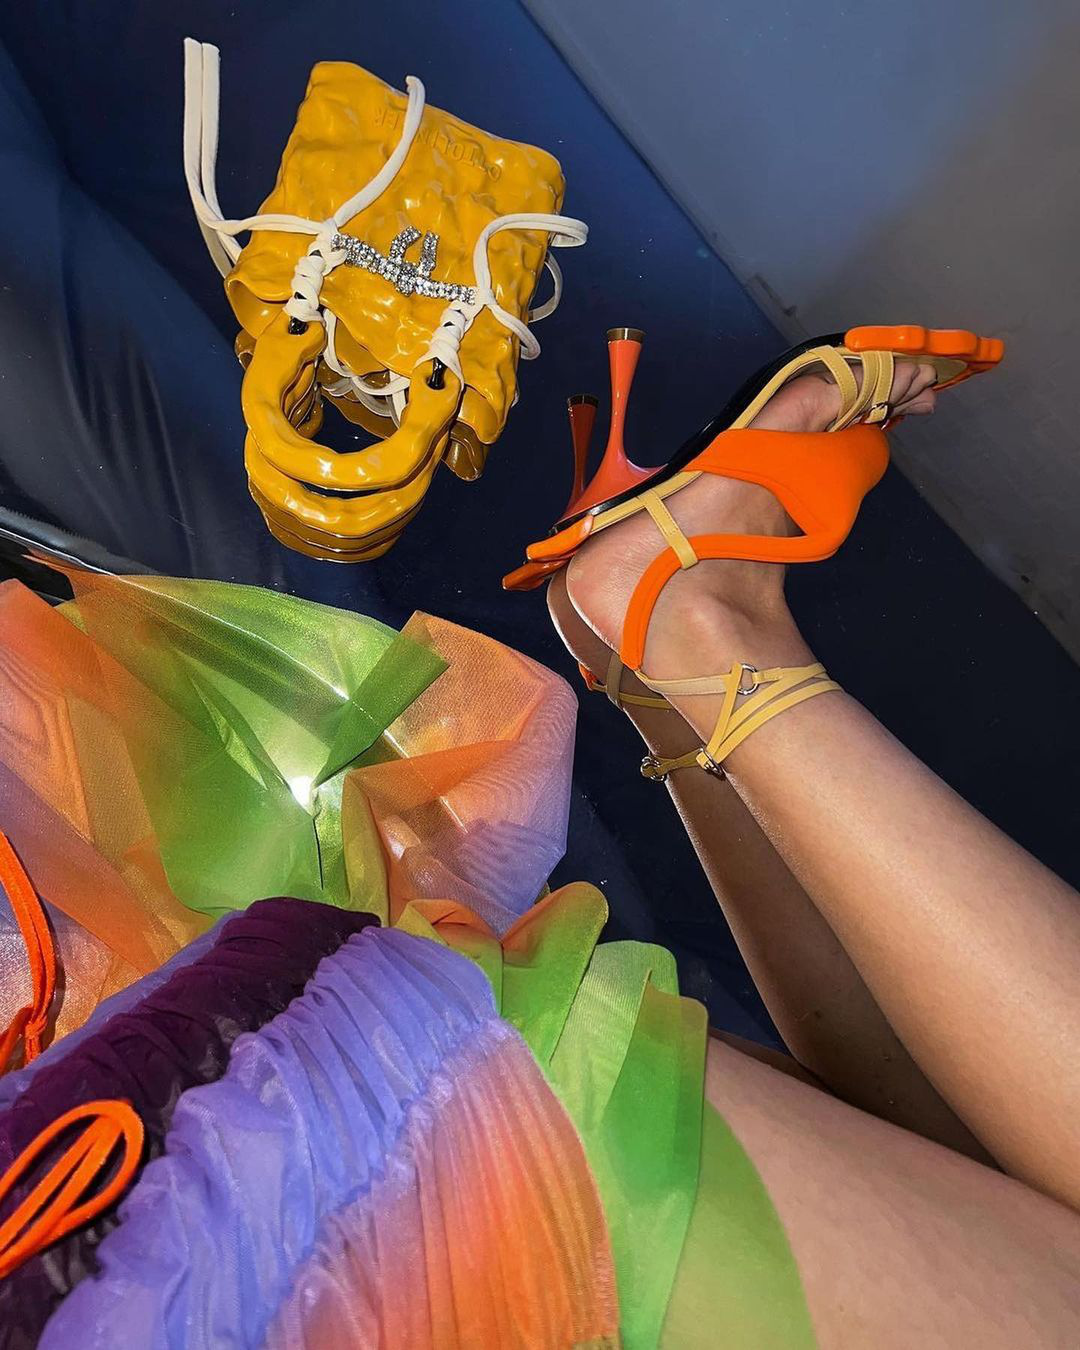

In [7]:
from PIL import Image
from IPython.display import display

# Replace the example list with your actual file paths
indice = 9

# Check if the list is not empty and the first path is valid
if no_humans and isinstance(no_humans[indice], str):
    try:
        # Open the image from the path at index 0 and display it
        image_path = no_humans[indice]
        image = Image.open(image_path)
        display(image)
    except FileNotFoundError:
        print(f"File not found: {image_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("The list is empty or the path is not a string.")

In [8]:
# mark the no humans in keys dataframe
df_keys['No_humans']  = df_keys['Key_path'].apply(lambda x: 1 if x in no_humans else 0)

Cross the images of no humans with the images of no women

In [9]:
df_final = df_women.merge(df_keys, how = 'left', on='Long')
len(df_final)

671

In [10]:
df_final

,Long,Auto_caption,id,Short,link,Objectify (yes or no),caption,Has_women,Key_path,No_humans
0,2015-11-18_18-26-59_UTC,a picture of a woman with long black hair sits...,207.0,-PHbiexlr_,https://www.instagram.com/p/-PHbiexlr_/?igshid...,1.0,Stunning Mariana Rodriguez in #amencouture. Se...,1,../1_download_data/data/raw/-PHbiexlr_\2015-11...,0
1,2015-06-01_07-45-08_UTC,a picture of a woman with black hair and a bla...,214.0,3YO1o0Rlkt,https://www.instagram.com/p/3YO1o0Rlkt/?igshid...,1.0,@emastokholma in Amen embroidered #dress from ...,1,../1_download_data/data/raw/3YO1o0Rlkt\2015-06...,0
2,2015-07-06_10-38-30_UTC,a picture of a woman with black hair and a bla...,213.0,4yqgDyxloK,https://www.instagram.com/p/4yqgDyxloK/?igshid...,1.0,Stunning DJ @emastokholma wears all over paill...,1,../1_download_data/data/raw/4yqgDyxloK\2015-07...,0
3,2020-04-10_08-57-20_UTC,a picture of a woman wearing a black jacket an...,209.0,B-y2Fo8qcN_,https://www.instagram.com/p/B-y2Fo8qcN_/?igshi...,1.0,Crystal Pumps ✨ #AmenStyle #AmenPreSpring20 #A...,1,../1_download_data/data/raw/B-y2Fo8qcN_\2020-0...,0
4,2019-10-24_11-49-40_UTC,a picture of a woman in a red dress sits on a ...,200.0,B3__d73i46x,https://www.instagram.com/p/B3__d73i46x/?igshi...,1.0,Discover our FW19 Collection on amenstyle.com ...,1,../1_download_data/data/raw/B3__d73i46x\2019-1...,0
...,...,...,...,...,...,...,...,...,...,...
666,2023-11-08_17-37-17_UTC_4,a picture of a woman in a black coat and sungl...,235.0,CzZMjcYMP21,https://www.instagram.com/p/CzZMjcYMP21/?utm_s...,0.0,This season must-have. @fashionhurricanebyv in...,1,../1_download_data/data/raw/CzZMjcYMP21\2023-1...,0
667,2023-11-08_17-37-17_UTC_5,a picture of a woman with brown hair wearing a...,235.0,CzZMjcYMP21,https://www.instagram.com/p/CzZMjcYMP21/?utm_s...,0.0,This season must-have. @fashionhurricanebyv in...,1,../1_download_data/data/raw/CzZMjcYMP21\2023-1...,0
668,2013-10-08_12-40-36_UTC,a picture of a woman with black hair and a bar...,216.0,fNO52Nxluy,https://www.instagram.com/p/fNO52Nxluy/?igshid...,1.0,Valentina Vignali looks explosive in a preciou...,1,../1_download_data/data/raw/fNO52Nxluy\2013-10...,0
669,2014-03-21_10-14-52_UTC,a picture of a young woman with long brown hai...,217.0,lzQl_gRlnD,https://www.instagram.com/p/lzQl_gRlnD/?igshid...,1.0,Regram @nimabenati #amenstyle #amen #fashion #...,1,../1_download_data/data/raw/lzQl_gRlnD\2014-03...,0


In [15]:
df_final.describe()

,id,Objectify (yes or no),Has_women,No_humans
count,670.000000,670.000000,671.0,671.000000
mean,148.697015,0.698507,1.0,0.013413
std,82.735568,0.459249,0.0,0.115120
min,1.000000,0.000000,1.0,0.000000
25%,76.250000,0.000000,1.0,0.000000
50%,153.000000,1.000000,1.0,0.000000
75%,222.000000,1.000000,1.0,0.000000
max,283.000000,1.000000,1.0,1.000000


In [16]:
# drop no humans
df_final = df_final[df_final['No_humans'] == 0]

In [17]:
df_final.to_excel('../0_data/pictures_captions_autocaptions_v2.xlsx', index = False)